In [50]:
import pandas as pd

data = pd.read_csv("total_data.csv")

mask = (data['20년7월TOP3대상여부']=='Y')
masked_data = data.loc[mask1,:]
masked_data

,기준년월,그룹번호,그룹내고객수,종목번호,그룹내_매수여부,그룹내_매도여부,매수고객수,매도고객수,평균매수수량,평균매도수량,...,매도가격_중앙값,거래량,거래금액_만원단위,20년7월TOP3대상여부,시장구분,종목명,표준산업구분코드_대분류,표준산업구분코드_소분류,표준산업구분코드_중분류,평균가격
0,201907,MAD01,288,A000660,Y,Y,7,17,19,234,...,78500,2.993388e+06,2.244919e+07,Y,코스피,SK하이닉스,제조업,반도체 제조업,전자부품· 컴퓨터· 영상· 음향 및,74995.933792
1,201907,MAD04,776,A000660,Y,Y,23,36,329,434,...,74700,2.993388e+06,2.244919e+07,Y,코스피,SK하이닉스,제조업,반도체 제조업,전자부품· 컴퓨터· 영상· 음향 및,74995.933792
2,201907,MAD05,890,A000660,Y,Y,3,11,6,23,...,78800,2.993388e+06,2.244919e+07,Y,코스피,SK하이닉스,제조업,반도체 제조업,전자부품· 컴퓨터· 영상· 음향 및,74995.933792
3,201907,MAD06,1615,A000660,Y,Y,27,63,77,145,...,72150,2.993388e+06,2.244919e+07,Y,코스피,SK하이닉스,제조업,반도체 제조업,전자부품· 컴퓨터· 영상· 음향 및,74995.933792
4,201907,MAD09,634,A000660,Y,Y,7,13,210,237,...,72400,2.993388e+06,2.244919e+07,Y,코스피,SK하이닉스,제조업,반도체 제조업,전자부품· 컴퓨터· 영상· 음향 및,74995.933792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30162,202006,MAD43,2879,A009240,Y,Y,6,3,33,50,...,88807,1.061898e+05,9.436800e+05,Y,코스피,한샘,도매 및 소매업,생활용품 도매업,도매 및 상품 중개업,88867.277123
30164,202006,MAD43,2879,A011150,N,Y,0,3,0,718,...,3925,1.635518e+06,6.335980e+05,Y,코스피,CJ씨푸드,제조업,기타 식품 제조업,식료품 제조업,3873.990846
30167,202006,MAD43,2879,A036930,Y,Y,3,5,22,43,...,5720,5.442303e+05,3.067193e+05,Y,코스닥,주성엔지니어링,제조업,특수 목적용 기계 제조업,기타 기계 및 장비 제조업,5635.835831
30180,202006,MAD43,2879,A158430,Y,Y,6,5,52,29,...,30626,1.758884e+05,5.464499e+05,Y,코스닥,아톤,정보통신업,소프트웨어 개발 및 공급업,출판업,31067.988614


In [51]:
#drop useless column
masked_data = masked_data.drop('종목번호', axis = 1)
masked_data = masked_data.drop('그룹내_매수여부', axis = 1)
masked_data = masked_data.drop('그룹내_매도여부', axis = 1)
masked_data = masked_data.drop('매도고객수', axis = 1)
masked_data = masked_data.drop('평균매수수량', axis = 1)
masked_data = masked_data.drop('평균매도수량', axis = 1)
masked_data = masked_data.drop('매수가격_중앙값', axis = 1)
masked_data = masked_data.drop('매도가격_중앙값', axis = 1)
masked_data = masked_data.drop('20년7월TOP3대상여부', axis = 1)

#data -> one hot encode
masked_data['그룹번호'] = pd.factorize(masked_data['그룹번호'])[0]
masked_data['시장구분'] = pd.factorize(masked_data['시장구분'])[0]
masked_data['종목명'] = pd.factorize(masked_data['종목명'])[0]
masked_data['표준산업구분코드_대분류'] = pd.factorize(masked_data['표준산업구분코드_대분류'])[0]
masked_data['표준산업구분코드_중분류'] = pd.factorize(masked_data['표준산업구분코드_중분류'])[0]
masked_data['표준산업구분코드_소분류'] = pd.factorize(masked_data['표준산업구분코드_소분류'])[0]

masked_data

,기준년월,그룹번호,그룹내고객수,매수고객수,거래량,거래금액_만원단위,시장구분,종목명,표준산업구분코드_대분류,표준산업구분코드_소분류,표준산업구분코드_중분류,평균가격
0,201907,0,288,7,2.993388e+06,2.244919e+07,0,0,0,0,0,74995.933792
1,201907,1,776,23,2.993388e+06,2.244919e+07,0,0,0,0,0,74995.933792
2,201907,2,890,3,2.993388e+06,2.244919e+07,0,0,0,0,0,74995.933792
3,201907,3,1615,27,2.993388e+06,2.244919e+07,0,0,0,0,0,74995.933792
4,201907,4,634,7,2.993388e+06,2.244919e+07,0,0,0,0,0,74995.933792
...,...,...,...,...,...,...,...,...,...,...,...,...
30162,202006,21,2879,6,1.061898e+05,9.436800e+05,0,49,3,7,7,88867.277123
30164,202006,21,2879,0,1.635518e+06,6.335980e+05,0,65,0,34,27,3873.990846
30167,202006,21,2879,3,5.442303e+05,3.067193e+05,1,33,0,6,6,5635.835831
30180,202006,21,2879,6,1.758884e+05,5.464499e+05,1,93,2,9,9,31067.988614


In [31]:
#train:201907~202005
#test:202006
train_mask = (masked_data['기준년월'] != 202006)

X_train = masked_data.loc[train_mask,:]
X_test = masked_data.loc[~train_mask,:]

print(len(X_train))
print(len(X_test))

6254
1236


In [32]:
#train split
X_train_x = X_train.drop('매수고객수', axis = 1)
X_train_y = X_train['매수고객수']#, axis = 1)

#test split
X_test_x = X_test.drop('매수고객수', axis = 1)
X_test_y = X_test['매수고객수']#, axis = 1)

In [33]:
X_train_x

,기준년월,그룹번호,그룹내고객수,매도고객수,평균매수수량,평균매도수량,매수가격_중앙값,매도가격_중앙값,거래량,거래금액_만원단위,시장구분,종목명,표준산업구분코드_대분류,표준산업구분코드_소분류,표준산업구분코드_중분류,평균가격
0,201907,0,288,17,19,234,74800,78500,2.993388e+06,2.244919e+07,0,0,0,0,0,74995.933792
1,201907,1,776,36,329,434,74800,74700,2.993388e+06,2.244919e+07,0,0,0,0,0,74995.933792
2,201907,2,890,11,6,23,67000,78800,2.993388e+06,2.244919e+07,0,0,0,0,0,74995.933792
3,201907,3,1615,63,77,145,74600,72150,2.993388e+06,2.244919e+07,0,0,0,0,0,74995.933792
4,201907,4,634,13,210,237,74800,72400,2.993388e+06,2.244919e+07,0,0,0,0,0,74995.933792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25232,202005,32,444,4,3433,3933,1155,1170,4.610566e+06,5.608904e+05,1,34,0,25,20,1216.532749
25240,202005,21,2879,3,5,151,6550,5390,3.926797e+05,2.380356e+05,1,43,3,16,7,6061.825669
25241,202005,21,2879,3,114,145,17650,17236,2.263296e+05,3.852756e+05,0,130,7,52,30,17022.765817
25251,202005,21,2879,3,0,274,-1,1900,4.502947e+05,8.480489e+04,1,36,3,16,7,1883.319697


In [34]:
import lightgbm as lgb

def lgbm_regressor(train_X, train_y, test_X, test_y, feature_names=None, seed_val=2284, num_rounds=20800):

    param = {}

    param['boosting'] = 'dart'
    
    param['objective'] = 'regression'

    param['learning_rate'] = 0.05

    param['max_depth'] = 10

    param['metric'] = 'rmse'
    
    param['is_training_metric'] = True
    
    param['min_child_weight'] = 1

    param['bagging_fraction'] = 0.8
    
    param['num_leaves'] = 128

    param['feature_fraction'] = 0.8

    param['bagging_freq'] = 6
    
    param['seed'] = seed_val
    
    param['min_split_gain'] = 0.01
    
    num_rounds = num_rounds

    plst = list(param.items())

    train_ds = lgb.Dataset(train_X, label=train_y)

    test_ds = lgb.Dataset(test_X, label=test_y)

    model = lgb.train(param, train_ds, num_rounds,test_ds, early_stopping_rounds=180)

    return model

model = lgbm_regressor(train_X = X_train_x, train_y = X_train_y, test_X = X_test_x, test_y = X_test_y)


[1]	valid_0's rmse: 42.5982
[2]	valid_0's rmse: 41.9871
[3]	valid_0's rmse: 40.2828
[4]	valid_0's rmse: 38.6428
[5]	valid_0's rmse: 38.683
[6]	valid_0's rmse: 37.1454
[7]	valid_0's rmse: 35.4211
[8]	valid_0's rmse: 34.591
[9]	valid_0's rmse: 33.8999
[10]	valid_0's rmse: 32.4093
[11]	valid_0's rmse: 32.4097
[12]	valid_0's rmse: 31.0189
[13]	valid_0's rmse: 29.8774
[14]	valid_0's rmse: 30.0179
[15]	valid_0's rmse: 30.559
[16]	valid_0's rmse: 29.4384
[17]	valid_0's rmse: 28.6593
[18]	valid_0's rmse: 27.6401
[19]	valid_0's rmse: 27.8309
[20]	valid_0's rmse: 26.8541
[21]	valid_0's rmse: 27.0889
[22]	valid_0's rmse: 26.1678
[23]	valid_0's rmse: 26.5541
[24]	valid_0's rmse: 25.6701
[25]	valid_0's rmse: 25.0894
[26]	valid_0's rmse: 24.4267
[27]	valid_0's rmse: 24.5348
[28]	valid_0's rmse: 23.8199
[29]	valid_0's rmse: 23.1551

C:\Users\So\Anaconda3\envs\mirae\lib\site-packages\lightgbm\callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')



[30]	valid_0's rmse: 24.031
[31]	valid_0's rmse: 23.4402
[32]	valid_0's rmse: 22.8998
[33]	valid_0's rmse: 22.4782
[34]	valid_0's rmse: 22.2523
[35]	valid_0's rmse: 22.1515
[36]	valid_0's rmse: 21.7934
[37]	valid_0's rmse: 21.3986
[38]	valid_0's rmse: 21.0384
[39]	valid_0's rmse: 21.0831
[40]	valid_0's rmse: 21.3465
[41]	valid_0's rmse: 21.2922
[42]	valid_0's rmse: 20.9439
[43]	valid_0's rmse: 21.279
[44]	valid_0's rmse: 21.1299
[45]	valid_0's rmse: 21.4938
[46]	valid_0's rmse: 21.6312
[47]	valid_0's rmse: 21.2972
[48]	valid_0's rmse: 20.9151
[49]	valid_0's rmse: 21.1371
[50]	valid_0's rmse: 21.3288
[51]	valid_0's rmse: 21.5037
[52]	valid_0's rmse: 21.8597
[53]	valid_0's rmse: 22.0919
[54]	valid_0's rmse: 22.1941
[55]	valid_0's rmse: 22.1132
[56]	valid_0's rmse: 21.6073
[57]	valid_0's rmse: 21.1577
[58]	valid_0's rmse: 21.1908
[59]	valid_0's rmse: 21.421
[60]	valid_0's rmse: 20.984
[61]	valid_0's rmse: 21.2571
[62]	valid_0's rmse: 21.5426
[63]	valid_0's rmse: 21.8569
[64]	valid_0's rm

[308]	valid_0's rmse: 17.498
[309]	valid_0's rmse: 17.4795
[310]	valid_0's rmse: 17.4226
[311]	valid_0's rmse: 17.3701
[312]	valid_0's rmse: 17.3956
[313]	valid_0's rmse: 17.3853
[314]	valid_0's rmse: 17.3423
[315]	valid_0's rmse: 17.373
[316]	valid_0's rmse: 17.397
[317]	valid_0's rmse: 17.4255
[318]	valid_0's rmse: 17.4208
[319]	valid_0's rmse: 17.4487
[320]	valid_0's rmse: 17.3885
[321]	valid_0's rmse: 17.4243
[322]	valid_0's rmse: 17.3836
[323]	valid_0's rmse: 17.3803
[324]	valid_0's rmse: 17.4192
[325]	valid_0's rmse: 17.388
[326]	valid_0's rmse: 17.3769
[327]	valid_0's rmse: 17.328
[328]	valid_0's rmse: 17.3531
[329]	valid_0's rmse: 17.3837
[330]	valid_0's rmse: 17.3461
[331]	valid_0's rmse: 17.2781
[332]	valid_0's rmse: 17.2169
[333]	valid_0's rmse: 17.1648
[334]	valid_0's rmse: 17.1878
[335]	valid_0's rmse: 17.1431
[336]	valid_0's rmse: 17.1675
[337]	valid_0's rmse: 17.13
[338]	valid_0's rmse: 17.0889
[339]	valid_0's rmse: 17.1064
[340]	valid_0's rmse: 17.1253
[341]	valid_0's r

[583]	valid_0's rmse: 16.7769
[584]	valid_0's rmse: 16.7748
[585]	valid_0's rmse: 16.7779
[586]	valid_0's rmse: 16.7719
[587]	valid_0's rmse: 16.7675
[588]	valid_0's rmse: 16.772
[589]	valid_0's rmse: 16.7762
[590]	valid_0's rmse: 16.7789
[591]	valid_0's rmse: 16.7845
[592]	valid_0's rmse: 16.7884
[593]	valid_0's rmse: 16.7892
[594]	valid_0's rmse: 16.7941
[595]	valid_0's rmse: 16.7997
[596]	valid_0's rmse: 16.8171
[597]	valid_0's rmse: 16.8232
[598]	valid_0's rmse: 16.8322
[599]	valid_0's rmse: 16.8416
[600]	valid_0's rmse: 16.8503
[601]	valid_0's rmse: 16.8396
[602]	valid_0's rmse: 16.8483
[603]	valid_0's rmse: 16.858
[604]	valid_0's rmse: 16.8651
[605]	valid_0's rmse: 16.8501
[606]	valid_0's rmse: 16.8558
[607]	valid_0's rmse: 16.8338
[608]	valid_0's rmse: 16.8423
[609]	valid_0's rmse: 16.849
[610]	valid_0's rmse: 16.8304
[611]	valid_0's rmse: 16.8388
[612]	valid_0's rmse: 16.823
[613]	valid_0's rmse: 16.8038
[614]	valid_0's rmse: 16.7942
[615]	valid_0's rmse: 16.7966
[616]	valid_0'

[861]	valid_0's rmse: 16.1615
[862]	valid_0's rmse: 16.166
[863]	valid_0's rmse: 16.166
[864]	valid_0's rmse: 16.1712
[865]	valid_0's rmse: 16.1641
[866]	valid_0's rmse: 16.1653
[867]	valid_0's rmse: 16.1599
[868]	valid_0's rmse: 16.16
[869]	valid_0's rmse: 16.1606
[870]	valid_0's rmse: 16.1552
[871]	valid_0's rmse: 16.1521
[872]	valid_0's rmse: 16.1456
[873]	valid_0's rmse: 16.1419
[874]	valid_0's rmse: 16.1436
[875]	valid_0's rmse: 16.1414
[876]	valid_0's rmse: 16.1403
[877]	valid_0's rmse: 16.1462
[878]	valid_0's rmse: 16.1472
[879]	valid_0's rmse: 16.1442
[880]	valid_0's rmse: 16.1452
[881]	valid_0's rmse: 16.1422
[882]	valid_0's rmse: 16.1422
[883]	valid_0's rmse: 16.1399
[884]	valid_0's rmse: 16.1396
[885]	valid_0's rmse: 16.146
[886]	valid_0's rmse: 16.1449
[887]	valid_0's rmse: 16.145
[888]	valid_0's rmse: 16.1446
[889]	valid_0's rmse: 16.1447
[890]	valid_0's rmse: 16.1426
[891]	valid_0's rmse: 16.1472
[892]	valid_0's rmse: 16.1476
[893]	valid_0's rmse: 16.1474
[894]	valid_0's 

[1135]	valid_0's rmse: 16.0293
[1136]	valid_0's rmse: 16.0039
[1137]	valid_0's rmse: 15.9805
[1138]	valid_0's rmse: 15.9836
[1139]	valid_0's rmse: 15.9871
[1140]	valid_0's rmse: 15.9909
[1141]	valid_0's rmse: 16.0146
[1142]	valid_0's rmse: 16.042
[1143]	valid_0's rmse: 16.0662
[1144]	valid_0's rmse: 16.0712
[1145]	valid_0's rmse: 16.0743
[1146]	valid_0's rmse: 16.0641
[1147]	valid_0's rmse: 16.0906
[1148]	valid_0's rmse: 16.0954
[1149]	valid_0's rmse: 16.0965
[1150]	valid_0's rmse: 16.1007
[1151]	valid_0's rmse: 16.1026
[1152]	valid_0's rmse: 16.1073
[1153]	valid_0's rmse: 16.1093
[1154]	valid_0's rmse: 16.1058
[1155]	valid_0's rmse: 16.1099
[1156]	valid_0's rmse: 16.118
[1157]	valid_0's rmse: 16.1073
[1158]	valid_0's rmse: 16.1099
[1159]	valid_0's rmse: 16.1145
[1160]	valid_0's rmse: 16.1232
[1161]	valid_0's rmse: 16.1326
[1162]	valid_0's rmse: 16.1359
[1163]	valid_0's rmse: 16.1438
[1164]	valid_0's rmse: 16.1472
[1165]	valid_0's rmse: 16.1526
[1166]	valid_0's rmse: 16.1557
[1167]	val

[1407]	valid_0's rmse: 15.7361
[1408]	valid_0's rmse: 15.7267
[1409]	valid_0's rmse: 15.7287
[1410]	valid_0's rmse: 15.7217
[1411]	valid_0's rmse: 15.7315
[1412]	valid_0's rmse: 15.7406
[1413]	valid_0's rmse: 15.7494
[1414]	valid_0's rmse: 15.7485
[1415]	valid_0's rmse: 15.7551
[1416]	valid_0's rmse: 15.7564
[1417]	valid_0's rmse: 15.7585
[1418]	valid_0's rmse: 15.7601
[1419]	valid_0's rmse: 15.7596
[1420]	valid_0's rmse: 15.7624
[1421]	valid_0's rmse: 15.7645
[1422]	valid_0's rmse: 15.7668
[1423]	valid_0's rmse: 15.7639
[1424]	valid_0's rmse: 15.7656
[1425]	valid_0's rmse: 15.768
[1426]	valid_0's rmse: 15.7654
[1427]	valid_0's rmse: 15.7665
[1428]	valid_0's rmse: 15.7674
[1429]	valid_0's rmse: 15.7684
[1430]	valid_0's rmse: 15.7697
[1431]	valid_0's rmse: 15.7626
[1432]	valid_0's rmse: 15.7525
[1433]	valid_0's rmse: 15.7548
[1434]	valid_0's rmse: 15.7412
[1435]	valid_0's rmse: 15.7434
[1436]	valid_0's rmse: 15.7564
[1437]	valid_0's rmse: 15.7579
[1438]	valid_0's rmse: 15.7593
[1439]	va

[1677]	valid_0's rmse: 15.5764
[1678]	valid_0's rmse: 15.5761
[1679]	valid_0's rmse: 15.5782
[1680]	valid_0's rmse: 15.5538
[1681]	valid_0's rmse: 15.5505
[1682]	valid_0's rmse: 15.5519
[1683]	valid_0's rmse: 15.5516
[1684]	valid_0's rmse: 15.5528
[1685]	valid_0's rmse: 15.5534
[1686]	valid_0's rmse: 15.5531
[1687]	valid_0's rmse: 15.5433
[1688]	valid_0's rmse: 15.5435
[1689]	valid_0's rmse: 15.5368
[1690]	valid_0's rmse: 15.5188
[1691]	valid_0's rmse: 15.5199
[1692]	valid_0's rmse: 15.5056
[1693]	valid_0's rmse: 15.5061
[1694]	valid_0's rmse: 15.5069
[1695]	valid_0's rmse: 15.509
[1696]	valid_0's rmse: 15.5145
[1697]	valid_0's rmse: 15.5237
[1698]	valid_0's rmse: 15.524
[1699]	valid_0's rmse: 15.5256
[1700]	valid_0's rmse: 15.528
[1701]	valid_0's rmse: 15.5322
[1702]	valid_0's rmse: 15.5343
[1703]	valid_0's rmse: 15.5411
[1704]	valid_0's rmse: 15.55
[1705]	valid_0's rmse: 15.55
[1706]	valid_0's rmse: 15.5504
[1707]	valid_0's rmse: 15.5515
[1708]	valid_0's rmse: 15.5531
[1709]	valid_0'

[1943]	valid_0's rmse: 15.4884
[1944]	valid_0's rmse: 15.4895
[1945]	valid_0's rmse: 15.4995
[1946]	valid_0's rmse: 15.4994
[1947]	valid_0's rmse: 15.5089
[1948]	valid_0's rmse: 15.5108
[1949]	valid_0's rmse: 15.5133
[1950]	valid_0's rmse: 15.5231
[1951]	valid_0's rmse: 15.524
[1952]	valid_0's rmse: 15.5259
[1953]	valid_0's rmse: 15.5219
[1954]	valid_0's rmse: 15.4995
[1955]	valid_0's rmse: 15.4999
[1956]	valid_0's rmse: 15.4999
[1957]	valid_0's rmse: 15.485
[1958]	valid_0's rmse: 15.4717
[1959]	valid_0's rmse: 15.4595
[1960]	valid_0's rmse: 15.4491
[1961]	valid_0's rmse: 15.4512
[1962]	valid_0's rmse: 15.4693
[1963]	valid_0's rmse: 15.4687
[1964]	valid_0's rmse: 15.469
[1965]	valid_0's rmse: 15.4678
[1966]	valid_0's rmse: 15.4689
[1967]	valid_0's rmse: 15.4691
[1968]	valid_0's rmse: 15.4624
[1969]	valid_0's rmse: 15.4628
[1970]	valid_0's rmse: 15.4628
[1971]	valid_0's rmse: 15.4557
[1972]	valid_0's rmse: 15.4562
[1973]	valid_0's rmse: 15.4564
[1974]	valid_0's rmse: 15.4563
[1975]	vali

[2210]	valid_0's rmse: 15.378
[2211]	valid_0's rmse: 15.3788
[2212]	valid_0's rmse: 15.3799
[2213]	valid_0's rmse: 15.3823
[2214]	valid_0's rmse: 15.3846
[2215]	valid_0's rmse: 15.3813
[2216]	valid_0's rmse: 15.382
[2217]	valid_0's rmse: 15.3655
[2218]	valid_0's rmse: 15.3629
[2219]	valid_0's rmse: 15.3605
[2220]	valid_0's rmse: 15.3682
[2221]	valid_0's rmse: 15.368
[2222]	valid_0's rmse: 15.3663
[2223]	valid_0's rmse: 15.3681
[2224]	valid_0's rmse: 15.3686
[2225]	valid_0's rmse: 15.3692
[2226]	valid_0's rmse: 15.369
[2227]	valid_0's rmse: 15.3718
[2228]	valid_0's rmse: 15.3695
[2229]	valid_0's rmse: 15.3627
[2230]	valid_0's rmse: 15.3629
[2231]	valid_0's rmse: 15.3598
[2232]	valid_0's rmse: 15.3618
[2233]	valid_0's rmse: 15.3592
[2234]	valid_0's rmse: 15.36
[2235]	valid_0's rmse: 15.3652
[2236]	valid_0's rmse: 15.3604
[2237]	valid_0's rmse: 15.36
[2238]	valid_0's rmse: 15.3606
[2239]	valid_0's rmse: 15.3577
[2240]	valid_0's rmse: 15.318
[2241]	valid_0's rmse: 15.3147
[2242]	valid_0's 

[2487]	valid_0's rmse: 15.357
[2488]	valid_0's rmse: 15.3569
[2489]	valid_0's rmse: 15.3292
[2490]	valid_0's rmse: 15.3372
[2491]	valid_0's rmse: 15.3396
[2492]	valid_0's rmse: 15.3391
[2493]	valid_0's rmse: 15.3456
[2494]	valid_0's rmse: 15.3473
[2495]	valid_0's rmse: 15.3487
[2496]	valid_0's rmse: 15.3544
[2497]	valid_0's rmse: 15.3552
[2498]	valid_0's rmse: 15.3683
[2499]	valid_0's rmse: 15.3801
[2500]	valid_0's rmse: 15.381
[2501]	valid_0's rmse: 15.3835
[2502]	valid_0's rmse: 15.3971
[2503]	valid_0's rmse: 15.3972
[2504]	valid_0's rmse: 15.3984
[2505]	valid_0's rmse: 15.3891
[2506]	valid_0's rmse: 15.3814
[2507]	valid_0's rmse: 15.3828
[2508]	valid_0's rmse: 15.3762
[2509]	valid_0's rmse: 15.3779
[2510]	valid_0's rmse: 15.3817
[2511]	valid_0's rmse: 15.3859
[2512]	valid_0's rmse: 15.3873
[2513]	valid_0's rmse: 15.391
[2514]	valid_0's rmse: 15.3987
[2515]	valid_0's rmse: 15.4002
[2516]	valid_0's rmse: 15.4008
[2517]	valid_0's rmse: 15.4009
[2518]	valid_0's rmse: 15.3859
[2519]	vali

[2754]	valid_0's rmse: 15.403
[2755]	valid_0's rmse: 15.4032
[2756]	valid_0's rmse: 15.403
[2757]	valid_0's rmse: 15.4067
[2758]	valid_0's rmse: 15.411
[2759]	valid_0's rmse: 15.4117
[2760]	valid_0's rmse: 15.4133
[2761]	valid_0's rmse: 15.4171
[2762]	valid_0's rmse: 15.4167
[2763]	valid_0's rmse: 15.4175
[2764]	valid_0's rmse: 15.4172
[2765]	valid_0's rmse: 15.408
[2766]	valid_0's rmse: 15.4083
[2767]	valid_0's rmse: 15.4087
[2768]	valid_0's rmse: 15.4017
[2769]	valid_0's rmse: 15.402
[2770]	valid_0's rmse: 15.402
[2771]	valid_0's rmse: 15.4082
[2772]	valid_0's rmse: 15.4099
[2773]	valid_0's rmse: 15.4097
[2774]	valid_0's rmse: 15.4087
[2775]	valid_0's rmse: 15.3804
[2776]	valid_0's rmse: 15.3819
[2777]	valid_0's rmse: 15.3812
[2778]	valid_0's rmse: 15.3829
[2779]	valid_0's rmse: 15.3717
[2780]	valid_0's rmse: 15.3642
[2781]	valid_0's rmse: 15.3639
[2782]	valid_0's rmse: 15.3537
[2783]	valid_0's rmse: 15.3488
[2784]	valid_0's rmse: 15.3404
[2785]	valid_0's rmse: 15.3389
[2786]	valid_0

[3024]	valid_0's rmse: 15.2691
[3025]	valid_0's rmse: 15.2644
[3026]	valid_0's rmse: 15.2659
[3027]	valid_0's rmse: 15.2663
[3028]	valid_0's rmse: 15.2669
[3029]	valid_0's rmse: 15.2673
[3030]	valid_0's rmse: 15.2687
[3031]	valid_0's rmse: 15.2638
[3032]	valid_0's rmse: 15.287
[3033]	valid_0's rmse: 15.2876
[3034]	valid_0's rmse: 15.2877
[3035]	valid_0's rmse: 15.2876
[3036]	valid_0's rmse: 15.2794
[3037]	valid_0's rmse: 15.2852
[3038]	valid_0's rmse: 15.2855
[3039]	valid_0's rmse: 15.2787
[3040]	valid_0's rmse: 15.2796
[3041]	valid_0's rmse: 15.2801
[3042]	valid_0's rmse: 15.2774
[3043]	valid_0's rmse: 15.2742
[3044]	valid_0's rmse: 15.2753
[3045]	valid_0's rmse: 15.2788
[3046]	valid_0's rmse: 15.2824
[3047]	valid_0's rmse: 15.2794
[3048]	valid_0's rmse: 15.2786
[3049]	valid_0's rmse: 15.2789
[3050]	valid_0's rmse: 15.2801
[3051]	valid_0's rmse: 15.293
[3052]	valid_0's rmse: 15.2943
[3053]	valid_0's rmse: 15.2954
[3054]	valid_0's rmse: 15.2968
[3055]	valid_0's rmse: 15.2979
[3056]	val

[3297]	valid_0's rmse: 15.2505
[3298]	valid_0's rmse: 15.2502
[3299]	valid_0's rmse: 15.2512
[3300]	valid_0's rmse: 15.2526
[3301]	valid_0's rmse: 15.2534
[3302]	valid_0's rmse: 15.2538
[3303]	valid_0's rmse: 15.2531
[3304]	valid_0's rmse: 15.2449
[3305]	valid_0's rmse: 15.2455
[3306]	valid_0's rmse: 15.2406
[3307]	valid_0's rmse: 15.2351
[3308]	valid_0's rmse: 15.2348
[3309]	valid_0's rmse: 15.236
[3310]	valid_0's rmse: 15.2369
[3311]	valid_0's rmse: 15.2379
[3312]	valid_0's rmse: 15.2352
[3313]	valid_0's rmse: 15.2351
[3314]	valid_0's rmse: 15.2284
[3315]	valid_0's rmse: 15.228
[3316]	valid_0's rmse: 15.2219
[3317]	valid_0's rmse: 15.2222
[3318]	valid_0's rmse: 15.2226
[3319]	valid_0's rmse: 15.2263
[3320]	valid_0's rmse: 15.2239
[3321]	valid_0's rmse: 15.2189
[3322]	valid_0's rmse: 15.2185
[3323]	valid_0's rmse: 15.2181
[3324]	valid_0's rmse: 15.2113
[3325]	valid_0's rmse: 15.2112
[3326]	valid_0's rmse: 15.2117
[3327]	valid_0's rmse: 15.2199
[3328]	valid_0's rmse: 15.2284
[3329]	val

[3567]	valid_0's rmse: 15.1875
[3568]	valid_0's rmse: 15.1904
[3569]	valid_0's rmse: 15.1909
[3570]	valid_0's rmse: 15.1954
[3571]	valid_0's rmse: 15.1957
[3572]	valid_0's rmse: 15.1795
[3573]	valid_0's rmse: 15.1794
[3574]	valid_0's rmse: 15.1853
[3575]	valid_0's rmse: 15.1861
[3576]	valid_0's rmse: 15.2029
[3577]	valid_0's rmse: 15.2046
[3578]	valid_0's rmse: 15.1892
[3579]	valid_0's rmse: 15.178
[3580]	valid_0's rmse: 15.1683
[3581]	valid_0's rmse: 15.1606
[3582]	valid_0's rmse: 15.1589
[3583]	valid_0's rmse: 15.1558
[3584]	valid_0's rmse: 15.1626
[3585]	valid_0's rmse: 15.1623
[3586]	valid_0's rmse: 15.163
[3587]	valid_0's rmse: 15.1694
[3588]	valid_0's rmse: 15.1684
[3589]	valid_0's rmse: 15.1691
[3590]	valid_0's rmse: 15.1697
[3591]	valid_0's rmse: 15.1635
[3592]	valid_0's rmse: 15.1575
[3593]	valid_0's rmse: 15.1594
[3594]	valid_0's rmse: 15.1591
[3595]	valid_0's rmse: 15.159
[3596]	valid_0's rmse: 15.1487
[3597]	valid_0's rmse: 15.1535
[3598]	valid_0's rmse: 15.1527
[3599]	vali

[3833]	valid_0's rmse: 15.1168
[3834]	valid_0's rmse: 15.1174
[3835]	valid_0's rmse: 15.1175
[3836]	valid_0's rmse: 15.1192
[3837]	valid_0's rmse: 15.1182
[3838]	valid_0's rmse: 15.1169
[3839]	valid_0's rmse: 15.1068
[3840]	valid_0's rmse: 15.1056
[3841]	valid_0's rmse: 15.1066
[3842]	valid_0's rmse: 15.1067
[3843]	valid_0's rmse: 15.1074
[3844]	valid_0's rmse: 15.1075
[3845]	valid_0's rmse: 15.1086
[3846]	valid_0's rmse: 15.1136
[3847]	valid_0's rmse: 15.1149
[3848]	valid_0's rmse: 15.1152
[3849]	valid_0's rmse: 15.1154
[3850]	valid_0's rmse: 15.1168
[3851]	valid_0's rmse: 15.1176
[3852]	valid_0's rmse: 15.1181
[3853]	valid_0's rmse: 15.1177
[3854]	valid_0's rmse: 15.1176
[3855]	valid_0's rmse: 15.1128
[3856]	valid_0's rmse: 15.1129
[3857]	valid_0's rmse: 15.1126
[3858]	valid_0's rmse: 15.1063
[3859]	valid_0's rmse: 15.1028
[3860]	valid_0's rmse: 15.0958
[3861]	valid_0's rmse: 15.0884
[3862]	valid_0's rmse: 15.0832
[3863]	valid_0's rmse: 15.0836
[3864]	valid_0's rmse: 15.083
[3865]	va

[4102]	valid_0's rmse: 15.108
[4103]	valid_0's rmse: 15.1065
[4104]	valid_0's rmse: 15.1066
[4105]	valid_0's rmse: 15.1079
[4106]	valid_0's rmse: 15.1094
[4107]	valid_0's rmse: 15.1099
[4108]	valid_0's rmse: 15.117
[4109]	valid_0's rmse: 15.1088
[4110]	valid_0's rmse: 15.1014
[4111]	valid_0's rmse: 15.1052
[4112]	valid_0's rmse: 15.1062
[4113]	valid_0's rmse: 15.1069
[4114]	valid_0's rmse: 15.1128
[4115]	valid_0's rmse: 15.1135
[4116]	valid_0's rmse: 15.1145
[4117]	valid_0's rmse: 15.1122
[4118]	valid_0's rmse: 15.1107
[4119]	valid_0's rmse: 15.1154
[4120]	valid_0's rmse: 15.1143
[4121]	valid_0's rmse: 15.113
[4122]	valid_0's rmse: 15.1092
[4123]	valid_0's rmse: 15.1072
[4124]	valid_0's rmse: 15.1075
[4125]	valid_0's rmse: 15.1068
[4126]	valid_0's rmse: 15.1053
[4127]	valid_0's rmse: 15.1056
[4128]	valid_0's rmse: 15.1045
[4129]	valid_0's rmse: 15.1042
[4130]	valid_0's rmse: 15.1044
[4131]	valid_0's rmse: 15.1094
[4132]	valid_0's rmse: 15.1094
[4133]	valid_0's rmse: 15.1096
[4134]	vali

[4367]	valid_0's rmse: 15.0073
[4368]	valid_0's rmse: 15.0026
[4369]	valid_0's rmse: 15.0029
[4370]	valid_0's rmse: 15.008
[4371]	valid_0's rmse: 15.0129
[4372]	valid_0's rmse: 15.0144
[4373]	valid_0's rmse: 15.0146
[4374]	valid_0's rmse: 15.0196
[4375]	valid_0's rmse: 15.0194
[4376]	valid_0's rmse: 15.0137
[4377]	valid_0's rmse: 15.0082
[4378]	valid_0's rmse: 15.0087
[4379]	valid_0's rmse: 15.0078
[4380]	valid_0's rmse: 15.007
[4381]	valid_0's rmse: 15.0142
[4382]	valid_0's rmse: 15.0146
[4383]	valid_0's rmse: 15.0152
[4384]	valid_0's rmse: 15.0153
[4385]	valid_0's rmse: 15.0212
[4386]	valid_0's rmse: 15.0222
[4387]	valid_0's rmse: 15.0193
[4388]	valid_0's rmse: 15.0197
[4389]	valid_0's rmse: 15.0193
[4390]	valid_0's rmse: 15.0204
[4391]	valid_0's rmse: 15.0188
[4392]	valid_0's rmse: 15.0189
[4393]	valid_0's rmse: 15.0137
[4394]	valid_0's rmse: 15.0138
[4395]	valid_0's rmse: 15.0186
[4396]	valid_0's rmse: 15.0186
[4397]	valid_0's rmse: 15.0189
[4398]	valid_0's rmse: 15.0126
[4399]	val

[4632]	valid_0's rmse: 14.9618
[4633]	valid_0's rmse: 14.9654
[4634]	valid_0's rmse: 14.965
[4635]	valid_0's rmse: 14.9604
[4636]	valid_0's rmse: 14.9599
[4637]	valid_0's rmse: 14.9605
[4638]	valid_0's rmse: 14.9638
[4639]	valid_0's rmse: 14.9698
[4640]	valid_0's rmse: 14.9713
[4641]	valid_0's rmse: 14.9716
[4642]	valid_0's rmse: 14.9716
[4643]	valid_0's rmse: 14.9741
[4644]	valid_0's rmse: 14.9807
[4645]	valid_0's rmse: 14.9805
[4646]	valid_0's rmse: 14.9808
[4647]	valid_0's rmse: 14.9789
[4648]	valid_0's rmse: 14.9789
[4649]	valid_0's rmse: 14.9795
[4650]	valid_0's rmse: 14.9799
[4651]	valid_0's rmse: 14.9826
[4652]	valid_0's rmse: 14.9832
[4653]	valid_0's rmse: 14.9859
[4654]	valid_0's rmse: 14.9867
[4655]	valid_0's rmse: 14.9864
[4656]	valid_0's rmse: 14.9866
[4657]	valid_0's rmse: 14.9942
[4658]	valid_0's rmse: 14.9987
[4659]	valid_0's rmse: 15.0057
[4660]	valid_0's rmse: 15.0093
[4661]	valid_0's rmse: 15.0091
[4662]	valid_0's rmse: 15.0124
[4663]	valid_0's rmse: 15.0124
[4664]	va

[4905]	valid_0's rmse: 14.9399
[4906]	valid_0's rmse: 14.94
[4907]	valid_0's rmse: 14.9367
[4908]	valid_0's rmse: 14.938
[4909]	valid_0's rmse: 14.9386
[4910]	valid_0's rmse: 14.9387
[4911]	valid_0's rmse: 14.9342
[4912]	valid_0's rmse: 14.9301
[4913]	valid_0's rmse: 14.9297
[4914]	valid_0's rmse: 14.9301
[4915]	valid_0's rmse: 14.9304
[4916]	valid_0's rmse: 14.9298
[4917]	valid_0's rmse: 14.9302
[4918]	valid_0's rmse: 14.9286
[4919]	valid_0's rmse: 14.9287
[4920]	valid_0's rmse: 14.9273
[4921]	valid_0's rmse: 14.9275
[4922]	valid_0's rmse: 14.9209
[4923]	valid_0's rmse: 14.9152
[4924]	valid_0's rmse: 14.9209
[4925]	valid_0's rmse: 14.9149
[4926]	valid_0's rmse: 14.9142
[4927]	valid_0's rmse: 14.9006
[4928]	valid_0's rmse: 14.9011
[4929]	valid_0's rmse: 14.9009
[4930]	valid_0's rmse: 14.899
[4931]	valid_0's rmse: 14.8872
[4932]	valid_0's rmse: 14.8858
[4933]	valid_0's rmse: 14.8866
[4934]	valid_0's rmse: 14.8865
[4935]	valid_0's rmse: 14.883
[4936]	valid_0's rmse: 14.8792
[4937]	valid_

[5173]	valid_0's rmse: 14.8363
[5174]	valid_0's rmse: 14.8372
[5175]	valid_0's rmse: 14.8337
[5176]	valid_0's rmse: 14.8364
[5177]	valid_0's rmse: 14.836
[5178]	valid_0's rmse: 14.8349
[5179]	valid_0's rmse: 14.8313
[5180]	valid_0's rmse: 14.8315
[5181]	valid_0's rmse: 14.8279
[5182]	valid_0's rmse: 14.8246
[5183]	valid_0's rmse: 14.8217
[5184]	valid_0's rmse: 14.8244
[5185]	valid_0's rmse: 14.8241
[5186]	valid_0's rmse: 14.8239
[5187]	valid_0's rmse: 14.8298
[5188]	valid_0's rmse: 14.8361
[5189]	valid_0's rmse: 14.8361
[5190]	valid_0's rmse: 14.8352
[5191]	valid_0's rmse: 14.8353
[5192]	valid_0's rmse: 14.8351
[5193]	valid_0's rmse: 14.8349
[5194]	valid_0's rmse: 14.8356
[5195]	valid_0's rmse: 14.8342
[5196]	valid_0's rmse: 14.8407
[5197]	valid_0's rmse: 14.8454
[5198]	valid_0's rmse: 14.8461
[5199]	valid_0's rmse: 14.8459
[5200]	valid_0's rmse: 14.8469
[5201]	valid_0's rmse: 14.8461
[5202]	valid_0's rmse: 14.8518
[5203]	valid_0's rmse: 14.8476
[5204]	valid_0's rmse: 14.8481
[5205]	va

[5445]	valid_0's rmse: 14.8726
[5446]	valid_0's rmse: 14.8746
[5447]	valid_0's rmse: 14.8782
[5448]	valid_0's rmse: 14.8816
[5449]	valid_0's rmse: 14.8757
[5450]	valid_0's rmse: 14.8724
[5451]	valid_0's rmse: 14.8673
[5452]	valid_0's rmse: 14.8632
[5453]	valid_0's rmse: 14.863
[5454]	valid_0's rmse: 14.8625
[5455]	valid_0's rmse: 14.8622
[5456]	valid_0's rmse: 14.8615
[5457]	valid_0's rmse: 14.8613
[5458]	valid_0's rmse: 14.8677
[5459]	valid_0's rmse: 14.8677
[5460]	valid_0's rmse: 14.8682
[5461]	valid_0's rmse: 14.8681
[5462]	valid_0's rmse: 14.8708
[5463]	valid_0's rmse: 14.8734
[5464]	valid_0's rmse: 14.8729
[5465]	valid_0's rmse: 14.8729
[5466]	valid_0's rmse: 14.8735
[5467]	valid_0's rmse: 14.8731
[5468]	valid_0's rmse: 14.8774
[5469]	valid_0's rmse: 14.8799
[5470]	valid_0's rmse: 14.8792
[5471]	valid_0's rmse: 14.8793
[5472]	valid_0's rmse: 14.88
[5473]	valid_0's rmse: 14.8797
[5474]	valid_0's rmse: 14.8796
[5475]	valid_0's rmse: 14.8934
[5476]	valid_0's rmse: 14.9029
[5477]	vali

[5714]	valid_0's rmse: 14.8294
[5715]	valid_0's rmse: 14.8292
[5716]	valid_0's rmse: 14.8331
[5717]	valid_0's rmse: 14.8332
[5718]	valid_0's rmse: 14.8288
[5719]	valid_0's rmse: 14.829
[5720]	valid_0's rmse: 14.8334
[5721]	valid_0's rmse: 14.8334
[5722]	valid_0's rmse: 14.8506
[5723]	valid_0's rmse: 14.8606
[5724]	valid_0's rmse: 14.8755
[5725]	valid_0's rmse: 14.8742
[5726]	valid_0's rmse: 14.8746
[5727]	valid_0's rmse: 14.8738
[5728]	valid_0's rmse: 14.8735
[5729]	valid_0's rmse: 14.8713
[5730]	valid_0's rmse: 14.8706
[5731]	valid_0's rmse: 14.8659
[5732]	valid_0's rmse: 14.8655
[5733]	valid_0's rmse: 14.8708
[5734]	valid_0's rmse: 14.8707
[5735]	valid_0's rmse: 14.8704
[5736]	valid_0's rmse: 14.8757
[5737]	valid_0's rmse: 14.8805
[5738]	valid_0's rmse: 14.8842
[5739]	valid_0's rmse: 14.8854
[5740]	valid_0's rmse: 14.8839
[5741]	valid_0's rmse: 14.8811
[5742]	valid_0's rmse: 14.8807
[5743]	valid_0's rmse: 14.8848
[5744]	valid_0's rmse: 14.8845
[5745]	valid_0's rmse: 14.8845
[5746]	va

[5982]	valid_0's rmse: 14.7831
[5983]	valid_0's rmse: 14.7832
[5984]	valid_0's rmse: 14.7803
[5985]	valid_0's rmse: 14.7783
[5986]	valid_0's rmse: 14.7767
[5987]	valid_0's rmse: 14.7745
[5988]	valid_0's rmse: 14.7724
[5989]	valid_0's rmse: 14.7811
[5990]	valid_0's rmse: 14.7814
[5991]	valid_0's rmse: 14.7902
[5992]	valid_0's rmse: 14.799
[5993]	valid_0's rmse: 14.8025
[5994]	valid_0's rmse: 14.8112
[5995]	valid_0's rmse: 14.8071
[5996]	valid_0's rmse: 14.8093
[5997]	valid_0's rmse: 14.8099
[5998]	valid_0's rmse: 14.8099
[5999]	valid_0's rmse: 14.8131
[6000]	valid_0's rmse: 14.8183
[6001]	valid_0's rmse: 14.807
[6002]	valid_0's rmse: 14.7981
[6003]	valid_0's rmse: 14.7907
[6004]	valid_0's rmse: 14.7808
[6005]	valid_0's rmse: 14.7804
[6006]	valid_0's rmse: 14.771
[6007]	valid_0's rmse: 14.7722
[6008]	valid_0's rmse: 14.7725
[6009]	valid_0's rmse: 14.7768
[6010]	valid_0's rmse: 14.7786
[6011]	valid_0's rmse: 14.7786
[6012]	valid_0's rmse: 14.7777
[6013]	valid_0's rmse: 14.7783
[6014]	vali

[6255]	valid_0's rmse: 14.7278
[6256]	valid_0's rmse: 14.7295
[6257]	valid_0's rmse: 14.7295
[6258]	valid_0's rmse: 14.7298
[6259]	valid_0's rmse: 14.7287
[6260]	valid_0's rmse: 14.7294
[6261]	valid_0's rmse: 14.7261
[6262]	valid_0's rmse: 14.7233
[6263]	valid_0's rmse: 14.7232
[6264]	valid_0's rmse: 14.7234
[6265]	valid_0's rmse: 14.7155
[6266]	valid_0's rmse: 14.715
[6267]	valid_0's rmse: 14.7201
[6268]	valid_0's rmse: 14.7203
[6269]	valid_0's rmse: 14.7191
[6270]	valid_0's rmse: 14.7117
[6271]	valid_0's rmse: 14.7127
[6272]	valid_0's rmse: 14.7123
[6273]	valid_0's rmse: 14.7137
[6274]	valid_0's rmse: 14.7141
[6275]	valid_0's rmse: 14.7142
[6276]	valid_0's rmse: 14.7131
[6277]	valid_0's rmse: 14.7216
[6278]	valid_0's rmse: 14.7187
[6279]	valid_0's rmse: 14.7163
[6280]	valid_0's rmse: 14.7164
[6281]	valid_0's rmse: 14.7229
[6282]	valid_0's rmse: 14.7203
[6283]	valid_0's rmse: 14.7188
[6284]	valid_0's rmse: 14.716
[6285]	valid_0's rmse: 14.7142
[6286]	valid_0's rmse: 14.7136
[6287]	val

[6524]	valid_0's rmse: 14.7394
[6525]	valid_0's rmse: 14.7395
[6526]	valid_0's rmse: 14.7365
[6527]	valid_0's rmse: 14.7371
[6528]	valid_0's rmse: 14.7343
[6529]	valid_0's rmse: 14.7304
[6530]	valid_0's rmse: 14.7312
[6531]	valid_0's rmse: 14.7396
[6532]	valid_0's rmse: 14.7394
[6533]	valid_0's rmse: 14.7475
[6534]	valid_0's rmse: 14.7462
[6535]	valid_0's rmse: 14.7452
[6536]	valid_0's rmse: 14.7461
[6537]	valid_0's rmse: 14.761
[6538]	valid_0's rmse: 14.7626
[6539]	valid_0's rmse: 14.7772
[6540]	valid_0's rmse: 14.7777
[6541]	valid_0's rmse: 14.774
[6542]	valid_0's rmse: 14.7738
[6543]	valid_0's rmse: 14.7702
[6544]	valid_0's rmse: 14.7692
[6545]	valid_0's rmse: 14.7693
[6546]	valid_0's rmse: 14.7725
[6547]	valid_0's rmse: 14.7783
[6548]	valid_0's rmse: 14.7833
[6549]	valid_0's rmse: 14.7833
[6550]	valid_0's rmse: 14.7866
[6551]	valid_0's rmse: 14.7863
[6552]	valid_0's rmse: 14.7867
[6553]	valid_0's rmse: 14.7871
[6554]	valid_0's rmse: 14.7873
[6555]	valid_0's rmse: 14.7773
[6556]	val

[6797]	valid_0's rmse: 14.7189
[6798]	valid_0's rmse: 14.7203
[6799]	valid_0's rmse: 14.7121
[6800]	valid_0's rmse: 14.7108
[6801]	valid_0's rmse: 14.7032
[6802]	valid_0's rmse: 14.7054
[6803]	valid_0's rmse: 14.7098
[6804]	valid_0's rmse: 14.7027
[6805]	valid_0's rmse: 14.7087
[6806]	valid_0's rmse: 14.7146
[6807]	valid_0's rmse: 14.7131
[6808]	valid_0's rmse: 14.7186
[6809]	valid_0's rmse: 14.7212
[6810]	valid_0's rmse: 14.724
[6811]	valid_0's rmse: 14.7197
[6812]	valid_0's rmse: 14.7198
[6813]	valid_0's rmse: 14.7201
[6814]	valid_0's rmse: 14.7208
[6815]	valid_0's rmse: 14.7195
[6816]	valid_0's rmse: 14.7152
[6817]	valid_0's rmse: 14.7148
[6818]	valid_0's rmse: 14.7149
[6819]	valid_0's rmse: 14.7114
[6820]	valid_0's rmse: 14.7078
[6821]	valid_0's rmse: 14.7045
[6822]	valid_0's rmse: 14.7013
[6823]	valid_0's rmse: 14.7023
[6824]	valid_0's rmse: 14.7015
[6825]	valid_0's rmse: 14.7011
[6826]	valid_0's rmse: 14.6997
[6827]	valid_0's rmse: 14.6986
[6828]	valid_0's rmse: 14.6992
[6829]	va

[7073]	valid_0's rmse: 14.6177
[7074]	valid_0's rmse: 14.6166
[7075]	valid_0's rmse: 14.62
[7076]	valid_0's rmse: 14.6197
[7077]	valid_0's rmse: 14.6198
[7078]	valid_0's rmse: 14.6237
[7079]	valid_0's rmse: 14.6196
[7080]	valid_0's rmse: 14.6229
[7081]	valid_0's rmse: 14.623
[7082]	valid_0's rmse: 14.6225
[7083]	valid_0's rmse: 14.6225
[7084]	valid_0's rmse: 14.6219
[7085]	valid_0's rmse: 14.6223
[7086]	valid_0's rmse: 14.6223
[7087]	valid_0's rmse: 14.6227
[7088]	valid_0's rmse: 14.6275
[7089]	valid_0's rmse: 14.6322
[7090]	valid_0's rmse: 14.6322
[7091]	valid_0's rmse: 14.6316
[7092]	valid_0's rmse: 14.6299
[7093]	valid_0's rmse: 14.6299
[7094]	valid_0's rmse: 14.63
[7095]	valid_0's rmse: 14.63
[7096]	valid_0's rmse: 14.6309
[7097]	valid_0's rmse: 14.6305
[7098]	valid_0's rmse: 14.6315
[7099]	valid_0's rmse: 14.6309
[7100]	valid_0's rmse: 14.6307
[7101]	valid_0's rmse: 14.6305
[7102]	valid_0's rmse: 14.6308
[7103]	valid_0's rmse: 14.6315
[7104]	valid_0's rmse: 14.6307
[7105]	valid_0'

[7343]	valid_0's rmse: 14.5846
[7344]	valid_0's rmse: 14.584
[7345]	valid_0's rmse: 14.5925
[7346]	valid_0's rmse: 14.591
[7347]	valid_0's rmse: 14.5917
[7348]	valid_0's rmse: 14.5991
[7349]	valid_0's rmse: 14.6057
[7350]	valid_0's rmse: 14.6124
[7351]	valid_0's rmse: 14.6113
[7352]	valid_0's rmse: 14.611
[7353]	valid_0's rmse: 14.6111
[7354]	valid_0's rmse: 14.6105
[7355]	valid_0's rmse: 14.6048
[7356]	valid_0's rmse: 14.6048
[7357]	valid_0's rmse: 14.6197
[7358]	valid_0's rmse: 14.6335
[7359]	valid_0's rmse: 14.6475
[7360]	valid_0's rmse: 14.6478
[7361]	valid_0's rmse: 14.6477
[7362]	valid_0's rmse: 14.6478
[7363]	valid_0's rmse: 14.6531
[7364]	valid_0's rmse: 14.653
[7365]	valid_0's rmse: 14.6531
[7366]	valid_0's rmse: 14.6533
[7367]	valid_0's rmse: 14.659
[7368]	valid_0's rmse: 14.6582
[7369]	valid_0's rmse: 14.6593
[7370]	valid_0's rmse: 14.6596
[7371]	valid_0's rmse: 14.6601
[7372]	valid_0's rmse: 14.6533
[7373]	valid_0's rmse: 14.6536
[7374]	valid_0's rmse: 14.6471
[7375]	valid_

[7612]	valid_0's rmse: 14.5959
[7613]	valid_0's rmse: 14.5964
[7614]	valid_0's rmse: 14.596
[7615]	valid_0's rmse: 14.5847
[7616]	valid_0's rmse: 14.585
[7617]	valid_0's rmse: 14.5842
[7618]	valid_0's rmse: 14.5803
[7619]	valid_0's rmse: 14.5767
[7620]	valid_0's rmse: 14.5719
[7621]	valid_0's rmse: 14.5724
[7622]	valid_0's rmse: 14.5718
[7623]	valid_0's rmse: 14.5709
[7624]	valid_0's rmse: 14.5763
[7625]	valid_0's rmse: 14.5829
[7626]	valid_0's rmse: 14.5891
[7627]	valid_0's rmse: 14.5775
[7628]	valid_0's rmse: 14.5775
[7629]	valid_0's rmse: 14.5771
[7630]	valid_0's rmse: 14.5767
[7631]	valid_0's rmse: 14.5731
[7632]	valid_0's rmse: 14.5698
[7633]	valid_0's rmse: 14.5741
[7634]	valid_0's rmse: 14.5711
[7635]	valid_0's rmse: 14.5688
[7636]	valid_0's rmse: 14.5726
[7637]	valid_0's rmse: 14.5702
[7638]	valid_0's rmse: 14.5728
[7639]	valid_0's rmse: 14.573
[7640]	valid_0's rmse: 14.5771
[7641]	valid_0's rmse: 14.5802
[7642]	valid_0's rmse: 14.5839
[7643]	valid_0's rmse: 14.5834
[7644]	vali

[7881]	valid_0's rmse: 14.5816
[7882]	valid_0's rmse: 14.5817
[7883]	valid_0's rmse: 14.5818
[7884]	valid_0's rmse: 14.5823
[7885]	valid_0's rmse: 14.5808
[7886]	valid_0's rmse: 14.5806
[7887]	valid_0's rmse: 14.5764
[7888]	valid_0's rmse: 14.5757
[7889]	valid_0's rmse: 14.5783
[7890]	valid_0's rmse: 14.5745
[7891]	valid_0's rmse: 14.5748
[7892]	valid_0's rmse: 14.5758
[7893]	valid_0's rmse: 14.575
[7894]	valid_0's rmse: 14.5772
[7895]	valid_0's rmse: 14.5781
[7896]	valid_0's rmse: 14.5763
[7897]	valid_0's rmse: 14.5766
[7898]	valid_0's rmse: 14.5771
[7899]	valid_0's rmse: 14.5776
[7900]	valid_0's rmse: 14.5773
[7901]	valid_0's rmse: 14.5777
[7902]	valid_0's rmse: 14.5779
[7903]	valid_0's rmse: 14.5842
[7904]	valid_0's rmse: 14.5835
[7905]	valid_0's rmse: 14.5824
[7906]	valid_0's rmse: 14.5844
[7907]	valid_0's rmse: 14.5854
[7908]	valid_0's rmse: 14.588
[7909]	valid_0's rmse: 14.5883
[7910]	valid_0's rmse: 14.5909
[7911]	valid_0's rmse: 14.5907
[7912]	valid_0's rmse: 14.5913
[7913]	val

[8157]	valid_0's rmse: 14.5662
[8158]	valid_0's rmse: 14.5658
[8159]	valid_0's rmse: 14.5658
[8160]	valid_0's rmse: 14.5657
[8161]	valid_0's rmse: 14.5709
[8162]	valid_0's rmse: 14.5705
[8163]	valid_0's rmse: 14.5751
[8164]	valid_0's rmse: 14.5795
[8165]	valid_0's rmse: 14.5796
[8166]	valid_0's rmse: 14.5838
[8167]	valid_0's rmse: 14.5834
[8168]	valid_0's rmse: 14.5843
[8169]	valid_0's rmse: 14.5813
[8170]	valid_0's rmse: 14.5839
[8171]	valid_0's rmse: 14.5783
[8172]	valid_0's rmse: 14.5799
[8173]	valid_0's rmse: 14.5792
[8174]	valid_0's rmse: 14.5816
[8175]	valid_0's rmse: 14.5812
[8176]	valid_0's rmse: 14.5808
[8177]	valid_0's rmse: 14.5801
[8178]	valid_0's rmse: 14.5767
[8179]	valid_0's rmse: 14.577
[8180]	valid_0's rmse: 14.5766
[8181]	valid_0's rmse: 14.5768
[8182]	valid_0's rmse: 14.5761
[8183]	valid_0's rmse: 14.5752
[8184]	valid_0's rmse: 14.575
[8185]	valid_0's rmse: 14.5782
[8186]	valid_0's rmse: 14.579
[8187]	valid_0's rmse: 14.5788
[8188]	valid_0's rmse: 14.5749
[8189]	vali

[8428]	valid_0's rmse: 14.582
[8429]	valid_0's rmse: 14.5821
[8430]	valid_0's rmse: 14.5833
[8431]	valid_0's rmse: 14.5764
[8432]	valid_0's rmse: 14.5762
[8433]	valid_0's rmse: 14.5773
[8434]	valid_0's rmse: 14.575
[8435]	valid_0's rmse: 14.5738
[8436]	valid_0's rmse: 14.5758
[8437]	valid_0's rmse: 14.5767
[8438]	valid_0's rmse: 14.5769
[8439]	valid_0's rmse: 14.5748
[8440]	valid_0's rmse: 14.573
[8441]	valid_0's rmse: 14.574
[8442]	valid_0's rmse: 14.5721
[8443]	valid_0's rmse: 14.5715
[8444]	valid_0's rmse: 14.5751
[8445]	valid_0's rmse: 14.5759
[8446]	valid_0's rmse: 14.5756
[8447]	valid_0's rmse: 14.5751
[8448]	valid_0's rmse: 14.5753
[8449]	valid_0's rmse: 14.5714
[8450]	valid_0's rmse: 14.5711
[8451]	valid_0's rmse: 14.5672
[8452]	valid_0's rmse: 14.5665
[8453]	valid_0's rmse: 14.5671
[8454]	valid_0's rmse: 14.568
[8455]	valid_0's rmse: 14.5656
[8456]	valid_0's rmse: 14.5663
[8457]	valid_0's rmse: 14.5664
[8458]	valid_0's rmse: 14.5602
[8459]	valid_0's rmse: 14.5548
[8460]	valid_

[8700]	valid_0's rmse: 14.5333
[8701]	valid_0's rmse: 14.5334
[8702]	valid_0's rmse: 14.5338
[8703]	valid_0's rmse: 14.5377
[8704]	valid_0's rmse: 14.5367
[8705]	valid_0's rmse: 14.5368
[8706]	valid_0's rmse: 14.5381
[8707]	valid_0's rmse: 14.5387
[8708]	valid_0's rmse: 14.5361
[8709]	valid_0's rmse: 14.5339
[8710]	valid_0's rmse: 14.535
[8711]	valid_0's rmse: 14.5329
[8712]	valid_0's rmse: 14.5338
[8713]	valid_0's rmse: 14.53
[8714]	valid_0's rmse: 14.531
[8715]	valid_0's rmse: 14.5305
[8716]	valid_0's rmse: 14.5302
[8717]	valid_0's rmse: 14.5275
[8718]	valid_0's rmse: 14.5276
[8719]	valid_0's rmse: 14.5276
[8720]	valid_0's rmse: 14.5275
[8721]	valid_0's rmse: 14.5281
[8722]	valid_0's rmse: 14.533
[8723]	valid_0's rmse: 14.533
[8724]	valid_0's rmse: 14.5331
[8725]	valid_0's rmse: 14.5293
[8726]	valid_0's rmse: 14.5298
[8727]	valid_0's rmse: 14.525
[8728]	valid_0's rmse: 14.5252
[8729]	valid_0's rmse: 14.5207
[8730]	valid_0's rmse: 14.5169
[8731]	valid_0's rmse: 14.5163
[8732]	valid_0'

[8971]	valid_0's rmse: 14.4557
[8972]	valid_0's rmse: 14.4564
[8973]	valid_0's rmse: 14.4537
[8974]	valid_0's rmse: 14.4515
[8975]	valid_0's rmse: 14.4514
[8976]	valid_0's rmse: 14.4476
[8977]	valid_0's rmse: 14.4504
[8978]	valid_0's rmse: 14.4512
[8979]	valid_0's rmse: 14.4553
[8980]	valid_0's rmse: 14.4554
[8981]	valid_0's rmse: 14.4591
[8982]	valid_0's rmse: 14.4593
[8983]	valid_0's rmse: 14.4623
[8984]	valid_0's rmse: 14.4623
[8985]	valid_0's rmse: 14.462
[8986]	valid_0's rmse: 14.4619
[8987]	valid_0's rmse: 14.4617
[8988]	valid_0's rmse: 14.4643
[8989]	valid_0's rmse: 14.4662
[8990]	valid_0's rmse: 14.466
[8991]	valid_0's rmse: 14.4716
[8992]	valid_0's rmse: 14.4718
[8993]	valid_0's rmse: 14.4716
[8994]	valid_0's rmse: 14.4708
[8995]	valid_0's rmse: 14.4747
[8996]	valid_0's rmse: 14.4792
[8997]	valid_0's rmse: 14.4837
[8998]	valid_0's rmse: 14.4836
[8999]	valid_0's rmse: 14.4827
[9000]	valid_0's rmse: 14.4824
[9001]	valid_0's rmse: 14.4809
[9002]	valid_0's rmse: 14.4799
[9003]	val

[9241]	valid_0's rmse: 14.4317
[9242]	valid_0's rmse: 14.4343
[9243]	valid_0's rmse: 14.437
[9244]	valid_0's rmse: 14.4304
[9245]	valid_0's rmse: 14.4301
[9246]	valid_0's rmse: 14.4297
[9247]	valid_0's rmse: 14.4326
[9248]	valid_0's rmse: 14.4346
[9249]	valid_0's rmse: 14.4281
[9250]	valid_0's rmse: 14.4281
[9251]	valid_0's rmse: 14.4274
[9252]	valid_0's rmse: 14.4299
[9253]	valid_0's rmse: 14.4332
[9254]	valid_0's rmse: 14.4373
[9255]	valid_0's rmse: 14.4372
[9256]	valid_0's rmse: 14.4399
[9257]	valid_0's rmse: 14.4436
[9258]	valid_0's rmse: 14.447
[9259]	valid_0's rmse: 14.4444
[9260]	valid_0's rmse: 14.4444
[9261]	valid_0's rmse: 14.4422
[9262]	valid_0's rmse: 14.4423
[9263]	valid_0's rmse: 14.4425
[9264]	valid_0's rmse: 14.4426
[9265]	valid_0's rmse: 14.4425
[9266]	valid_0's rmse: 14.4435
[9267]	valid_0's rmse: 14.4393
[9268]	valid_0's rmse: 14.4386
[9269]	valid_0's rmse: 14.4382
[9270]	valid_0's rmse: 14.4387
[9271]	valid_0's rmse: 14.4391
[9272]	valid_0's rmse: 14.4386
[9273]	val

[9513]	valid_0's rmse: 14.4473
[9514]	valid_0's rmse: 14.4473
[9515]	valid_0's rmse: 14.4464
[9516]	valid_0's rmse: 14.4466
[9517]	valid_0's rmse: 14.4458
[9518]	valid_0's rmse: 14.4462
[9519]	valid_0's rmse: 14.4468
[9520]	valid_0's rmse: 14.4407
[9521]	valid_0's rmse: 14.4315
[9522]	valid_0's rmse: 14.4329
[9523]	valid_0's rmse: 14.4245
[9524]	valid_0's rmse: 14.4276
[9525]	valid_0's rmse: 14.428
[9526]	valid_0's rmse: 14.4271
[9527]	valid_0's rmse: 14.4298
[9528]	valid_0's rmse: 14.4301
[9529]	valid_0's rmse: 14.4261
[9530]	valid_0's rmse: 14.4211
[9531]	valid_0's rmse: 14.4164
[9532]	valid_0's rmse: 14.4164
[9533]	valid_0's rmse: 14.4128
[9534]	valid_0's rmse: 14.4129
[9535]	valid_0's rmse: 14.4147
[9536]	valid_0's rmse: 14.4143
[9537]	valid_0's rmse: 14.4164
[9538]	valid_0's rmse: 14.4162
[9539]	valid_0's rmse: 14.4157
[9540]	valid_0's rmse: 14.4156
[9541]	valid_0's rmse: 14.4144
[9542]	valid_0's rmse: 14.4146
[9543]	valid_0's rmse: 14.4137
[9544]	valid_0's rmse: 14.4136
[9545]	va

[9782]	valid_0's rmse: 14.4169
[9783]	valid_0's rmse: 14.4143
[9784]	valid_0's rmse: 14.4139
[9785]	valid_0's rmse: 14.4126
[9786]	valid_0's rmse: 14.4134
[9787]	valid_0's rmse: 14.4119
[9788]	valid_0's rmse: 14.4105
[9789]	valid_0's rmse: 14.4105
[9790]	valid_0's rmse: 14.4103
[9791]	valid_0's rmse: 14.4085
[9792]	valid_0's rmse: 14.4094
[9793]	valid_0's rmse: 14.4113
[9794]	valid_0's rmse: 14.412
[9795]	valid_0's rmse: 14.4118
[9796]	valid_0's rmse: 14.4136
[9797]	valid_0's rmse: 14.4134
[9798]	valid_0's rmse: 14.4152
[9799]	valid_0's rmse: 14.4104
[9800]	valid_0's rmse: 14.4107
[9801]	valid_0's rmse: 14.4102
[9802]	valid_0's rmse: 14.4102
[9803]	valid_0's rmse: 14.4104
[9804]	valid_0's rmse: 14.4067
[9805]	valid_0's rmse: 14.406
[9806]	valid_0's rmse: 14.4059
[9807]	valid_0's rmse: 14.4063
[9808]	valid_0's rmse: 14.4063
[9809]	valid_0's rmse: 14.4084
[9810]	valid_0's rmse: 14.4105
[9811]	valid_0's rmse: 14.4131
[9812]	valid_0's rmse: 14.4135
[9813]	valid_0's rmse: 14.4156
[9814]	val

[10047]	valid_0's rmse: 14.4248
[10048]	valid_0's rmse: 14.4255
[10049]	valid_0's rmse: 14.4217
[10050]	valid_0's rmse: 14.4187
[10051]	valid_0's rmse: 14.422
[10052]	valid_0's rmse: 14.4221
[10053]	valid_0's rmse: 14.4252
[10054]	valid_0's rmse: 14.4281
[10055]	valid_0's rmse: 14.428
[10056]	valid_0's rmse: 14.4329
[10057]	valid_0's rmse: 14.4327
[10058]	valid_0's rmse: 14.4315
[10059]	valid_0's rmse: 14.4314
[10060]	valid_0's rmse: 14.4313
[10061]	valid_0's rmse: 14.4326
[10062]	valid_0's rmse: 14.4358
[10063]	valid_0's rmse: 14.4353
[10064]	valid_0's rmse: 14.4356
[10065]	valid_0's rmse: 14.4362
[10066]	valid_0's rmse: 14.436
[10067]	valid_0's rmse: 14.4359
[10068]	valid_0's rmse: 14.4385
[10069]	valid_0's rmse: 14.4388
[10070]	valid_0's rmse: 14.4394
[10071]	valid_0's rmse: 14.4398
[10072]	valid_0's rmse: 14.4405
[10073]	valid_0's rmse: 14.4457
[10074]	valid_0's rmse: 14.4457
[10075]	valid_0's rmse: 14.4458
[10076]	valid_0's rmse: 14.446
[10077]	valid_0's rmse: 14.4452
[10078]	vali

[10316]	valid_0's rmse: 14.4396
[10317]	valid_0's rmse: 14.441
[10318]	valid_0's rmse: 14.4425
[10319]	valid_0's rmse: 14.4429
[10320]	valid_0's rmse: 14.4443
[10321]	valid_0's rmse: 14.4441
[10322]	valid_0's rmse: 14.4388
[10323]	valid_0's rmse: 14.4388
[10324]	valid_0's rmse: 14.4387
[10325]	valid_0's rmse: 14.4394
[10326]	valid_0's rmse: 14.4393
[10327]	valid_0's rmse: 14.4397
[10328]	valid_0's rmse: 14.4402
[10329]	valid_0's rmse: 14.4404
[10330]	valid_0's rmse: 14.4407
[10331]	valid_0's rmse: 14.4406
[10332]	valid_0's rmse: 14.4439
[10333]	valid_0's rmse: 14.444
[10334]	valid_0's rmse: 14.4438
[10335]	valid_0's rmse: 14.4439
[10336]	valid_0's rmse: 14.4431
[10337]	valid_0's rmse: 14.4435
[10338]	valid_0's rmse: 14.4433
[10339]	valid_0's rmse: 14.4432
[10340]	valid_0's rmse: 14.4404
[10341]	valid_0's rmse: 14.4408
[10342]	valid_0's rmse: 14.4371
[10343]	valid_0's rmse: 14.4347
[10344]	valid_0's rmse: 14.4328
[10345]	valid_0's rmse: 14.4358
[10346]	valid_0's rmse: 14.4359
[10347]	va

[10577]	valid_0's rmse: 14.4046
[10578]	valid_0's rmse: 14.4008
[10579]	valid_0's rmse: 14.401
[10580]	valid_0's rmse: 14.4009
[10581]	valid_0's rmse: 14.4009
[10582]	valid_0's rmse: 14.4027
[10583]	valid_0's rmse: 14.3985
[10584]	valid_0's rmse: 14.3982
[10585]	valid_0's rmse: 14.3983
[10586]	valid_0's rmse: 14.3985
[10587]	valid_0's rmse: 14.3985
[10588]	valid_0's rmse: 14.3992
[10589]	valid_0's rmse: 14.3965
[10590]	valid_0's rmse: 14.3962
[10591]	valid_0's rmse: 14.3987
[10592]	valid_0's rmse: 14.3989
[10593]	valid_0's rmse: 14.3946
[10594]	valid_0's rmse: 14.3944
[10595]	valid_0's rmse: 14.3942
[10596]	valid_0's rmse: 14.3901
[10597]	valid_0's rmse: 14.3896
[10598]	valid_0's rmse: 14.3915
[10599]	valid_0's rmse: 14.3958
[10600]	valid_0's rmse: 14.3955
[10601]	valid_0's rmse: 14.3959
[10602]	valid_0's rmse: 14.4002
[10603]	valid_0's rmse: 14.4005
[10604]	valid_0's rmse: 14.4003
[10605]	valid_0's rmse: 14.402
[10606]	valid_0's rmse: 14.3994
[10607]	valid_0's rmse: 14.3987
[10608]	va

[10835]	valid_0's rmse: 14.4205
[10836]	valid_0's rmse: 14.4201
[10837]	valid_0's rmse: 14.4226
[10838]	valid_0's rmse: 14.4251
[10839]	valid_0's rmse: 14.4274
[10840]	valid_0's rmse: 14.4277
[10841]	valid_0's rmse: 14.4267
[10842]	valid_0's rmse: 14.4264
[10843]	valid_0's rmse: 14.4258
[10844]	valid_0's rmse: 14.4249
[10845]	valid_0's rmse: 14.4232
[10846]	valid_0's rmse: 14.4206
[10847]	valid_0's rmse: 14.4205
[10848]	valid_0's rmse: 14.4181
[10849]	valid_0's rmse: 14.4179
[10850]	valid_0's rmse: 14.4148
[10851]	valid_0's rmse: 14.4146
[10852]	valid_0's rmse: 14.4135
[10853]	valid_0's rmse: 14.4136
[10854]	valid_0's rmse: 14.4146
[10855]	valid_0's rmse: 14.4092
[10856]	valid_0's rmse: 14.404
[10857]	valid_0's rmse: 14.4035
[10858]	valid_0's rmse: 14.4034
[10859]	valid_0's rmse: 14.4027
[10860]	valid_0's rmse: 14.3977
[10861]	valid_0's rmse: 14.398
[10862]	valid_0's rmse: 14.396
[10863]	valid_0's rmse: 14.3939
[10864]	valid_0's rmse: 14.394
[10865]	valid_0's rmse: 14.3944
[10866]	vali

[11093]	valid_0's rmse: 14.375
[11094]	valid_0's rmse: 14.3745
[11095]	valid_0's rmse: 14.3725
[11096]	valid_0's rmse: 14.3706
[11097]	valid_0's rmse: 14.3704
[11098]	valid_0's rmse: 14.3698
[11099]	valid_0's rmse: 14.37
[11100]	valid_0's rmse: 14.3703
[11101]	valid_0's rmse: 14.371
[11102]	valid_0's rmse: 14.3701
[11103]	valid_0's rmse: 14.3696
[11104]	valid_0's rmse: 14.3679
[11105]	valid_0's rmse: 14.3674
[11106]	valid_0's rmse: 14.3665
[11107]	valid_0's rmse: 14.3658
[11108]	valid_0's rmse: 14.3644
[11109]	valid_0's rmse: 14.3642
[11110]	valid_0's rmse: 14.3642
[11111]	valid_0's rmse: 14.3637
[11112]	valid_0's rmse: 14.3657
[11113]	valid_0's rmse: 14.3655
[11114]	valid_0's rmse: 14.3651
[11115]	valid_0's rmse: 14.3668
[11116]	valid_0's rmse: 14.3669
[11117]	valid_0's rmse: 14.3672
[11118]	valid_0's rmse: 14.3669
[11119]	valid_0's rmse: 14.3672
[11120]	valid_0's rmse: 14.3662
[11121]	valid_0's rmse: 14.3664
[11122]	valid_0's rmse: 14.3665
[11123]	valid_0's rmse: 14.3648
[11124]	vali

[11351]	valid_0's rmse: 14.3501
[11352]	valid_0's rmse: 14.3499
[11353]	valid_0's rmse: 14.3467
[11354]	valid_0's rmse: 14.3438
[11355]	valid_0's rmse: 14.341
[11356]	valid_0's rmse: 14.341
[11357]	valid_0's rmse: 14.3409
[11358]	valid_0's rmse: 14.3406
[11359]	valid_0's rmse: 14.3427
[11360]	valid_0's rmse: 14.3422
[11361]	valid_0's rmse: 14.3442
[11362]	valid_0's rmse: 14.3442
[11363]	valid_0's rmse: 14.346
[11364]	valid_0's rmse: 14.3462
[11365]	valid_0's rmse: 14.3469
[11366]	valid_0's rmse: 14.3472
[11367]	valid_0's rmse: 14.3492
[11368]	valid_0's rmse: 14.3523
[11369]	valid_0's rmse: 14.3522
[11370]	valid_0's rmse: 14.3549
[11371]	valid_0's rmse: 14.3518
[11372]	valid_0's rmse: 14.3518
[11373]	valid_0's rmse: 14.3486
[11374]	valid_0's rmse: 14.3455
[11375]	valid_0's rmse: 14.3454
[11376]	valid_0's rmse: 14.3422
[11377]	valid_0's rmse: 14.3421
[11378]	valid_0's rmse: 14.3464
[11379]	valid_0's rmse: 14.346
[11380]	valid_0's rmse: 14.3555
[11381]	valid_0's rmse: 14.3561
[11382]	vali

[11611]	valid_0's rmse: 14.3402
[11612]	valid_0's rmse: 14.3387
[11613]	valid_0's rmse: 14.3388
[11614]	valid_0's rmse: 14.3383
[11615]	valid_0's rmse: 14.3383
[11616]	valid_0's rmse: 14.3384
[11617]	valid_0's rmse: 14.3386
[11618]	valid_0's rmse: 14.3404
[11619]	valid_0's rmse: 14.3403
[11620]	valid_0's rmse: 14.3435
[11621]	valid_0's rmse: 14.3436
[11622]	valid_0's rmse: 14.3465
[11623]	valid_0's rmse: 14.3463
[11624]	valid_0's rmse: 14.3504
[11625]	valid_0's rmse: 14.3542
[11626]	valid_0's rmse: 14.3579
[11627]	valid_0's rmse: 14.3571
[11628]	valid_0's rmse: 14.3573
[11629]	valid_0's rmse: 14.3566
[11630]	valid_0's rmse: 14.3514
[11631]	valid_0's rmse: 14.3467
[11632]	valid_0's rmse: 14.3467
[11633]	valid_0's rmse: 14.3456
[11634]	valid_0's rmse: 14.3464
[11635]	valid_0's rmse: 14.3464
[11636]	valid_0's rmse: 14.3482
[11637]	valid_0's rmse: 14.3453
[11638]	valid_0's rmse: 14.3427
[11639]	valid_0's rmse: 14.34
[11640]	valid_0's rmse: 14.34
[11641]	valid_0's rmse: 14.3401
[11642]	vali

[11876]	valid_0's rmse: 14.3582
[11877]	valid_0's rmse: 14.3582
[11878]	valid_0's rmse: 14.3563
[11879]	valid_0's rmse: 14.3565
[11880]	valid_0's rmse: 14.3567
[11881]	valid_0's rmse: 14.3566
[11882]	valid_0's rmse: 14.3571
[11883]	valid_0's rmse: 14.3571
[11884]	valid_0's rmse: 14.3561
[11885]	valid_0's rmse: 14.3561
[11886]	valid_0's rmse: 14.3565
[11887]	valid_0's rmse: 14.3547
[11888]	valid_0's rmse: 14.3516
[11889]	valid_0's rmse: 14.3521
[11890]	valid_0's rmse: 14.3533
[11891]	valid_0's rmse: 14.3512
[11892]	valid_0's rmse: 14.3524
[11893]	valid_0's rmse: 14.3532
[11894]	valid_0's rmse: 14.3529
[11895]	valid_0's rmse: 14.3528
[11896]	valid_0's rmse: 14.3546
[11897]	valid_0's rmse: 14.3544
[11898]	valid_0's rmse: 14.3561
[11899]	valid_0's rmse: 14.3568
[11900]	valid_0's rmse: 14.357
[11901]	valid_0's rmse: 14.3606
[11902]	valid_0's rmse: 14.3638
[11903]	valid_0's rmse: 14.3642
[11904]	valid_0's rmse: 14.3642
[11905]	valid_0's rmse: 14.3638
[11906]	valid_0's rmse: 14.3638
[11907]	v

[12134]	valid_0's rmse: 14.3566
[12135]	valid_0's rmse: 14.3557
[12136]	valid_0's rmse: 14.3577
[12137]	valid_0's rmse: 14.3574
[12138]	valid_0's rmse: 14.3571
[12139]	valid_0's rmse: 14.3578
[12140]	valid_0's rmse: 14.3577
[12141]	valid_0's rmse: 14.3577
[12142]	valid_0's rmse: 14.3579
[12143]	valid_0's rmse: 14.3608
[12144]	valid_0's rmse: 14.3611
[12145]	valid_0's rmse: 14.3642
[12146]	valid_0's rmse: 14.364
[12147]	valid_0's rmse: 14.3644
[12148]	valid_0's rmse: 14.3649
[12149]	valid_0's rmse: 14.3654
[12150]	valid_0's rmse: 14.3678
[12151]	valid_0's rmse: 14.3676
[12152]	valid_0's rmse: 14.3677
[12153]	valid_0's rmse: 14.3676
[12154]	valid_0's rmse: 14.3674
[12155]	valid_0's rmse: 14.3671
[12156]	valid_0's rmse: 14.3693
[12157]	valid_0's rmse: 14.3693
[12158]	valid_0's rmse: 14.3758
[12159]	valid_0's rmse: 14.3759
[12160]	valid_0's rmse: 14.3787
[12161]	valid_0's rmse: 14.3807
[12162]	valid_0's rmse: 14.3804
[12163]	valid_0's rmse: 14.3801
[12164]	valid_0's rmse: 14.3797
[12165]	v

[12405]	valid_0's rmse: 14.3899
[12406]	valid_0's rmse: 14.3874
[12407]	valid_0's rmse: 14.3849
[12408]	valid_0's rmse: 14.3826
[12409]	valid_0's rmse: 14.3791
[12410]	valid_0's rmse: 14.3762
[12411]	valid_0's rmse: 14.3731
[12412]	valid_0's rmse: 14.3703
[12413]	valid_0's rmse: 14.3679
[12414]	valid_0's rmse: 14.3682
[12415]	valid_0's rmse: 14.3654
[12416]	valid_0's rmse: 14.3655
[12417]	valid_0's rmse: 14.3652
[12418]	valid_0's rmse: 14.3655
[12419]	valid_0's rmse: 14.3655
[12420]	valid_0's rmse: 14.3652
[12421]	valid_0's rmse: 14.3652
[12422]	valid_0's rmse: 14.3677
[12423]	valid_0's rmse: 14.3669
[12424]	valid_0's rmse: 14.3688
[12425]	valid_0's rmse: 14.3719
[12426]	valid_0's rmse: 14.3721
[12427]	valid_0's rmse: 14.3726
[12428]	valid_0's rmse: 14.373
[12429]	valid_0's rmse: 14.3742
[12430]	valid_0's rmse: 14.3765
[12431]	valid_0's rmse: 14.3875
[12432]	valid_0's rmse: 14.3895
[12433]	valid_0's rmse: 14.3857
[12434]	valid_0's rmse: 14.3825
[12435]	valid_0's rmse: 14.3825
[12436]	v

[12663]	valid_0's rmse: 14.395
[12664]	valid_0's rmse: 14.3948
[12665]	valid_0's rmse: 14.3924
[12666]	valid_0's rmse: 14.3901
[12667]	valid_0's rmse: 14.3899
[12668]	valid_0's rmse: 14.3885
[12669]	valid_0's rmse: 14.3886
[12670]	valid_0's rmse: 14.3866
[12671]	valid_0's rmse: 14.3866
[12672]	valid_0's rmse: 14.3867
[12673]	valid_0's rmse: 14.3866
[12674]	valid_0's rmse: 14.3865
[12675]	valid_0's rmse: 14.3839
[12676]	valid_0's rmse: 14.385
[12677]	valid_0's rmse: 14.3849
[12678]	valid_0's rmse: 14.3825
[12679]	valid_0's rmse: 14.3857
[12680]	valid_0's rmse: 14.3859
[12681]	valid_0's rmse: 14.3848
[12682]	valid_0's rmse: 14.3842
[12683]	valid_0's rmse: 14.3874
[12684]	valid_0's rmse: 14.3875
[12685]	valid_0's rmse: 14.3855
[12686]	valid_0's rmse: 14.3859
[12687]	valid_0's rmse: 14.3873
[12688]	valid_0's rmse: 14.3877
[12689]	valid_0's rmse: 14.3878
[12690]	valid_0's rmse: 14.3857
[12691]	valid_0's rmse: 14.3838
[12692]	valid_0's rmse: 14.3814
[12693]	valid_0's rmse: 14.3817
[12694]	va

[12922]	valid_0's rmse: 14.3813
[12923]	valid_0's rmse: 14.3812
[12924]	valid_0's rmse: 14.3856
[12925]	valid_0's rmse: 14.3874
[12926]	valid_0's rmse: 14.3891
[12927]	valid_0's rmse: 14.389
[12928]	valid_0's rmse: 14.3905
[12929]	valid_0's rmse: 14.3907
[12930]	valid_0's rmse: 14.391
[12931]	valid_0's rmse: 14.3989
[12932]	valid_0's rmse: 14.3986
[12933]	valid_0's rmse: 14.4002
[12934]	valid_0's rmse: 14.4018
[12935]	valid_0's rmse: 14.4027
[12936]	valid_0's rmse: 14.4031
[12937]	valid_0's rmse: 14.4057
[12938]	valid_0's rmse: 14.4058
[12939]	valid_0's rmse: 14.4058
[12940]	valid_0's rmse: 14.4146
[12941]	valid_0's rmse: 14.4166
[12942]	valid_0's rmse: 14.4207
[12943]	valid_0's rmse: 14.4207
[12944]	valid_0's rmse: 14.4184
[12945]	valid_0's rmse: 14.4185
[12946]	valid_0's rmse: 14.4165
[12947]	valid_0's rmse: 14.4146
[12948]	valid_0's rmse: 14.4127
[12949]	valid_0's rmse: 14.4126
[12950]	valid_0's rmse: 14.4072
[12951]	valid_0's rmse: 14.4039
[12952]	valid_0's rmse: 14.4026
[12953]	va

[13180]	valid_0's rmse: 14.3721
[13181]	valid_0's rmse: 14.3759
[13182]	valid_0's rmse: 14.3731
[13183]	valid_0's rmse: 14.3742
[13184]	valid_0's rmse: 14.3738
[13185]	valid_0's rmse: 14.3738
[13186]	valid_0's rmse: 14.3752
[13187]	valid_0's rmse: 14.3713
[13188]	valid_0's rmse: 14.3703
[13189]	valid_0's rmse: 14.3699
[13190]	valid_0's rmse: 14.3681
[13191]	valid_0's rmse: 14.3663
[13192]	valid_0's rmse: 14.3664
[13193]	valid_0's rmse: 14.3664
[13194]	valid_0's rmse: 14.3659
[13195]	valid_0's rmse: 14.3662
[13196]	valid_0's rmse: 14.3664
[13197]	valid_0's rmse: 14.3666
[13198]	valid_0's rmse: 14.3676
[13199]	valid_0's rmse: 14.3684
[13200]	valid_0's rmse: 14.3679
[13201]	valid_0's rmse: 14.367
[13202]	valid_0's rmse: 14.3669
[13203]	valid_0's rmse: 14.3666
[13204]	valid_0's rmse: 14.3664
[13205]	valid_0's rmse: 14.3667
[13206]	valid_0's rmse: 14.3661
[13207]	valid_0's rmse: 14.3662
[13208]	valid_0's rmse: 14.3688
[13209]	valid_0's rmse: 14.371
[13210]	valid_0's rmse: 14.3734
[13211]	va

[13436]	valid_0's rmse: 14.3953
[13437]	valid_0's rmse: 14.3933
[13438]	valid_0's rmse: 14.3951
[13439]	valid_0's rmse: 14.3928
[13440]	valid_0's rmse: 14.3909
[13441]	valid_0's rmse: 14.3909
[13442]	valid_0's rmse: 14.3914
[13443]	valid_0's rmse: 14.3918
[13444]	valid_0's rmse: 14.3952
[13445]	valid_0's rmse: 14.3972
[13446]	valid_0's rmse: 14.3966
[13447]	valid_0's rmse: 14.3963
[13448]	valid_0's rmse: 14.3987
[13449]	valid_0's rmse: 14.4009
[13450]	valid_0's rmse: 14.401
[13451]	valid_0's rmse: 14.4031
[13452]	valid_0's rmse: 14.4052
[13453]	valid_0's rmse: 14.4085
[13454]	valid_0's rmse: 14.4082
[13455]	valid_0's rmse: 14.4112
[13456]	valid_0's rmse: 14.4113
[13457]	valid_0's rmse: 14.4145
[13458]	valid_0's rmse: 14.4175
[13459]	valid_0's rmse: 14.4169
[13460]	valid_0's rmse: 14.417
[13461]	valid_0's rmse: 14.4158
[13462]	valid_0's rmse: 14.4158
[13463]	valid_0's rmse: 14.4155
[13464]	valid_0's rmse: 14.4143
[13465]	valid_0's rmse: 14.4141
[13466]	valid_0's rmse: 14.4116
[13467]	va

[13696]	valid_0's rmse: 14.4195
[13697]	valid_0's rmse: 14.4218
[13698]	valid_0's rmse: 14.4214
[13699]	valid_0's rmse: 14.4242
[13700]	valid_0's rmse: 14.4241
[13701]	valid_0's rmse: 14.4255
[13702]	valid_0's rmse: 14.4261
[13703]	valid_0's rmse: 14.4257
[13704]	valid_0's rmse: 14.4271
[13705]	valid_0's rmse: 14.4241
[13706]	valid_0's rmse: 14.4216
[13707]	valid_0's rmse: 14.4189
[13708]	valid_0's rmse: 14.4164
[13709]	valid_0's rmse: 14.4168
[13710]	valid_0's rmse: 14.417
[13711]	valid_0's rmse: 14.4189
[13712]	valid_0's rmse: 14.4214
[13713]	valid_0's rmse: 14.4214
[13714]	valid_0's rmse: 14.4232
[13715]	valid_0's rmse: 14.4231
[13716]	valid_0's rmse: 14.4234
[13717]	valid_0's rmse: 14.4254
[13718]	valid_0's rmse: 14.4255
[13719]	valid_0's rmse: 14.4267
[13720]	valid_0's rmse: 14.4286
[13721]	valid_0's rmse: 14.431
[13722]	valid_0's rmse: 14.4315
[13723]	valid_0's rmse: 14.4331
[13724]	valid_0's rmse: 14.4378
[13725]	valid_0's rmse: 14.4428
[13726]	valid_0's rmse: 14.4428
[13727]	va

[13961]	valid_0's rmse: 14.4199
[13962]	valid_0's rmse: 14.422
[13963]	valid_0's rmse: 14.4229
[13964]	valid_0's rmse: 14.423
[13965]	valid_0's rmse: 14.4234
[13966]	valid_0's rmse: 14.4206
[13967]	valid_0's rmse: 14.4178
[13968]	valid_0's rmse: 14.4124
[13969]	valid_0's rmse: 14.412
[13970]	valid_0's rmse: 14.411
[13971]	valid_0's rmse: 14.4116
[13972]	valid_0's rmse: 14.4108
[13973]	valid_0's rmse: 14.4112
[13974]	valid_0's rmse: 14.4111
[13975]	valid_0's rmse: 14.4109
[13976]	valid_0's rmse: 14.4113
[13977]	valid_0's rmse: 14.4129
[13978]	valid_0's rmse: 14.4127
[13979]	valid_0's rmse: 14.4124
[13980]	valid_0's rmse: 14.4125
[13981]	valid_0's rmse: 14.4105
[13982]	valid_0's rmse: 14.4103
[13983]	valid_0's rmse: 14.4096
[13984]	valid_0's rmse: 14.4079
[13985]	valid_0's rmse: 14.4074
[13986]	valid_0's rmse: 14.4072
[13987]	valid_0's rmse: 14.4065
[13988]	valid_0's rmse: 14.4083
[13989]	valid_0's rmse: 14.4083
[13990]	valid_0's rmse: 14.4081
[13991]	valid_0's rmse: 14.4084
[13992]	vali

[14218]	valid_0's rmse: 14.4156
[14219]	valid_0's rmse: 14.4154
[14220]	valid_0's rmse: 14.4157
[14221]	valid_0's rmse: 14.4159
[14222]	valid_0's rmse: 14.4158
[14223]	valid_0's rmse: 14.416
[14224]	valid_0's rmse: 14.4154
[14225]	valid_0's rmse: 14.4152
[14226]	valid_0's rmse: 14.4125
[14227]	valid_0's rmse: 14.413
[14228]	valid_0's rmse: 14.4171
[14229]	valid_0's rmse: 14.417
[14230]	valid_0's rmse: 14.4207
[14231]	valid_0's rmse: 14.4206
[14232]	valid_0's rmse: 14.4203
[14233]	valid_0's rmse: 14.4191
[14234]	valid_0's rmse: 14.4197
[14235]	valid_0's rmse: 14.4193
[14236]	valid_0's rmse: 14.4187
[14237]	valid_0's rmse: 14.4176
[14238]	valid_0's rmse: 14.416
[14239]	valid_0's rmse: 14.4174
[14240]	valid_0's rmse: 14.4177
[14241]	valid_0's rmse: 14.418
[14242]	valid_0's rmse: 14.418
[14243]	valid_0's rmse: 14.4181
[14244]	valid_0's rmse: 14.4182
[14245]	valid_0's rmse: 14.4182
[14246]	valid_0's rmse: 14.4175
[14247]	valid_0's rmse: 14.4173
[14248]	valid_0's rmse: 14.4173
[14249]	valid_

[14475]	valid_0's rmse: 14.42
[14476]	valid_0's rmse: 14.4191
[14477]	valid_0's rmse: 14.4205
[14478]	valid_0's rmse: 14.4206
[14479]	valid_0's rmse: 14.4203
[14480]	valid_0's rmse: 14.4215
[14481]	valid_0's rmse: 14.4215
[14482]	valid_0's rmse: 14.4238
[14483]	valid_0's rmse: 14.423
[14484]	valid_0's rmse: 14.4227
[14485]	valid_0's rmse: 14.4229
[14486]	valid_0's rmse: 14.4233
[14487]	valid_0's rmse: 14.4235
[14488]	valid_0's rmse: 14.4234
[14489]	valid_0's rmse: 14.4237
[14490]	valid_0's rmse: 14.4235
[14491]	valid_0's rmse: 14.4238
[14492]	valid_0's rmse: 14.4241
[14493]	valid_0's rmse: 14.424
[14494]	valid_0's rmse: 14.4216
[14495]	valid_0's rmse: 14.4209
[14496]	valid_0's rmse: 14.4182
[14497]	valid_0's rmse: 14.4181
[14498]	valid_0's rmse: 14.4177
[14499]	valid_0's rmse: 14.4178
[14500]	valid_0's rmse: 14.4179
[14501]	valid_0's rmse: 14.4192
[14502]	valid_0's rmse: 14.4187
[14503]	valid_0's rmse: 14.4187
[14504]	valid_0's rmse: 14.4188
[14505]	valid_0's rmse: 14.4187
[14506]	vali

[14740]	valid_0's rmse: 14.4231
[14741]	valid_0's rmse: 14.4215
[14742]	valid_0's rmse: 14.4218
[14743]	valid_0's rmse: 14.4217
[14744]	valid_0's rmse: 14.4191
[14745]	valid_0's rmse: 14.4183
[14746]	valid_0's rmse: 14.4183
[14747]	valid_0's rmse: 14.4155
[14748]	valid_0's rmse: 14.4106
[14749]	valid_0's rmse: 14.4107
[14750]	valid_0's rmse: 14.4081
[14751]	valid_0's rmse: 14.4064
[14752]	valid_0's rmse: 14.4066
[14753]	valid_0's rmse: 14.405
[14754]	valid_0's rmse: 14.3996
[14755]	valid_0's rmse: 14.4
[14756]	valid_0's rmse: 14.402
[14757]	valid_0's rmse: 14.4019
[14758]	valid_0's rmse: 14.4019
[14759]	valid_0's rmse: 14.401
[14760]	valid_0's rmse: 14.4074
[14761]	valid_0's rmse: 14.4088
[14762]	valid_0's rmse: 14.4099
[14763]	valid_0's rmse: 14.409
[14764]	valid_0's rmse: 14.4092
[14765]	valid_0's rmse: 14.4092
[14766]	valid_0's rmse: 14.4096
[14767]	valid_0's rmse: 14.4102
[14768]	valid_0's rmse: 14.4106
[14769]	valid_0's rmse: 14.4111
[14770]	valid_0's rmse: 14.4148
[14771]	valid_0

[14998]	valid_0's rmse: 14.447
[14999]	valid_0's rmse: 14.4457
[15000]	valid_0's rmse: 14.4443
[15001]	valid_0's rmse: 14.4439
[15002]	valid_0's rmse: 14.4438
[15003]	valid_0's rmse: 14.4413
[15004]	valid_0's rmse: 14.4395
[15005]	valid_0's rmse: 14.4395
[15006]	valid_0's rmse: 14.4399
[15007]	valid_0's rmse: 14.4402
[15008]	valid_0's rmse: 14.4404
[15009]	valid_0's rmse: 14.4439
[15010]	valid_0's rmse: 14.4477
[15011]	valid_0's rmse: 14.4516
[15012]	valid_0's rmse: 14.4571
[15013]	valid_0's rmse: 14.4571
[15014]	valid_0's rmse: 14.4557
[15015]	valid_0's rmse: 14.4556
[15016]	valid_0's rmse: 14.456
[15017]	valid_0's rmse: 14.4561
[15018]	valid_0's rmse: 14.4561
[15019]	valid_0's rmse: 14.4562
[15020]	valid_0's rmse: 14.4515
[15021]	valid_0's rmse: 14.4518
[15022]	valid_0's rmse: 14.4501
[15023]	valid_0's rmse: 14.4508
[15024]	valid_0's rmse: 14.4513
[15025]	valid_0's rmse: 14.4502
[15026]	valid_0's rmse: 14.4502
[15027]	valid_0's rmse: 14.4503
[15028]	valid_0's rmse: 14.4497
[15029]	va

[15255]	valid_0's rmse: 14.4382
[15256]	valid_0's rmse: 14.4385
[15257]	valid_0's rmse: 14.4401
[15258]	valid_0's rmse: 14.436
[15259]	valid_0's rmse: 14.4362
[15260]	valid_0's rmse: 14.4373
[15261]	valid_0's rmse: 14.4403
[15262]	valid_0's rmse: 14.4413
[15263]	valid_0's rmse: 14.4442
[15264]	valid_0's rmse: 14.448
[15265]	valid_0's rmse: 14.4485
[15266]	valid_0's rmse: 14.4481
[15267]	valid_0's rmse: 14.4458
[15268]	valid_0's rmse: 14.4451
[15269]	valid_0's rmse: 14.4455
[15270]	valid_0's rmse: 14.4466
[15271]	valid_0's rmse: 14.4453
[15272]	valid_0's rmse: 14.4454
[15273]	valid_0's rmse: 14.4455
[15274]	valid_0's rmse: 14.443
[15275]	valid_0's rmse: 14.4428
[15276]	valid_0's rmse: 14.4416
[15277]	valid_0's rmse: 14.4409
[15278]	valid_0's rmse: 14.4411
[15279]	valid_0's rmse: 14.4411
[15280]	valid_0's rmse: 14.4414
[15281]	valid_0's rmse: 14.4418
[15282]	valid_0's rmse: 14.4421
[15283]	valid_0's rmse: 14.4446
[15284]	valid_0's rmse: 14.4467
[15285]	valid_0's rmse: 14.449
[15286]	vali

[15521]	valid_0's rmse: 14.4278
[15522]	valid_0's rmse: 14.429
[15523]	valid_0's rmse: 14.4303
[15524]	valid_0's rmse: 14.4321
[15525]	valid_0's rmse: 14.432
[15526]	valid_0's rmse: 14.433
[15527]	valid_0's rmse: 14.4336
[15528]	valid_0's rmse: 14.4338
[15529]	valid_0's rmse: 14.4338
[15530]	valid_0's rmse: 14.4351
[15531]	valid_0's rmse: 14.435
[15532]	valid_0's rmse: 14.4356
[15533]	valid_0's rmse: 14.4352
[15534]	valid_0's rmse: 14.4353
[15535]	valid_0's rmse: 14.4356
[15536]	valid_0's rmse: 14.4354
[15537]	valid_0's rmse: 14.4332
[15538]	valid_0's rmse: 14.4333
[15539]	valid_0's rmse: 14.4318
[15540]	valid_0's rmse: 14.4317
[15541]	valid_0's rmse: 14.4319
[15542]	valid_0's rmse: 14.4322
[15543]	valid_0's rmse: 14.4321
[15544]	valid_0's rmse: 14.4349
[15545]	valid_0's rmse: 14.4351
[15546]	valid_0's rmse: 14.4364
[15547]	valid_0's rmse: 14.4386
[15548]	valid_0's rmse: 14.4408
[15549]	valid_0's rmse: 14.4397
[15550]	valid_0's rmse: 14.4398
[15551]	valid_0's rmse: 14.4418
[15552]	vali

[15781]	valid_0's rmse: 14.4177
[15782]	valid_0's rmse: 14.4184
[15783]	valid_0's rmse: 14.4224
[15784]	valid_0's rmse: 14.4263
[15785]	valid_0's rmse: 14.4264
[15786]	valid_0's rmse: 14.4264
[15787]	valid_0's rmse: 14.428
[15788]	valid_0's rmse: 14.4255
[15789]	valid_0's rmse: 14.4235
[15790]	valid_0's rmse: 14.4246
[15791]	valid_0's rmse: 14.4224
[15792]	valid_0's rmse: 14.4222
[15793]	valid_0's rmse: 14.4226
[15794]	valid_0's rmse: 14.4227
[15795]	valid_0's rmse: 14.4291
[15796]	valid_0's rmse: 14.4304
[15797]	valid_0's rmse: 14.4306
[15798]	valid_0's rmse: 14.4294
[15799]	valid_0's rmse: 14.4296
[15800]	valid_0's rmse: 14.4295
[15801]	valid_0's rmse: 14.4296
[15802]	valid_0's rmse: 14.4316
[15803]	valid_0's rmse: 14.4336
[15804]	valid_0's rmse: 14.4352
[15805]	valid_0's rmse: 14.4323
[15806]	valid_0's rmse: 14.432
[15807]	valid_0's rmse: 14.4324
[15808]	valid_0's rmse: 14.4322
[15809]	valid_0's rmse: 14.4325
[15810]	valid_0's rmse: 14.4296
[15811]	valid_0's rmse: 14.4299
[15812]	va

[16049]	valid_0's rmse: 14.4148
[16050]	valid_0's rmse: 14.4129
[16051]	valid_0's rmse: 14.4121
[16052]	valid_0's rmse: 14.4088
[16053]	valid_0's rmse: 14.4098
[16054]	valid_0's rmse: 14.4094
[16055]	valid_0's rmse: 14.4109
[16056]	valid_0's rmse: 14.4106
[16057]	valid_0's rmse: 14.4124
[16058]	valid_0's rmse: 14.4141
[16059]	valid_0's rmse: 14.416
[16060]	valid_0's rmse: 14.4157
[16061]	valid_0's rmse: 14.4156
[16062]	valid_0's rmse: 14.4154
[16063]	valid_0's rmse: 14.415
[16064]	valid_0's rmse: 14.4137
[16065]	valid_0's rmse: 14.4118
[16066]	valid_0's rmse: 14.4105
[16067]	valid_0's rmse: 14.4094
[16068]	valid_0's rmse: 14.4084
[16069]	valid_0's rmse: 14.4086
[16070]	valid_0's rmse: 14.4085
[16071]	valid_0's rmse: 14.4082
[16072]	valid_0's rmse: 14.4066
[16073]	valid_0's rmse: 14.4065
[16074]	valid_0's rmse: 14.4051
[16075]	valid_0's rmse: 14.4042
[16076]	valid_0's rmse: 14.4035
[16077]	valid_0's rmse: 14.4032
[16078]	valid_0's rmse: 14.4032
[16079]	valid_0's rmse: 14.4041
[16080]	va

[16313]	valid_0's rmse: 14.4072
[16314]	valid_0's rmse: 14.4075
[16315]	valid_0's rmse: 14.4094
[16316]	valid_0's rmse: 14.4113
[16317]	valid_0's rmse: 14.4118
[16318]	valid_0's rmse: 14.4114
[16319]	valid_0's rmse: 14.4119
[16320]	valid_0's rmse: 14.4139
[16321]	valid_0's rmse: 14.4114
[16322]	valid_0's rmse: 14.4109
[16323]	valid_0's rmse: 14.4104
[16324]	valid_0's rmse: 14.4075
[16325]	valid_0's rmse: 14.408
[16326]	valid_0's rmse: 14.4077
[16327]	valid_0's rmse: 14.413
[16328]	valid_0's rmse: 14.4124
[16329]	valid_0's rmse: 14.4124
[16330]	valid_0's rmse: 14.4126
[16331]	valid_0's rmse: 14.4128
[16332]	valid_0's rmse: 14.4119
[16333]	valid_0's rmse: 14.4119
[16334]	valid_0's rmse: 14.4106
[16335]	valid_0's rmse: 14.4107
[16336]	valid_0's rmse: 14.4108
[16337]	valid_0's rmse: 14.4108
[16338]	valid_0's rmse: 14.4108
[16339]	valid_0's rmse: 14.4139
[16340]	valid_0's rmse: 14.4151
[16341]	valid_0's rmse: 14.415
[16342]	valid_0's rmse: 14.415
[16343]	valid_0's rmse: 14.417
[16344]	valid

[16575]	valid_0's rmse: 14.3936
[16576]	valid_0's rmse: 14.3958
[16577]	valid_0's rmse: 14.3957
[16578]	valid_0's rmse: 14.3922
[16579]	valid_0's rmse: 14.3918
[16580]	valid_0's rmse: 14.3917
[16581]	valid_0's rmse: 14.3884
[16582]	valid_0's rmse: 14.3885
[16583]	valid_0's rmse: 14.3884
[16584]	valid_0's rmse: 14.3851
[16585]	valid_0's rmse: 14.385
[16586]	valid_0's rmse: 14.3823
[16587]	valid_0's rmse: 14.3767
[16588]	valid_0's rmse: 14.3766
[16589]	valid_0's rmse: 14.3767
[16590]	valid_0's rmse: 14.3714
[16591]	valid_0's rmse: 14.3714
[16592]	valid_0's rmse: 14.3703
[16593]	valid_0's rmse: 14.3701
[16594]	valid_0's rmse: 14.3698
[16595]	valid_0's rmse: 14.3695
[16596]	valid_0's rmse: 14.3674
[16597]	valid_0's rmse: 14.3717
[16598]	valid_0's rmse: 14.3713
[16599]	valid_0's rmse: 14.3711
[16600]	valid_0's rmse: 14.3712
[16601]	valid_0's rmse: 14.3712
[16602]	valid_0's rmse: 14.3754
[16603]	valid_0's rmse: 14.3754
[16604]	valid_0's rmse: 14.3748
[16605]	valid_0's rmse: 14.3726
[16606]	v

[16836]	valid_0's rmse: 14.3919
[16837]	valid_0's rmse: 14.3928
[16838]	valid_0's rmse: 14.3937
[16839]	valid_0's rmse: 14.393
[16840]	valid_0's rmse: 14.3928
[16841]	valid_0's rmse: 14.3941
[16842]	valid_0's rmse: 14.3941
[16843]	valid_0's rmse: 14.3934
[16844]	valid_0's rmse: 14.3932
[16845]	valid_0's rmse: 14.3927
[16846]	valid_0's rmse: 14.392
[16847]	valid_0's rmse: 14.3925
[16848]	valid_0's rmse: 14.3928
[16849]	valid_0's rmse: 14.3928
[16850]	valid_0's rmse: 14.3924
[16851]	valid_0's rmse: 14.3925
[16852]	valid_0's rmse: 14.3923
[16853]	valid_0's rmse: 14.3923
[16854]	valid_0's rmse: 14.3917
[16855]	valid_0's rmse: 14.3918
[16856]	valid_0's rmse: 14.3938
[16857]	valid_0's rmse: 14.3935
[16858]	valid_0's rmse: 14.3936
[16859]	valid_0's rmse: 14.3973
[16860]	valid_0's rmse: 14.3975
[16861]	valid_0's rmse: 14.3969
[16862]	valid_0's rmse: 14.3965
[16863]	valid_0's rmse: 14.3938
[16864]	valid_0's rmse: 14.3927
[16865]	valid_0's rmse: 14.3908
[16866]	valid_0's rmse: 14.3885
[16867]	va

[17102]	valid_0's rmse: 14.3876
[17103]	valid_0's rmse: 14.3867
[17104]	valid_0's rmse: 14.3869
[17105]	valid_0's rmse: 14.3868
[17106]	valid_0's rmse: 14.3899
[17107]	valid_0's rmse: 14.3899
[17108]	valid_0's rmse: 14.394
[17109]	valid_0's rmse: 14.3941
[17110]	valid_0's rmse: 14.3959
[17111]	valid_0's rmse: 14.3958
[17112]	valid_0's rmse: 14.3961
[17113]	valid_0's rmse: 14.3958
[17114]	valid_0's rmse: 14.3958
[17115]	valid_0's rmse: 14.3965
[17116]	valid_0's rmse: 14.3978
[17117]	valid_0's rmse: 14.3992
[17118]	valid_0's rmse: 14.3992
[17119]	valid_0's rmse: 14.3985
[17120]	valid_0's rmse: 14.3963
[17121]	valid_0's rmse: 14.3942
[17122]	valid_0's rmse: 14.3925
[17123]	valid_0's rmse: 14.3931
[17124]	valid_0's rmse: 14.3922
[17125]	valid_0's rmse: 14.3921
[17126]	valid_0's rmse: 14.3917
[17127]	valid_0's rmse: 14.3917
[17128]	valid_0's rmse: 14.3918
[17129]	valid_0's rmse: 14.3915
[17130]	valid_0's rmse: 14.3913
[17131]	valid_0's rmse: 14.3939
[17132]	valid_0's rmse: 14.3937
[17133]	v

[17372]	valid_0's rmse: 14.3931
[17373]	valid_0's rmse: 14.3933
[17374]	valid_0's rmse: 14.3933
[17375]	valid_0's rmse: 14.3952
[17376]	valid_0's rmse: 14.3971
[17377]	valid_0's rmse: 14.3971
[17378]	valid_0's rmse: 14.3971
[17379]	valid_0's rmse: 14.3971
[17380]	valid_0's rmse: 14.4013
[17381]	valid_0's rmse: 14.4003
[17382]	valid_0's rmse: 14.4016
[17383]	valid_0's rmse: 14.3977
[17384]	valid_0's rmse: 14.3985
[17385]	valid_0's rmse: 14.3993
[17386]	valid_0's rmse: 14.3992
[17387]	valid_0's rmse: 14.3995
[17388]	valid_0's rmse: 14.4003
[17389]	valid_0's rmse: 14.4003
[17390]	valid_0's rmse: 14.4005
[17391]	valid_0's rmse: 14.4005
[17392]	valid_0's rmse: 14.4015
[17393]	valid_0's rmse: 14.4019
[17394]	valid_0's rmse: 14.4025
[17395]	valid_0's rmse: 14.402
[17396]	valid_0's rmse: 14.4025
[17397]	valid_0's rmse: 14.4025
[17398]	valid_0's rmse: 14.4038
[17399]	valid_0's rmse: 14.4021
[17400]	valid_0's rmse: 14.4006
[17401]	valid_0's rmse: 14.4012
[17402]	valid_0's rmse: 14.4013
[17403]	v

[17632]	valid_0's rmse: 14.4188
[17633]	valid_0's rmse: 14.4184
[17634]	valid_0's rmse: 14.4204
[17635]	valid_0's rmse: 14.4179
[17636]	valid_0's rmse: 14.4176
[17637]	valid_0's rmse: 14.4152
[17638]	valid_0's rmse: 14.4132
[17639]	valid_0's rmse: 14.4129
[17640]	valid_0's rmse: 14.4134
[17641]	valid_0's rmse: 14.411
[17642]	valid_0's rmse: 14.409
[17643]	valid_0's rmse: 14.407
[17644]	valid_0's rmse: 14.4053
[17645]	valid_0's rmse: 14.4036
[17646]	valid_0's rmse: 14.4018
[17647]	valid_0's rmse: 14.3964
[17648]	valid_0's rmse: 14.3939
[17649]	valid_0's rmse: 14.3939
[17650]	valid_0's rmse: 14.3881
[17651]	valid_0's rmse: 14.388
[17652]	valid_0's rmse: 14.3877
[17653]	valid_0's rmse: 14.3899
[17654]	valid_0's rmse: 14.3895
[17655]	valid_0's rmse: 14.3917
[17656]	valid_0's rmse: 14.3918
[17657]	valid_0's rmse: 14.3922
[17658]	valid_0's rmse: 14.394
[17659]	valid_0's rmse: 14.394
[17660]	valid_0's rmse: 14.3927
[17661]	valid_0's rmse: 14.3929
[17662]	valid_0's rmse: 14.3926
[17663]	valid_

[17890]	valid_0's rmse: 14.4122
[17891]	valid_0's rmse: 14.4166
[17892]	valid_0's rmse: 14.4169
[17893]	valid_0's rmse: 14.419
[17894]	valid_0's rmse: 14.419
[17895]	valid_0's rmse: 14.4192
[17896]	valid_0's rmse: 14.4211
[17897]	valid_0's rmse: 14.4205
[17898]	valid_0's rmse: 14.4226
[17899]	valid_0's rmse: 14.4213
[17900]	valid_0's rmse: 14.4205
[17901]	valid_0's rmse: 14.4194
[17902]	valid_0's rmse: 14.4183
[17903]	valid_0's rmse: 14.4181
[17904]	valid_0's rmse: 14.417
[17905]	valid_0's rmse: 14.4186
[17906]	valid_0's rmse: 14.4186
[17907]	valid_0's rmse: 14.4186
[17908]	valid_0's rmse: 14.4201
[17909]	valid_0's rmse: 14.42
[17910]	valid_0's rmse: 14.4198
[17911]	valid_0's rmse: 14.4202
[17912]	valid_0's rmse: 14.4206
[17913]	valid_0's rmse: 14.4212
[17914]	valid_0's rmse: 14.4204
[17915]	valid_0's rmse: 14.4209
[17916]	valid_0's rmse: 14.421
[17917]	valid_0's rmse: 14.4195
[17918]	valid_0's rmse: 14.4194
[17919]	valid_0's rmse: 14.4193
[17920]	valid_0's rmse: 14.4179
[17921]	valid_

[18147]	valid_0's rmse: 14.4239
[18148]	valid_0's rmse: 14.4238
[18149]	valid_0's rmse: 14.424
[18150]	valid_0's rmse: 14.4237
[18151]	valid_0's rmse: 14.4236
[18152]	valid_0's rmse: 14.4226
[18153]	valid_0's rmse: 14.4225
[18154]	valid_0's rmse: 14.4204
[18155]	valid_0's rmse: 14.4205
[18156]	valid_0's rmse: 14.4205
[18157]	valid_0's rmse: 14.4186
[18158]	valid_0's rmse: 14.4191
[18159]	valid_0's rmse: 14.4174
[18160]	valid_0's rmse: 14.418
[18161]	valid_0's rmse: 14.4177
[18162]	valid_0's rmse: 14.4173
[18163]	valid_0's rmse: 14.4177
[18164]	valid_0's rmse: 14.416
[18165]	valid_0's rmse: 14.4158
[18166]	valid_0's rmse: 14.4159
[18167]	valid_0's rmse: 14.416
[18168]	valid_0's rmse: 14.4147
[18169]	valid_0's rmse: 14.4149
[18170]	valid_0's rmse: 14.4145
[18171]	valid_0's rmse: 14.4144
[18172]	valid_0's rmse: 14.4149
[18173]	valid_0's rmse: 14.4165
[18174]	valid_0's rmse: 14.4181
[18175]	valid_0's rmse: 14.4179
[18176]	valid_0's rmse: 14.4177
[18177]	valid_0's rmse: 14.4198
[18178]	vali

[18415]	valid_0's rmse: 14.401
[18416]	valid_0's rmse: 14.3993
[18417]	valid_0's rmse: 14.3979
[18418]	valid_0's rmse: 14.3979
[18419]	valid_0's rmse: 14.3951
[18420]	valid_0's rmse: 14.3953
[18421]	valid_0's rmse: 14.394
[18422]	valid_0's rmse: 14.3936
[18423]	valid_0's rmse: 14.3917
[18424]	valid_0's rmse: 14.3926
[18425]	valid_0's rmse: 14.3923
[18426]	valid_0's rmse: 14.3924
[18427]	valid_0's rmse: 14.3948
[18428]	valid_0's rmse: 14.397
[18429]	valid_0's rmse: 14.3971
[18430]	valid_0's rmse: 14.3969
[18431]	valid_0's rmse: 14.3985
[18432]	valid_0's rmse: 14.4005
[18433]	valid_0's rmse: 14.4004
[18434]	valid_0's rmse: 14.3988
[18435]	valid_0's rmse: 14.3996
[18436]	valid_0's rmse: 14.3999
[18437]	valid_0's rmse: 14.3999
[18438]	valid_0's rmse: 14.3986
[18439]	valid_0's rmse: 14.3983
[18440]	valid_0's rmse: 14.3988
[18441]	valid_0's rmse: 14.3988
[18442]	valid_0's rmse: 14.4001
[18443]	valid_0's rmse: 14.3999
[18444]	valid_0's rmse: 14.3996
[18445]	valid_0's rmse: 14.3992
[18446]	val

[18682]	valid_0's rmse: 14.4044
[18683]	valid_0's rmse: 14.4043
[18684]	valid_0's rmse: 14.4043
[18685]	valid_0's rmse: 14.4046
[18686]	valid_0's rmse: 14.4048
[18687]	valid_0's rmse: 14.4032
[18688]	valid_0's rmse: 14.4034
[18689]	valid_0's rmse: 14.4037
[18690]	valid_0's rmse: 14.4037
[18691]	valid_0's rmse: 14.4035
[18692]	valid_0's rmse: 14.4034
[18693]	valid_0's rmse: 14.4038
[18694]	valid_0's rmse: 14.4056
[18695]	valid_0's rmse: 14.4073
[18696]	valid_0's rmse: 14.4089
[18697]	valid_0's rmse: 14.4077
[18698]	valid_0's rmse: 14.4074
[18699]	valid_0's rmse: 14.4072
[18700]	valid_0's rmse: 14.406
[18701]	valid_0's rmse: 14.4062
[18702]	valid_0's rmse: 14.406
[18703]	valid_0's rmse: 14.4062
[18704]	valid_0's rmse: 14.4054
[18705]	valid_0's rmse: 14.4033
[18706]	valid_0's rmse: 14.4029
[18707]	valid_0's rmse: 14.4027
[18708]	valid_0's rmse: 14.4035
[18709]	valid_0's rmse: 14.4034
[18710]	valid_0's rmse: 14.4001
[18711]	valid_0's rmse: 14.4001
[18712]	valid_0's rmse: 14.3998
[18713]	va

[18949]	valid_0's rmse: 14.4256
[18950]	valid_0's rmse: 14.4259
[18951]	valid_0's rmse: 14.426
[18952]	valid_0's rmse: 14.4266
[18953]	valid_0's rmse: 14.4249
[18954]	valid_0's rmse: 14.4245
[18955]	valid_0's rmse: 14.4295
[18956]	valid_0's rmse: 14.4295
[18957]	valid_0's rmse: 14.4307
[18958]	valid_0's rmse: 14.4306
[18959]	valid_0's rmse: 14.4301
[18960]	valid_0's rmse: 14.4303
[18961]	valid_0's rmse: 14.4306
[18962]	valid_0's rmse: 14.4319
[18963]	valid_0's rmse: 14.4322
[18964]	valid_0's rmse: 14.4304
[18965]	valid_0's rmse: 14.43
[18966]	valid_0's rmse: 14.4303
[18967]	valid_0's rmse: 14.4305
[18968]	valid_0's rmse: 14.4298
[18969]	valid_0's rmse: 14.4297
[18970]	valid_0's rmse: 14.4286
[18971]	valid_0's rmse: 14.4295
[18972]	valid_0's rmse: 14.4297
[18973]	valid_0's rmse: 14.4287
[18974]	valid_0's rmse: 14.4278
[18975]	valid_0's rmse: 14.4293
[18976]	valid_0's rmse: 14.4292
[18977]	valid_0's rmse: 14.4296
[18978]	valid_0's rmse: 14.4294
[18979]	valid_0's rmse: 14.4292
[18980]	val

[19212]	valid_0's rmse: 14.4129
[19213]	valid_0's rmse: 14.4109
[19214]	valid_0's rmse: 14.4097
[19215]	valid_0's rmse: 14.4098
[19216]	valid_0's rmse: 14.4098
[19217]	valid_0's rmse: 14.41
[19218]	valid_0's rmse: 14.4103
[19219]	valid_0's rmse: 14.4106
[19220]	valid_0's rmse: 14.4104
[19221]	valid_0's rmse: 14.4107
[19222]	valid_0's rmse: 14.4086
[19223]	valid_0's rmse: 14.4084
[19224]	valid_0's rmse: 14.4066
[19225]	valid_0's rmse: 14.4076
[19226]	valid_0's rmse: 14.4087
[19227]	valid_0's rmse: 14.4093
[19228]	valid_0's rmse: 14.4102
[19229]	valid_0's rmse: 14.4102
[19230]	valid_0's rmse: 14.4103
[19231]	valid_0's rmse: 14.4113
[19232]	valid_0's rmse: 14.4113
[19233]	valid_0's rmse: 14.4115
[19234]	valid_0's rmse: 14.412
[19235]	valid_0's rmse: 14.4135
[19236]	valid_0's rmse: 14.4136
[19237]	valid_0's rmse: 14.4132
[19238]	valid_0's rmse: 14.413
[19239]	valid_0's rmse: 14.4127
[19240]	valid_0's rmse: 14.413
[19241]	valid_0's rmse: 14.4132
[19242]	valid_0's rmse: 14.4133
[19243]	valid

[19471]	valid_0's rmse: 14.398
[19472]	valid_0's rmse: 14.3981
[19473]	valid_0's rmse: 14.3984
[19474]	valid_0's rmse: 14.3981
[19475]	valid_0's rmse: 14.3974
[19476]	valid_0's rmse: 14.3969
[19477]	valid_0's rmse: 14.3961
[19478]	valid_0's rmse: 14.3949
[19479]	valid_0's rmse: 14.3921
[19480]	valid_0's rmse: 14.3895
[19481]	valid_0's rmse: 14.3889
[19482]	valid_0's rmse: 14.3881
[19483]	valid_0's rmse: 14.388
[19484]	valid_0's rmse: 14.3881
[19485]	valid_0's rmse: 14.3899
[19486]	valid_0's rmse: 14.3919
[19487]	valid_0's rmse: 14.3914
[19488]	valid_0's rmse: 14.393
[19489]	valid_0's rmse: 14.3945
[19490]	valid_0's rmse: 14.3944
[19491]	valid_0's rmse: 14.3959
[19492]	valid_0's rmse: 14.3958
[19493]	valid_0's rmse: 14.3969
[19494]	valid_0's rmse: 14.3983
[19495]	valid_0's rmse: 14.3971
[19496]	valid_0's rmse: 14.3968
[19497]	valid_0's rmse: 14.3968
[19498]	valid_0's rmse: 14.3969
[19499]	valid_0's rmse: 14.3971
[19500]	valid_0's rmse: 14.3981
[19501]	valid_0's rmse: 14.3984
[19502]	val

[19732]	valid_0's rmse: 14.395
[19733]	valid_0's rmse: 14.3948
[19734]	valid_0's rmse: 14.3946
[19735]	valid_0's rmse: 14.3946
[19736]	valid_0's rmse: 14.3947
[19737]	valid_0's rmse: 14.3942
[19738]	valid_0's rmse: 14.3947
[19739]	valid_0's rmse: 14.3947
[19740]	valid_0's rmse: 14.394
[19741]	valid_0's rmse: 14.3949
[19742]	valid_0's rmse: 14.3943
[19743]	valid_0's rmse: 14.394
[19744]	valid_0's rmse: 14.3935
[19745]	valid_0's rmse: 14.3946
[19746]	valid_0's rmse: 14.3941
[19747]	valid_0's rmse: 14.3935
[19748]	valid_0's rmse: 14.3938
[19749]	valid_0's rmse: 14.3952
[19750]	valid_0's rmse: 14.3951
[19751]	valid_0's rmse: 14.3951
[19752]	valid_0's rmse: 14.3965
[19753]	valid_0's rmse: 14.3966
[19754]	valid_0's rmse: 14.3956
[19755]	valid_0's rmse: 14.3966
[19756]	valid_0's rmse: 14.3967
[19757]	valid_0's rmse: 14.3968
[19758]	valid_0's rmse: 14.3978
[19759]	valid_0's rmse: 14.3975
[19760]	valid_0's rmse: 14.3972
[19761]	valid_0's rmse: 14.3972
[19762]	valid_0's rmse: 14.3971
[19763]	val

[19993]	valid_0's rmse: 14.3898
[19994]	valid_0's rmse: 14.3896
[19995]	valid_0's rmse: 14.3883
[19996]	valid_0's rmse: 14.3883
[19997]	valid_0's rmse: 14.3871
[19998]	valid_0's rmse: 14.3871
[19999]	valid_0's rmse: 14.3872
[20000]	valid_0's rmse: 14.3871
[20001]	valid_0's rmse: 14.389
[20002]	valid_0's rmse: 14.3908
[20003]	valid_0's rmse: 14.391
[20004]	valid_0's rmse: 14.3925
[20005]	valid_0's rmse: 14.3917
[20006]	valid_0's rmse: 14.3916
[20007]	valid_0's rmse: 14.3917
[20008]	valid_0's rmse: 14.3917
[20009]	valid_0's rmse: 14.3912
[20010]	valid_0's rmse: 14.3913
[20011]	valid_0's rmse: 14.394
[20012]	valid_0's rmse: 14.3957
[20013]	valid_0's rmse: 14.4008
[20014]	valid_0's rmse: 14.4006
[20015]	valid_0's rmse: 14.4002
[20016]	valid_0's rmse: 14.3997
[20017]	valid_0's rmse: 14.3993
[20018]	valid_0's rmse: 14.4024
[20019]	valid_0's rmse: 14.4023
[20020]	valid_0's rmse: 14.4046
[20021]	valid_0's rmse: 14.4045
[20022]	valid_0's rmse: 14.4054
[20023]	valid_0's rmse: 14.4055
[20024]	val

[20253]	valid_0's rmse: 14.3929
[20254]	valid_0's rmse: 14.3923
[20255]	valid_0's rmse: 14.39
[20256]	valid_0's rmse: 14.3907
[20257]	valid_0's rmse: 14.391
[20258]	valid_0's rmse: 14.391
[20259]	valid_0's rmse: 14.3925
[20260]	valid_0's rmse: 14.3937
[20261]	valid_0's rmse: 14.3938
[20262]	valid_0's rmse: 14.3932
[20263]	valid_0's rmse: 14.3932
[20264]	valid_0's rmse: 14.3919
[20265]	valid_0's rmse: 14.3919
[20266]	valid_0's rmse: 14.3919
[20267]	valid_0's rmse: 14.3951
[20268]	valid_0's rmse: 14.3982
[20269]	valid_0's rmse: 14.3979
[20270]	valid_0's rmse: 14.398
[20271]	valid_0's rmse: 14.3976
[20272]	valid_0's rmse: 14.3986
[20273]	valid_0's rmse: 14.3985
[20274]	valid_0's rmse: 14.3986
[20275]	valid_0's rmse: 14.3986
[20276]	valid_0's rmse: 14.3988
[20277]	valid_0's rmse: 14.4013
[20278]	valid_0's rmse: 14.4011
[20279]	valid_0's rmse: 14.401
[20280]	valid_0's rmse: 14.4006
[20281]	valid_0's rmse: 14.3999
[20282]	valid_0's rmse: 14.3998
[20283]	valid_0's rmse: 14.3992
[20284]	valid_

[20512]	valid_0's rmse: 14.3925
[20513]	valid_0's rmse: 14.3928
[20514]	valid_0's rmse: 14.3926
[20515]	valid_0's rmse: 14.3926
[20516]	valid_0's rmse: 14.3945
[20517]	valid_0's rmse: 14.3945
[20518]	valid_0's rmse: 14.3961
[20519]	valid_0's rmse: 14.396
[20520]	valid_0's rmse: 14.3958
[20521]	valid_0's rmse: 14.3946
[20522]	valid_0's rmse: 14.3933
[20523]	valid_0's rmse: 14.3922
[20524]	valid_0's rmse: 14.3922
[20525]	valid_0's rmse: 14.392
[20526]	valid_0's rmse: 14.3908
[20527]	valid_0's rmse: 14.3908
[20528]	valid_0's rmse: 14.3907
[20529]	valid_0's rmse: 14.3894
[20530]	valid_0's rmse: 14.3884
[20531]	valid_0's rmse: 14.389
[20532]	valid_0's rmse: 14.3886
[20533]	valid_0's rmse: 14.3872
[20534]	valid_0's rmse: 14.3871
[20535]	valid_0's rmse: 14.387
[20536]	valid_0's rmse: 14.3863
[20537]	valid_0's rmse: 14.3849
[20538]	valid_0's rmse: 14.3834
[20539]	valid_0's rmse: 14.3808
[20540]	valid_0's rmse: 14.3817
[20541]	valid_0's rmse: 14.3823
[20542]	valid_0's rmse: 14.3819
[20543]	vali

[20770]	valid_0's rmse: 14.3865
[20771]	valid_0's rmse: 14.3877
[20772]	valid_0's rmse: 14.388
[20773]	valid_0's rmse: 14.3881
[20774]	valid_0's rmse: 14.3877
[20775]	valid_0's rmse: 14.3877
[20776]	valid_0's rmse: 14.3898
[20777]	valid_0's rmse: 14.389
[20778]	valid_0's rmse: 14.3911
[20779]	valid_0's rmse: 14.389
[20780]	valid_0's rmse: 14.3894
[20781]	valid_0's rmse: 14.3884
[20782]	valid_0's rmse: 14.3883
[20783]	valid_0's rmse: 14.3877
[20784]	valid_0's rmse: 14.387
[20785]	valid_0's rmse: 14.387
[20786]	valid_0's rmse: 14.3869
[20787]	valid_0's rmse: 14.3878
[20788]	valid_0's rmse: 14.3867
[20789]	valid_0's rmse: 14.3875
[20790]	valid_0's rmse: 14.3884
[20791]	valid_0's rmse: 14.3886
[20792]	valid_0's rmse: 14.3889
[20793]	valid_0's rmse: 14.3889
[20794]	valid_0's rmse: 14.3889
[20795]	valid_0's rmse: 14.389
[20796]	valid_0's rmse: 14.3887
[20797]	valid_0's rmse: 14.3888
[20798]	valid_0's rmse: 14.3875
[20799]	valid_0's rmse: 14.3863
[20800]	valid_0's rmse: 14.3851


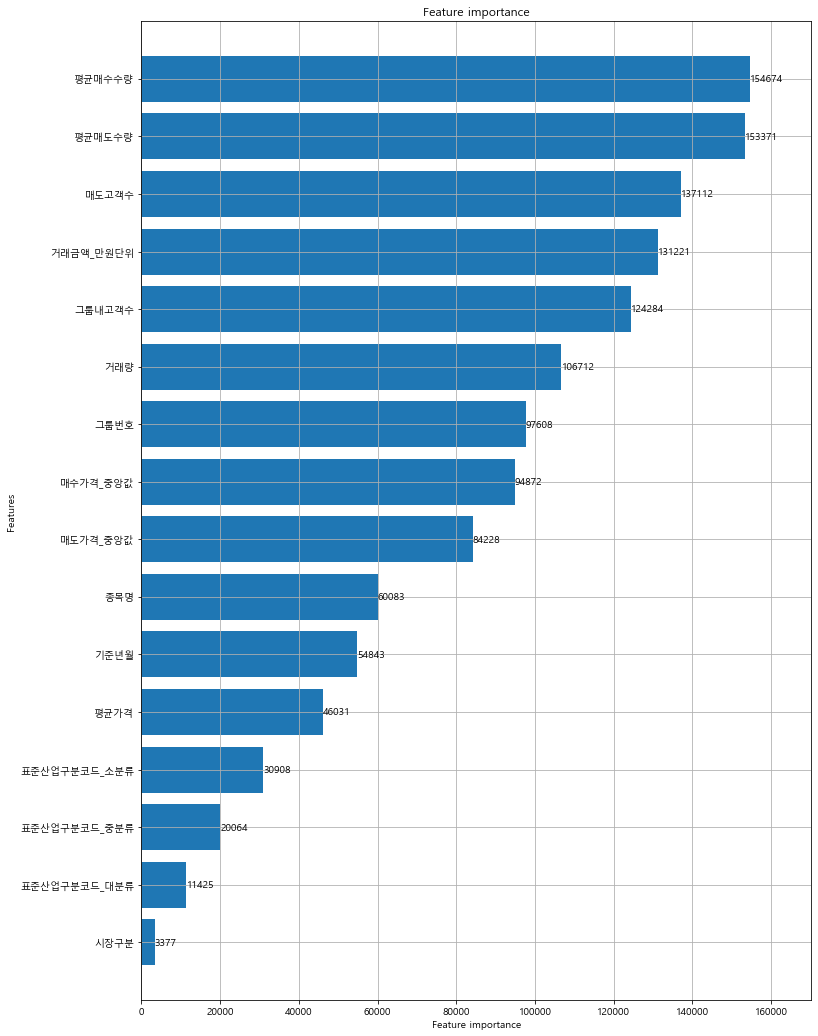

In [35]:
from matplotlib import pylab as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

fig, ax = plt.subplots(figsize=(12,18))

lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)

plt.show()

In [46]:
import numpy as np

y_test =  model.predict(X_test_x)

In [47]:
print(y_test[:20].astype(int))

[ 64   6   3  87  27 209  13   5  30   3  16   4  27  16   3  56  74  20
   6  32]


In [48]:
print(X_test_y[:20])

25275     62
25276      7
25277      5
25278     73
25279     24
25280    147
25281      9
25282      6
25283     24
25284      4
25285     22
25286      3
25287     20
25288     14
25289      3
25290     39
25291     67
25292     20
25293     10
25294     26
Name: 매수고객수, dtype: int64


In [59]:
import pandas as pd

a = pd.read_csv("abcd.csv")
a

,기준년월,그룹내고객수,매수고객수,거래량,거래금액_만원단위,평균가격,직전달TOP3여부,그룹번호,종목번호,표준산업구분코드_중분류,표준산업구분코드_소분류,시장구분
0,201907,288,7,2.993388e+06,0.229490,-0.111103,1,0,3,26,19,1
1,201907,776,23,2.993388e+06,0.229490,-0.111103,1,3,3,26,19,1
2,201907,890,3,2.993388e+06,0.229490,-0.111103,1,4,3,26,19,1
3,201907,1615,27,2.993388e+06,0.229490,-0.111103,1,5,3,26,19,1
4,201907,634,7,2.993388e+06,0.229490,-0.111103,1,8,3,26,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7485,202006,2879,6,1.061898e+05,-0.599464,0.013648,0,42,26,10,22,1
7486,202006,2879,0,1.635518e+06,-0.611417,-0.750732,0,42,32,14,12,1
7487,202006,2879,3,5.442303e+05,-0.624016,-0.734887,0,42,58,7,50,0
7488,202006,2879,6,1.758884e+05,-0.614776,-0.506165,0,42,100,29,26,0


In [60]:
#train:201907~202005
#test:202006
train_mask = (a['기준년월'] != 202006)

X_train = a.loc[train_mask,:]
X_test = a.loc[~train_mask,:]

print(len(X_train))
print(len(X_test))

X_train = X_train.drop('기준년월', axis = 1)
X_test = X_test.drop('기준년월', axis = 1)


#train split
X_train_x = X_train.drop('매수고객수', axis = 1)
X_train_y = X_train['매수고객수']#, axis = 1)

#test split
X_test_x = X_test.drop('매수고객수', axis = 1)
X_test_y = X_test['매수고객수']#, axis = 1)

6254
1236


In [61]:
X_test_x

,그룹내고객수,거래량,거래금액_만원단위,평균가격,직전달TOP3여부,그룹번호,종목번호,표준산업구분코드_중분류,표준산업구분코드_소분류,시장구분
6254,288,4.163192e+06,0.753358,-0.007031,1,0,3,26,19,1
6255,112,4.163192e+06,0.753358,-0.007031,1,1,3,26,19,1
6256,250,4.163192e+06,0.753358,-0.007031,1,2,3,26,19,1
6257,776,4.163192e+06,0.753358,-0.007031,1,3,3,26,19,1
6258,890,4.163192e+06,0.753358,-0.007031,1,4,3,26,19,1
...,...,...,...,...,...,...,...,...,...,...
7485,2879,1.061898e+05,-0.599464,0.013648,0,42,26,10,22,1
7486,2879,1.635518e+06,-0.611417,-0.750732,0,42,32,14,12,1
7487,2879,5.442303e+05,-0.624016,-0.734887,0,42,58,7,50,0
7488,2879,1.758884e+05,-0.614776,-0.506165,0,42,100,29,26,0


In [62]:
model = lgbm_regressor(train_X = X_train_x, train_y = X_train_y, test_X = X_test_x, test_y = X_test_y)

[1]	valid_0's rmse: 43.7684
[2]	valid_0's rmse: 42.9621
[3]	valid_0's rmse: 42.3242
[4]	valid_0's rmse: 41.7259
[5]	valid_0's rmse: 41.7263
[6]	valid_0's rmse: 41.2314
[7]	valid_0's rmse: 40.4197
[8]	valid_0's rmse: 39.9344
[9]	valid_0's rmse: 39.2401
[10]	valid_0's rmse: 38.5228
[11]	valid_0's rmse: 38.5225
[12]	valid_0's rmse: 37.8414
[13]	valid_0's rmse: 37.2778
[14]	valid_0's rmse: 37.2926
[15]	valid_0's rmse: 37.7192
[16]	valid_0's rmse: 37.2772
[17]	valid_0's rmse: 36.7544
[18]	valid_0's rmse: 36.254
[19]	valid_0's rmse: 36.4554
[20]	valid_0's rmse: 36.0741
[21]	valid_0's rmse: 36.197
[22]	valid_0's rmse: 35.8518
[23]	valid_0's rmse: 35.9316
[24]	valid_0's rmse: 35.4745
[25]	valid_0's rmse: 35.1966
[26]	valid_0's rmse: 34.7511
[27]	valid_0's rmse: 34.8587
[28]	valid_0's rmse: 34.5894
[29]	valid_0's rmse: 34.1834
[30]	valid_0's rmse: 34.7802
[31]	valid_0's rmse: 34.4
[32]	valid_0's rmse: 33.9968
[33]	valid_0's rmse: 33.7147
[34]	valid_0's rmse: 33.3896
[35]	valid_0's rmse: 33.0833

[287]	valid_0's rmse: 26.2376
[288]	valid_0's rmse: 26.3159
[289]	valid_0's rmse: 26.2043
[290]	valid_0's rmse: 26.1163
[291]	valid_0's rmse: 26.0252
[292]	valid_0's rmse: 25.9334
[293]	valid_0's rmse: 25.8541
[294]	valid_0's rmse: 25.9236
[295]	valid_0's rmse: 26.0029
[296]	valid_0's rmse: 26.0687
[297]	valid_0's rmse: 26.1486
[298]	valid_0's rmse: 26.2209
[299]	valid_0's rmse: 26.2933
[300]	valid_0's rmse: 26.361
[301]	valid_0's rmse: 26.2228
[302]	valid_0's rmse: 26.125
[303]	valid_0's rmse: 26.1986
[304]	valid_0's rmse: 26.2981
[305]	valid_0's rmse: 26.3516
[306]	valid_0's rmse: 26.4456
[307]	valid_0's rmse: 26.5184
[308]	valid_0's rmse: 26.5941
[309]	valid_0's rmse: 26.4942
[310]	valid_0's rmse: 26.3502
[311]	valid_0's rmse: 26.2103
[312]	valid_0's rmse: 26.2775
[313]	valid_0's rmse: 26.1711
[314]	valid_0's rmse: 26.0156
[315]	valid_0's rmse: 26.0847
[316]	valid_0's rmse: 26.1522
[317]	valid_0's rmse: 26.2288
[318]	valid_0's rmse: 26.085
[319]	valid_0's rmse: 26.1544
[320]	valid_0

[564]	valid_0's rmse: 24.0827
[565]	valid_0's rmse: 24.1292
[566]	valid_0's rmse: 24.1699
[567]	valid_0's rmse: 24.1226
[568]	valid_0's rmse: 24.0993
[569]	valid_0's rmse: 24.078
[570]	valid_0's rmse: 24.1281
[571]	valid_0's rmse: 24.1697
[572]	valid_0's rmse: 24.0797
[573]	valid_0's rmse: 24.003
[574]	valid_0's rmse: 23.9253
[575]	valid_0's rmse: 23.8494
[576]	valid_0's rmse: 23.7883
[577]	valid_0's rmse: 23.7812
[578]	valid_0's rmse: 23.6952
[579]	valid_0's rmse: 23.7442
[580]	valid_0's rmse: 23.7223
[581]	valid_0's rmse: 23.7576
[582]	valid_0's rmse: 23.6904
[583]	valid_0's rmse: 23.7399
[584]	valid_0's rmse: 23.7231
[585]	valid_0's rmse: 23.7805
[586]	valid_0's rmse: 23.7709
[587]	valid_0's rmse: 23.7167
[588]	valid_0's rmse: 23.7642
[589]	valid_0's rmse: 23.8199
[590]	valid_0's rmse: 23.862
[591]	valid_0's rmse: 23.905
[592]	valid_0's rmse: 23.947
[593]	valid_0's rmse: 23.8671
[594]	valid_0's rmse: 23.9176
[595]	valid_0's rmse: 23.96
[596]	valid_0's rmse: 23.9344
[597]	valid_0's r

[842]	valid_0's rmse: 22.3894
[843]	valid_0's rmse: 22.4202
[844]	valid_0's rmse: 22.362
[845]	valid_0's rmse: 22.3952
[846]	valid_0's rmse: 22.3478
[847]	valid_0's rmse: 22.3223
[848]	valid_0's rmse: 22.3554
[849]	valid_0's rmse: 22.3887
[850]	valid_0's rmse: 22.347
[851]	valid_0's rmse: 22.3037
[852]	valid_0's rmse: 22.2753
[853]	valid_0's rmse: 22.3075
[854]	valid_0's rmse: 22.234
[855]	valid_0's rmse: 22.2623
[856]	valid_0's rmse: 22.2929
[857]	valid_0's rmse: 22.2298
[858]	valid_0's rmse: 22.1945
[859]	valid_0's rmse: 22.1706
[860]	valid_0's rmse: 22.2092
[861]	valid_0's rmse: 22.1963
[862]	valid_0's rmse: 22.2277
[863]	valid_0's rmse: 22.212
[864]	valid_0's rmse: 22.1631
[865]	valid_0's rmse: 22.1423
[866]	valid_0's rmse: 22.1733
[867]	valid_0's rmse: 22.1484
[868]	valid_0's rmse: 22.18
[869]	valid_0's rmse: 22.2103
[870]	valid_0's rmse: 22.1933
[871]	valid_0's rmse: 22.1588
[872]	valid_0's rmse: 22.1348
[873]	valid_0's rmse: 22.1088
[874]	valid_0's rmse: 22.1423
[875]	valid_0's 

[1119]	valid_0's rmse: 21.6382
[1120]	valid_0's rmse: 21.6646
[1121]	valid_0's rmse: 21.601
[1122]	valid_0's rmse: 21.6243
[1123]	valid_0's rmse: 21.5986
[1124]	valid_0's rmse: 21.6254
[1125]	valid_0's rmse: 21.6473
[1126]	valid_0's rmse: 21.6707
[1127]	valid_0's rmse: 21.7045
[1128]	valid_0's rmse: 21.7305
[1129]	valid_0's rmse: 21.7545
[1130]	valid_0's rmse: 21.7818
[1131]	valid_0's rmse: 21.8062
[1132]	valid_0's rmse: 21.7867
[1133]	valid_0's rmse: 21.7625
[1134]	valid_0's rmse: 21.7131
[1135]	valid_0's rmse: 21.738
[1136]	valid_0's rmse: 21.6915
[1137]	valid_0's rmse: 21.6542
[1138]	valid_0's rmse: 21.6755
[1139]	valid_0's rmse: 21.6975
[1140]	valid_0's rmse: 21.7229
[1141]	valid_0's rmse: 21.6886
[1142]	valid_0's rmse: 21.6583
[1143]	valid_0's rmse: 21.6221
[1144]	valid_0's rmse: 21.6052
[1145]	valid_0's rmse: 21.6288
[1146]	valid_0's rmse: 21.6121
[1147]	valid_0's rmse: 21.5523
[1148]	valid_0's rmse: 21.5753
[1149]	valid_0's rmse: 21.5993
[1150]	valid_0's rmse: 21.6249
[1151]	val

[1386]	valid_0's rmse: 20.9063
[1387]	valid_0's rmse: 20.9248
[1388]	valid_0's rmse: 20.9028
[1389]	valid_0's rmse: 20.891
[1390]	valid_0's rmse: 20.9083
[1391]	valid_0's rmse: 20.9287
[1392]	valid_0's rmse: 20.9173
[1393]	valid_0's rmse: 20.9386
[1394]	valid_0's rmse: 20.9671
[1395]	valid_0's rmse: 20.9312
[1396]	valid_0's rmse: 20.9514
[1397]	valid_0's rmse: 20.9726
[1398]	valid_0's rmse: 20.9904
[1399]	valid_0's rmse: 20.9787
[1400]	valid_0's rmse: 20.9348
[1401]	valid_0's rmse: 20.9163
[1402]	valid_0's rmse: 20.8976
[1403]	valid_0's rmse: 20.8728
[1404]	valid_0's rmse: 20.8486
[1405]	valid_0's rmse: 20.8658
[1406]	valid_0's rmse: 20.8835
[1407]	valid_0's rmse: 20.9025
[1408]	valid_0's rmse: 20.8793
[1409]	valid_0's rmse: 20.9005
[1410]	valid_0's rmse: 20.8744
[1411]	valid_0's rmse: 20.8582
[1412]	valid_0's rmse: 20.8027
[1413]	valid_0's rmse: 20.7893
[1414]	valid_0's rmse: 20.8123
[1415]	valid_0's rmse: 20.7718
[1416]	valid_0's rmse: 20.7885
[1417]	valid_0's rmse: 20.8055
[1418]	va

[1656]	valid_0's rmse: 20.6115
[1657]	valid_0's rmse: 20.5653
[1658]	valid_0's rmse: 20.5158
[1659]	valid_0's rmse: 20.4676
[1660]	valid_0's rmse: 20.4342
[1661]	valid_0's rmse: 20.4052
[1662]	valid_0's rmse: 20.4202
[1663]	valid_0's rmse: 20.4104
[1664]	valid_0's rmse: 20.433
[1665]	valid_0's rmse: 20.4102
[1666]	valid_0's rmse: 20.4274
[1667]	valid_0's rmse: 20.4413
[1668]	valid_0's rmse: 20.4572
[1669]	valid_0's rmse: 20.4719
[1670]	valid_0's rmse: 20.4889
[1671]	valid_0's rmse: 20.5082
[1672]	valid_0's rmse: 20.5246
[1673]	valid_0's rmse: 20.5451
[1674]	valid_0's rmse: 20.5239
[1675]	valid_0's rmse: 20.4978
[1676]	valid_0's rmse: 20.5129
[1677]	valid_0's rmse: 20.5271
[1678]	valid_0's rmse: 20.5435
[1679]	valid_0's rmse: 20.5627
[1680]	valid_0's rmse: 20.5286
[1681]	valid_0's rmse: 20.5026
[1682]	valid_0's rmse: 20.5164
[1683]	valid_0's rmse: 20.5328
[1684]	valid_0's rmse: 20.5474
[1685]	valid_0's rmse: 20.5214
[1686]	valid_0's rmse: 20.4847
[1687]	valid_0's rmse: 20.4587
[1688]	va

[1928]	valid_0's rmse: 19.9869
[1929]	valid_0's rmse: 20.0027
[1930]	valid_0's rmse: 20.0222
[1931]	valid_0's rmse: 20.0353
[1932]	valid_0's rmse: 20.0243
[1933]	valid_0's rmse: 19.9952
[1934]	valid_0's rmse: 20.0081
[1935]	valid_0's rmse: 19.9802
[1936]	valid_0's rmse: 19.9593
[1937]	valid_0's rmse: 19.9322
[1938]	valid_0's rmse: 19.8995
[1939]	valid_0's rmse: 19.9027
[1940]	valid_0's rmse: 19.9143
[1941]	valid_0's rmse: 19.9274
[1942]	valid_0's rmse: 19.94
[1943]	valid_0's rmse: 19.9535
[1944]	valid_0's rmse: 19.9666
[1945]	valid_0's rmse: 19.9717
[1946]	valid_0's rmse: 19.9837
[1947]	valid_0's rmse: 19.9795
[1948]	valid_0's rmse: 19.9947
[1949]	valid_0's rmse: 20.0105
[1950]	valid_0's rmse: 20.0039
[1951]	valid_0's rmse: 20.0181
[1952]	valid_0's rmse: 20.0319
[1953]	valid_0's rmse: 20.0348
[1954]	valid_0's rmse: 20.0108
[1955]	valid_0's rmse: 20.0256
[1956]	valid_0's rmse: 20.0389
[1957]	valid_0's rmse: 20.019
[1958]	valid_0's rmse: 20.0062
[1959]	valid_0's rmse: 19.9965
[1960]	vali

[2200]	valid_0's rmse: 19.936
[2201]	valid_0's rmse: 19.9283
[2202]	valid_0's rmse: 19.941
[2203]	valid_0's rmse: 19.9531
[2204]	valid_0's rmse: 19.9681
[2205]	valid_0's rmse: 19.9828
[2206]	valid_0's rmse: 19.9943
[2207]	valid_0's rmse: 19.9769
[2208]	valid_0's rmse: 19.94
[2209]	valid_0's rmse: 19.9551
[2210]	valid_0's rmse: 19.968
[2211]	valid_0's rmse: 19.9815
[2212]	valid_0's rmse: 19.9946
[2213]	valid_0's rmse: 20.0074
[2214]	valid_0's rmse: 20.0194
[2215]	valid_0's rmse: 20.0023
[2216]	valid_0's rmse: 20.0147
[2217]	valid_0's rmse: 19.9952
[2218]	valid_0's rmse: 19.9769
[2219]	valid_0's rmse: 19.9656
[2220]	valid_0's rmse: 19.924
[2221]	valid_0's rmse: 19.9107
[2222]	valid_0's rmse: 19.9034
[2223]	valid_0's rmse: 19.9153
[2224]	valid_0's rmse: 19.8975
[2225]	valid_0's rmse: 19.8922
[2226]	valid_0's rmse: 19.9077
[2227]	valid_0's rmse: 19.9018
[2228]	valid_0's rmse: 19.8931
[2229]	valid_0's rmse: 19.889
[2230]	valid_0's rmse: 19.8995
[2231]	valid_0's rmse: 19.8961
[2232]	valid_0'

[2467]	valid_0's rmse: 19.8213
[2468]	valid_0's rmse: 19.8127
[2469]	valid_0's rmse: 19.8267
[2470]	valid_0's rmse: 19.8098
[2471]	valid_0's rmse: 19.7891
[2472]	valid_0's rmse: 19.8005
[2473]	valid_0's rmse: 19.8126
[2474]	valid_0's rmse: 19.8236
[2475]	valid_0's rmse: 19.8375
[2476]	valid_0's rmse: 19.8129
[2477]	valid_0's rmse: 19.823
[2478]	valid_0's rmse: 19.7975
[2479]	valid_0's rmse: 19.8081
[2480]	valid_0's rmse: 19.7917
[2481]	valid_0's rmse: 19.8043
[2482]	valid_0's rmse: 19.7878
[2483]	valid_0's rmse: 19.7731
[2484]	valid_0's rmse: 19.7593
[2485]	valid_0's rmse: 19.7457
[2486]	valid_0's rmse: 19.754
[2487]	valid_0's rmse: 19.7631
[2488]	valid_0's rmse: 19.7738
[2489]	valid_0's rmse: 19.762
[2490]	valid_0's rmse: 19.7509
[2491]	valid_0's rmse: 19.7645
[2492]	valid_0's rmse: 19.7761
[2493]	valid_0's rmse: 19.7706
[2494]	valid_0's rmse: 19.7819
[2495]	valid_0's rmse: 19.7955
[2496]	valid_0's rmse: 19.7864
[2497]	valid_0's rmse: 19.7953
[2498]	valid_0's rmse: 19.7869
[2499]	vali

[2734]	valid_0's rmse: 19.7775
[2735]	valid_0's rmse: 19.7883
[2736]	valid_0's rmse: 19.798
[2737]	valid_0's rmse: 19.7883
[2738]	valid_0's rmse: 19.7739
[2739]	valid_0's rmse: 19.7623
[2740]	valid_0's rmse: 19.7579
[2741]	valid_0's rmse: 19.7662
[2742]	valid_0's rmse: 19.763
[2743]	valid_0's rmse: 19.7569
[2744]	valid_0's rmse: 19.7655
[2745]	valid_0's rmse: 19.7746
[2746]	valid_0's rmse: 19.7684
[2747]	valid_0's rmse: 19.7597
[2748]	valid_0's rmse: 19.7689
[2749]	valid_0's rmse: 19.7778
[2750]	valid_0's rmse: 19.7703
[2751]	valid_0's rmse: 19.7792
[2752]	valid_0's rmse: 19.7559
[2753]	valid_0's rmse: 19.7344
[2754]	valid_0's rmse: 19.7452
[2755]	valid_0's rmse: 19.7537
[2756]	valid_0's rmse: 19.7636
[2757]	valid_0's rmse: 19.7529
[2758]	valid_0's rmse: 19.743
[2759]	valid_0's rmse: 19.7536
[2760]	valid_0's rmse: 19.7629
[2761]	valid_0's rmse: 19.7588
[2762]	valid_0's rmse: 19.7687
[2763]	valid_0's rmse: 19.7787
[2764]	valid_0's rmse: 19.7894
[2765]	valid_0's rmse: 19.7833
[2766]	vali

[3004]	valid_0's rmse: 19.7831
[3005]	valid_0's rmse: 19.7791
[3006]	valid_0's rmse: 19.7885
[3007]	valid_0's rmse: 19.7983
[3008]	valid_0's rmse: 19.8085
[3009]	valid_0's rmse: 19.8188
[3010]	valid_0's rmse: 19.8272
[3011]	valid_0's rmse: 19.8053
[3012]	valid_0's rmse: 19.8147
[3013]	valid_0's rmse: 19.8218
[3014]	valid_0's rmse: 19.8291
[3015]	valid_0's rmse: 19.8213
[3016]	valid_0's rmse: 19.8088
[3017]	valid_0's rmse: 19.8205
[3018]	valid_0's rmse: 19.8281
[3019]	valid_0's rmse: 19.8353
[3020]	valid_0's rmse: 19.8422
[3021]	valid_0's rmse: 19.8184
[3022]	valid_0's rmse: 19.8056
[3023]	valid_0's rmse: 19.783
[3024]	valid_0's rmse: 19.7953
[3025]	valid_0's rmse: 19.7733
[3026]	valid_0's rmse: 19.7836
[3027]	valid_0's rmse: 19.7911
[3028]	valid_0's rmse: 19.7996
[3029]	valid_0's rmse: 19.8061
[3030]	valid_0's rmse: 19.8016
[3031]	valid_0's rmse: 19.7798
[3032]	valid_0's rmse: 19.7596
[3033]	valid_0's rmse: 19.7698
[3034]	valid_0's rmse: 19.7794
[3035]	valid_0's rmse: 19.7894
[3036]	va

[3270]	valid_0's rmse: 19.5031
[3271]	valid_0's rmse: 19.5007
[3272]	valid_0's rmse: 19.5072
[3273]	valid_0's rmse: 19.5157
[3274]	valid_0's rmse: 19.5233
[3275]	valid_0's rmse: 19.5321
[3276]	valid_0's rmse: 19.5386
[3277]	valid_0's rmse: 19.5361
[3278]	valid_0's rmse: 19.5395
[3279]	valid_0's rmse: 19.5407
[3280]	valid_0's rmse: 19.5411
[3281]	valid_0's rmse: 19.5492
[3282]	valid_0's rmse: 19.5565
[3283]	valid_0's rmse: 19.5553
[3284]	valid_0's rmse: 19.563
[3285]	valid_0's rmse: 19.5698
[3286]	valid_0's rmse: 19.5683
[3287]	valid_0's rmse: 19.5761
[3288]	valid_0's rmse: 19.5835
[3289]	valid_0's rmse: 19.5745
[3290]	valid_0's rmse: 19.5812
[3291]	valid_0's rmse: 19.5898
[3292]	valid_0's rmse: 19.5864
[3293]	valid_0's rmse: 19.5946
[3294]	valid_0's rmse: 19.5919
[3295]	valid_0's rmse: 19.5731
[3296]	valid_0's rmse: 19.5826
[3297]	valid_0's rmse: 19.5899
[3298]	valid_0's rmse: 19.5744
[3299]	valid_0's rmse: 19.5827
[3300]	valid_0's rmse: 19.5907
[3301]	valid_0's rmse: 19.5996
[3302]	va

[3536]	valid_0's rmse: 19.5561
[3537]	valid_0's rmse: 19.563
[3538]	valid_0's rmse: 19.5544
[3539]	valid_0's rmse: 19.537
[3540]	valid_0's rmse: 19.5448
[3541]	valid_0's rmse: 19.5429
[3542]	valid_0's rmse: 19.5386
[3543]	valid_0's rmse: 19.5289
[3544]	valid_0's rmse: 19.527
[3545]	valid_0's rmse: 19.5249
[3546]	valid_0's rmse: 19.5111
[3547]	valid_0's rmse: 19.5193
[3548]	valid_0's rmse: 19.5122
[3549]	valid_0's rmse: 19.499
[3550]	valid_0's rmse: 19.5067
[3551]	valid_0's rmse: 19.5144
[3552]	valid_0's rmse: 19.5243
[3553]	valid_0's rmse: 19.532
[3554]	valid_0's rmse: 19.5385
[3555]	valid_0's rmse: 19.5454
[3556]	valid_0's rmse: 19.5325
[3557]	valid_0's rmse: 19.5386
[3558]	valid_0's rmse: 19.5272
[3559]	valid_0's rmse: 19.5093
[3560]	valid_0's rmse: 19.5159
[3561]	valid_0's rmse: 19.5035
[3562]	valid_0's rmse: 19.4909
[3563]	valid_0's rmse: 19.4784
[3564]	valid_0's rmse: 19.4691
[3565]	valid_0's rmse: 19.4638
[3566]	valid_0's rmse: 19.4697
[3567]	valid_0's rmse: 19.4756
[3568]	valid_

[3802]	valid_0's rmse: 19.433
[3803]	valid_0's rmse: 19.4386
[3804]	valid_0's rmse: 19.4482
[3805]	valid_0's rmse: 19.4414
[3806]	valid_0's rmse: 19.4388
[3807]	valid_0's rmse: 19.4285
[3808]	valid_0's rmse: 19.4346
[3809]	valid_0's rmse: 19.428
[3810]	valid_0's rmse: 19.413
[3811]	valid_0's rmse: 19.4205
[3812]	valid_0's rmse: 19.4143
[3813]	valid_0's rmse: 19.4077
[3814]	valid_0's rmse: 19.4131
[3815]	valid_0's rmse: 19.4186
[3816]	valid_0's rmse: 19.4285
[3817]	valid_0's rmse: 19.4308
[3818]	valid_0's rmse: 19.4368
[3819]	valid_0's rmse: 19.4431
[3820]	valid_0's rmse: 19.4507
[3821]	valid_0's rmse: 19.4525
[3822]	valid_0's rmse: 19.4603
[3823]	valid_0's rmse: 19.4721
[3824]	valid_0's rmse: 19.4792
[3825]	valid_0's rmse: 19.4853
[3826]	valid_0's rmse: 19.4608
[3827]	valid_0's rmse: 19.47
[3828]	valid_0's rmse: 19.4571
[3829]	valid_0's rmse: 19.4514
[3830]	valid_0's rmse: 19.4463
[3831]	valid_0's rmse: 19.4415
[3832]	valid_0's rmse: 19.4482
[3833]	valid_0's rmse: 19.4555
[3834]	valid_

[4073]	valid_0's rmse: 19.4058
[4074]	valid_0's rmse: 19.4123
[4075]	valid_0's rmse: 19.4194
[4076]	valid_0's rmse: 19.4142
[4077]	valid_0's rmse: 19.4103
[4078]	valid_0's rmse: 19.4087
[4079]	valid_0's rmse: 19.4146
[4080]	valid_0's rmse: 19.4214
[4081]	valid_0's rmse: 19.4261
[4082]	valid_0's rmse: 19.4333
[4083]	valid_0's rmse: 19.4313
[4084]	valid_0's rmse: 19.4307
[4085]	valid_0's rmse: 19.4266
[4086]	valid_0's rmse: 19.427
[4087]	valid_0's rmse: 19.4291
[4088]	valid_0's rmse: 19.4352
[4089]	valid_0's rmse: 19.4443
[4090]	valid_0's rmse: 19.4446
[4091]	valid_0's rmse: 19.4519
[4092]	valid_0's rmse: 19.4586
[4093]	valid_0's rmse: 19.4664
[4094]	valid_0's rmse: 19.4549
[4095]	valid_0's rmse: 19.448
[4096]	valid_0's rmse: 19.4457
[4097]	valid_0's rmse: 19.4413
[4098]	valid_0's rmse: 19.4349
[4099]	valid_0's rmse: 19.4214
[4100]	valid_0's rmse: 19.4157
[4101]	valid_0's rmse: 19.4047
[4102]	valid_0's rmse: 19.4135
[4103]	valid_0's rmse: 19.4086
[4104]	valid_0's rmse: 19.4148
[4105]	val

[4339]	valid_0's rmse: 19.3127
[4340]	valid_0's rmse: 19.3218
[4341]	valid_0's rmse: 19.3147
[4342]	valid_0's rmse: 19.321
[4343]	valid_0's rmse: 19.327
[4344]	valid_0's rmse: 19.3315
[4345]	valid_0's rmse: 19.3379
[4346]	valid_0's rmse: 19.3356
[4347]	valid_0's rmse: 19.3415
[4348]	valid_0's rmse: 19.3479
[4349]	valid_0's rmse: 19.3537
[4350]	valid_0's rmse: 19.358
[4351]	valid_0's rmse: 19.3544
[4352]	valid_0's rmse: 19.3619
[4353]	valid_0's rmse: 19.3665
[4354]	valid_0's rmse: 19.3736
[4355]	valid_0's rmse: 19.3702
[4356]	valid_0's rmse: 19.3759
[4357]	valid_0's rmse: 19.3709
[4358]	valid_0's rmse: 19.3766
[4359]	valid_0's rmse: 19.3738
[4360]	valid_0's rmse: 19.3799
[4361]	valid_0's rmse: 19.3852
[4362]	valid_0's rmse: 19.3905
[4363]	valid_0's rmse: 19.3906
[4364]	valid_0's rmse: 19.3953
[4365]	valid_0's rmse: 19.3857
[4366]	valid_0's rmse: 19.3923
[4367]	valid_0's rmse: 19.3972
[4368]	valid_0's rmse: 19.3981
[4369]	valid_0's rmse: 19.4062
[4370]	valid_0's rmse: 19.3936
[4371]	vali

[4612]	valid_0's rmse: 19.3718
[4613]	valid_0's rmse: 19.3637
[4614]	valid_0's rmse: 19.3543
[4615]	valid_0's rmse: 19.3602
[4616]	valid_0's rmse: 19.3664
[4617]	valid_0's rmse: 19.3614
[4618]	valid_0's rmse: 19.3529
[4619]	valid_0's rmse: 19.3315
[4620]	valid_0's rmse: 19.3255
[4621]	valid_0's rmse: 19.3182
[4622]	valid_0's rmse: 19.3247
[4623]	valid_0's rmse: 19.3293
[4624]	valid_0's rmse: 19.336
[4625]	valid_0's rmse: 19.328
[4626]	valid_0's rmse: 19.3285
[4627]	valid_0's rmse: 19.3338
[4628]	valid_0's rmse: 19.3413
[4629]	valid_0's rmse: 19.3514
[4630]	valid_0's rmse: 19.3419
[4631]	valid_0's rmse: 19.3464
[4632]	valid_0's rmse: 19.3514
[4633]	valid_0's rmse: 19.3432
[4634]	valid_0's rmse: 19.3501
[4635]	valid_0's rmse: 19.3422
[4636]	valid_0's rmse: 19.3478
[4637]	valid_0's rmse: 19.3546
[4638]	valid_0's rmse: 19.3551
[4639]	valid_0's rmse: 19.352
[4640]	valid_0's rmse: 19.3416
[4641]	valid_0's rmse: 19.3404
[4642]	valid_0's rmse: 19.3455
[4643]	valid_0's rmse: 19.3411
[4644]	vali

[4879]	valid_0's rmse: 19.3778
[4880]	valid_0's rmse: 19.3765
[4881]	valid_0's rmse: 19.3754
[4882]	valid_0's rmse: 19.3804
[4883]	valid_0's rmse: 19.3756
[4884]	valid_0's rmse: 19.3804
[4885]	valid_0's rmse: 19.3846
[4886]	valid_0's rmse: 19.3619
[4887]	valid_0's rmse: 19.346
[4888]	valid_0's rmse: 19.3409
[4889]	valid_0's rmse: 19.3339
[4890]	valid_0's rmse: 19.3438
[4891]	valid_0's rmse: 19.3486
[4892]	valid_0's rmse: 19.3455
[4893]	valid_0's rmse: 19.3534
[4894]	valid_0's rmse: 19.3581
[4895]	valid_0's rmse: 19.3393
[4896]	valid_0's rmse: 19.3319
[4897]	valid_0's rmse: 19.3251
[4898]	valid_0's rmse: 19.3226
[4899]	valid_0's rmse: 19.3273
[4900]	valid_0's rmse: 19.3332
[4901]	valid_0's rmse: 19.3378
[4902]	valid_0's rmse: 19.3268
[4903]	valid_0's rmse: 19.3316
[4904]	valid_0's rmse: 19.3278
[4905]	valid_0's rmse: 19.3331
[4906]	valid_0's rmse: 19.3388
[4907]	valid_0's rmse: 19.3386
[4908]	valid_0's rmse: 19.3441
[4909]	valid_0's rmse: 19.3507
[4910]	valid_0's rmse: 19.3559
[4911]	va

[5147]	valid_0's rmse: 19.4164
[5148]	valid_0's rmse: 19.4211
[5149]	valid_0's rmse: 19.413
[5150]	valid_0's rmse: 19.4071
[5151]	valid_0's rmse: 19.4009
[5152]	valid_0's rmse: 19.3931
[5153]	valid_0's rmse: 19.3852
[5154]	valid_0's rmse: 19.3783
[5155]	valid_0's rmse: 19.371
[5156]	valid_0's rmse: 19.3742
[5157]	valid_0's rmse: 19.3794
[5158]	valid_0's rmse: 19.3858
[5159]	valid_0's rmse: 19.3898
[5160]	valid_0's rmse: 19.3939
[5161]	valid_0's rmse: 19.3884
[5162]	valid_0's rmse: 19.3923
[5163]	valid_0's rmse: 19.3977
[5164]	valid_0's rmse: 19.3889
[5165]	valid_0's rmse: 19.3814
[5166]	valid_0's rmse: 19.3867
[5167]	valid_0's rmse: 19.3792
[5168]	valid_0's rmse: 19.386
[5169]	valid_0's rmse: 19.3903
[5170]	valid_0's rmse: 19.3866
[5171]	valid_0's rmse: 19.3787
[5172]	valid_0's rmse: 19.37
[5173]	valid_0's rmse: 19.3758
[5174]	valid_0's rmse: 19.3798
[5175]	valid_0's rmse: 19.3757
[5176]	valid_0's rmse: 19.372
[5177]	valid_0's rmse: 19.3781
[5178]	valid_0's rmse: 19.3738
[5179]	valid_0

[5414]	valid_0's rmse: 19.3926
[5415]	valid_0's rmse: 19.3886
[5416]	valid_0's rmse: 19.3857
[5417]	valid_0's rmse: 19.3916
[5418]	valid_0's rmse: 19.3888
[5419]	valid_0's rmse: 19.3814
[5420]	valid_0's rmse: 19.3865
[5421]	valid_0's rmse: 19.3771
[5422]	valid_0's rmse: 19.3676
[5423]	valid_0's rmse: 19.3623
[5424]	valid_0's rmse: 19.357
[5425]	valid_0's rmse: 19.3612
[5426]	valid_0's rmse: 19.3653
[5427]	valid_0's rmse: 19.362
[5428]	valid_0's rmse: 19.3666
[5429]	valid_0's rmse: 19.3704
[5430]	valid_0's rmse: 19.3742
[5431]	valid_0's rmse: 19.3795
[5432]	valid_0's rmse: 19.384
[5433]	valid_0's rmse: 19.391
[5434]	valid_0's rmse: 19.3951
[5435]	valid_0's rmse: 19.3987
[5436]	valid_0's rmse: 19.3995
[5437]	valid_0's rmse: 19.3909
[5438]	valid_0's rmse: 19.3954
[5439]	valid_0's rmse: 19.3851
[5440]	valid_0's rmse: 19.3769
[5441]	valid_0's rmse: 19.3793
[5442]	valid_0's rmse: 19.3749
[5443]	valid_0's rmse: 19.3789
[5444]	valid_0's rmse: 19.3822
[5445]	valid_0's rmse: 19.3858
[5446]	valid

[5685]	valid_0's rmse: 19.3276
[5686]	valid_0's rmse: 19.3282
[5687]	valid_0's rmse: 19.3324
[5688]	valid_0's rmse: 19.324
[5689]	valid_0's rmse: 19.3224
[5690]	valid_0's rmse: 19.3206
[5691]	valid_0's rmse: 19.3193
[5692]	valid_0's rmse: 19.3245
[5693]	valid_0's rmse: 19.3178
[5694]	valid_0's rmse: 19.3181
[5695]	valid_0's rmse: 19.322
[5696]	valid_0's rmse: 19.3292
[5697]	valid_0's rmse: 19.3233
[5698]	valid_0's rmse: 19.323
[5699]	valid_0's rmse: 19.3268
[5700]	valid_0's rmse: 19.3258
[5701]	valid_0's rmse: 19.3199
[5702]	valid_0's rmse: 19.3252
[5703]	valid_0's rmse: 19.3186
[5704]	valid_0's rmse: 19.3239
[5705]	valid_0's rmse: 19.3196
[5706]	valid_0's rmse: 19.3238
[5707]	valid_0's rmse: 19.3245
[5708]	valid_0's rmse: 19.3296
[5709]	valid_0's rmse: 19.3348
[5710]	valid_0's rmse: 19.3343
[5711]	valid_0's rmse: 19.3344
[5712]	valid_0's rmse: 19.3397
[5713]	valid_0's rmse: 19.3452
[5714]	valid_0's rmse: 19.3521
[5715]	valid_0's rmse: 19.3553
[5716]	valid_0's rmse: 19.3533
[5717]	vali

[5951]	valid_0's rmse: 19.3951
[5952]	valid_0's rmse: 19.3898
[5953]	valid_0's rmse: 19.3817
[5954]	valid_0's rmse: 19.3813
[5955]	valid_0's rmse: 19.3886
[5956]	valid_0's rmse: 19.3806
[5957]	valid_0's rmse: 19.3756
[5958]	valid_0's rmse: 19.3815
[5959]	valid_0's rmse: 19.3732
[5960]	valid_0's rmse: 19.3688
[5961]	valid_0's rmse: 19.3647
[5962]	valid_0's rmse: 19.3552
[5963]	valid_0's rmse: 19.3431
[5964]	valid_0's rmse: 19.3482
[5965]	valid_0's rmse: 19.3383
[5966]	valid_0's rmse: 19.3449
[5967]	valid_0's rmse: 19.3401
[5968]	valid_0's rmse: 19.3388
[5969]	valid_0's rmse: 19.3449
[5970]	valid_0's rmse: 19.3393
[5971]	valid_0's rmse: 19.3363
[5972]	valid_0's rmse: 19.3386
[5973]	valid_0's rmse: 19.3389
[5974]	valid_0's rmse: 19.3349
[5975]	valid_0's rmse: 19.3381
[5976]	valid_0's rmse: 19.3381
[5977]	valid_0's rmse: 19.3443
[5978]	valid_0's rmse: 19.3439
[5979]	valid_0's rmse: 19.3412
[5980]	valid_0's rmse: 19.3398
[5981]	valid_0's rmse: 19.3398
[5982]	valid_0's rmse: 19.3448
[5983]	v

[6223]	valid_0's rmse: 19.2701
[6224]	valid_0's rmse: 19.2641
[6225]	valid_0's rmse: 19.2677
[6226]	valid_0's rmse: 19.2713
[6227]	valid_0's rmse: 19.2774
[6228]	valid_0's rmse: 19.2825
[6229]	valid_0's rmse: 19.2802
[6230]	valid_0's rmse: 19.2834
[6231]	valid_0's rmse: 19.2882
[6232]	valid_0's rmse: 19.2856
[6233]	valid_0's rmse: 19.2935
[6234]	valid_0's rmse: 19.2911
[6235]	valid_0's rmse: 19.2823
[6236]	valid_0's rmse: 19.2754
[6237]	valid_0's rmse: 19.2803
[6238]	valid_0's rmse: 19.2704
[6239]	valid_0's rmse: 19.268
[6240]	valid_0's rmse: 19.263
[6241]	valid_0's rmse: 19.2686
[6242]	valid_0's rmse: 19.2628
[6243]	valid_0's rmse: 19.2573
[6244]	valid_0's rmse: 19.2605
[6245]	valid_0's rmse: 19.2568
[6246]	valid_0's rmse: 19.2603
[6247]	valid_0's rmse: 19.2601
[6248]	valid_0's rmse: 19.266
[6249]	valid_0's rmse: 19.2669
[6250]	valid_0's rmse: 19.2719
[6251]	valid_0's rmse: 19.2702
[6252]	valid_0's rmse: 19.2733
[6253]	valid_0's rmse: 19.2657
[6254]	valid_0's rmse: 19.2558
[6255]	vali

[6490]	valid_0's rmse: 19.2253
[6491]	valid_0's rmse: 19.2284
[6492]	valid_0's rmse: 19.2171
[6493]	valid_0's rmse: 19.2153
[6494]	valid_0's rmse: 19.2208
[6495]	valid_0's rmse: 19.2245
[6496]	valid_0's rmse: 19.2281
[6497]	valid_0's rmse: 19.2237
[6498]	valid_0's rmse: 19.2274
[6499]	valid_0's rmse: 19.2342
[6500]	valid_0's rmse: 19.2192
[6501]	valid_0's rmse: 19.2215
[6502]	valid_0's rmse: 19.215
[6503]	valid_0's rmse: 19.219
[6504]	valid_0's rmse: 19.2117
[6505]	valid_0's rmse: 19.215
[6506]	valid_0's rmse: 19.2186
[6507]	valid_0's rmse: 19.2156
[6508]	valid_0's rmse: 19.2097
[6509]	valid_0's rmse: 19.2129
[6510]	valid_0's rmse: 19.2175
[6511]	valid_0's rmse: 19.2217
[6512]	valid_0's rmse: 19.2248
[6513]	valid_0's rmse: 19.2251
[6514]	valid_0's rmse: 19.2309
[6515]	valid_0's rmse: 19.2359
[6516]	valid_0's rmse: 19.2364
[6517]	valid_0's rmse: 19.2399
[6518]	valid_0's rmse: 19.2373
[6519]	valid_0's rmse: 19.2325
[6520]	valid_0's rmse: 19.2358
[6521]	valid_0's rmse: 19.2285
[6522]	vali

[6760]	valid_0's rmse: 19.2354
[6761]	valid_0's rmse: 19.2397
[6762]	valid_0's rmse: 19.2362
[6763]	valid_0's rmse: 19.2334
[6764]	valid_0's rmse: 19.2374
[6765]	valid_0's rmse: 19.2373
[6766]	valid_0's rmse: 19.2294
[6767]	valid_0's rmse: 19.2284
[6768]	valid_0's rmse: 19.2272
[6769]	valid_0's rmse: 19.2318
[6770]	valid_0's rmse: 19.2349
[6771]	valid_0's rmse: 19.2391
[6772]	valid_0's rmse: 19.2422
[6773]	valid_0's rmse: 19.2453
[6774]	valid_0's rmse: 19.2486
[6775]	valid_0's rmse: 19.2408
[6776]	valid_0's rmse: 19.2323
[6777]	valid_0's rmse: 19.2344
[6778]	valid_0's rmse: 19.2373
[6779]	valid_0's rmse: 19.2338
[6780]	valid_0's rmse: 19.2304
[6781]	valid_0's rmse: 19.233
[6782]	valid_0's rmse: 19.2264
[6783]	valid_0's rmse: 19.2228
[6784]	valid_0's rmse: 19.2258
[6785]	valid_0's rmse: 19.2292
[6786]	valid_0's rmse: 19.2346
[6787]	valid_0's rmse: 19.2309
[6788]	valid_0's rmse: 19.2282
[6789]	valid_0's rmse: 19.2304
[6790]	valid_0's rmse: 19.2304
[6791]	valid_0's rmse: 19.2352
[6792]	va

[7030]	valid_0's rmse: 19.2104
[7031]	valid_0's rmse: 19.2072
[7032]	valid_0's rmse: 19.2113
[7033]	valid_0's rmse: 19.2013
[7034]	valid_0's rmse: 19.2012
[7035]	valid_0's rmse: 19.2038
[7036]	valid_0's rmse: 19.2076
[7037]	valid_0's rmse: 19.1973
[7038]	valid_0's rmse: 19.1998
[7039]	valid_0's rmse: 19.1966
[7040]	valid_0's rmse: 19.2
[7041]	valid_0's rmse: 19.2039
[7042]	valid_0's rmse: 19.2095
[7043]	valid_0's rmse: 19.2002
[7044]	valid_0's rmse: 19.2033
[7045]	valid_0's rmse: 19.2036
[7046]	valid_0's rmse: 19.2063
[7047]	valid_0's rmse: 19.2104
[7048]	valid_0's rmse: 19.2145
[7049]	valid_0's rmse: 19.2091
[7050]	valid_0's rmse: 19.2021
[7051]	valid_0's rmse: 19.2053
[7052]	valid_0's rmse: 19.2081
[7053]	valid_0's rmse: 19.2107
[7054]	valid_0's rmse: 19.2138
[7055]	valid_0's rmse: 19.2166
[7056]	valid_0's rmse: 19.2148
[7057]	valid_0's rmse: 19.2204
[7058]	valid_0's rmse: 19.214
[7059]	valid_0's rmse: 19.2174
[7060]	valid_0's rmse: 19.2205
[7061]	valid_0's rmse: 19.224
[7062]	valid_

[7296]	valid_0's rmse: 19.2435
[7297]	valid_0's rmse: 19.2391
[7298]	valid_0's rmse: 19.2424
[7299]	valid_0's rmse: 19.2398
[7300]	valid_0's rmse: 19.237
[7301]	valid_0's rmse: 19.2397
[7302]	valid_0's rmse: 19.2371
[7303]	valid_0's rmse: 19.2375
[7304]	valid_0's rmse: 19.2408
[7305]	valid_0's rmse: 19.2384
[7306]	valid_0's rmse: 19.2415
[7307]	valid_0's rmse: 19.2441
[7308]	valid_0's rmse: 19.248
[7309]	valid_0's rmse: 19.2478
[7310]	valid_0's rmse: 19.2503
[7311]	valid_0's rmse: 19.2524
[7312]	valid_0's rmse: 19.2553
[7313]	valid_0's rmse: 19.2518
[7314]	valid_0's rmse: 19.2523
[7315]	valid_0's rmse: 19.2419
[7316]	valid_0's rmse: 19.2457
[7317]	valid_0's rmse: 19.2489
[7318]	valid_0's rmse: 19.2539
[7319]	valid_0's rmse: 19.2572
[7320]	valid_0's rmse: 19.2505
[7321]	valid_0's rmse: 19.2532
[7322]	valid_0's rmse: 19.2482
[7323]	valid_0's rmse: 19.2435
[7324]	valid_0's rmse: 19.2371
[7325]	valid_0's rmse: 19.2395
[7326]	valid_0's rmse: 19.2313
[7327]	valid_0's rmse: 19.2348
[7328]	val

[7565]	valid_0's rmse: 19.1738
[7566]	valid_0's rmse: 19.1722
[7567]	valid_0's rmse: 19.1697
[7568]	valid_0's rmse: 19.1743
[7569]	valid_0's rmse: 19.1726
[7570]	valid_0's rmse: 19.1718
[7571]	valid_0's rmse: 19.1702
[7572]	valid_0's rmse: 19.1731
[7573]	valid_0's rmse: 19.1758
[7574]	valid_0's rmse: 19.1783
[7575]	valid_0's rmse: 19.177
[7576]	valid_0's rmse: 19.1803
[7577]	valid_0's rmse: 19.1835
[7578]	valid_0's rmse: 19.1859
[7579]	valid_0's rmse: 19.182
[7580]	valid_0's rmse: 19.1797
[7581]	valid_0's rmse: 19.183
[7582]	valid_0's rmse: 19.179
[7583]	valid_0's rmse: 19.1769
[7584]	valid_0's rmse: 19.1806
[7585]	valid_0's rmse: 19.1825
[7586]	valid_0's rmse: 19.1782
[7587]	valid_0's rmse: 19.1809
[7588]	valid_0's rmse: 19.1837
[7589]	valid_0's rmse: 19.186
[7590]	valid_0's rmse: 19.1883
[7591]	valid_0's rmse: 19.1856
[7592]	valid_0's rmse: 19.1818
[7593]	valid_0's rmse: 19.1781
[7594]	valid_0's rmse: 19.1747
[7595]	valid_0's rmse: 19.1781
[7596]	valid_0's rmse: 19.1827
[7597]	valid_

[7831]	valid_0's rmse: 19.1963
[7832]	valid_0's rmse: 19.1956
[7833]	valid_0's rmse: 19.1901
[7834]	valid_0's rmse: 19.1888
[7835]	valid_0's rmse: 19.1934
[7836]	valid_0's rmse: 19.1972
[7837]	valid_0's rmse: 19.1999
[7838]	valid_0's rmse: 19.2023
[7839]	valid_0's rmse: 19.2047
[7840]	valid_0's rmse: 19.2
[7841]	valid_0's rmse: 19.2038
[7842]	valid_0's rmse: 19.1999
[7843]	valid_0's rmse: 19.1948
[7844]	valid_0's rmse: 19.197
[7845]	valid_0's rmse: 19.192
[7846]	valid_0's rmse: 19.1899
[7847]	valid_0's rmse: 19.1916
[7848]	valid_0's rmse: 19.1872
[7849]	valid_0's rmse: 19.1842
[7850]	valid_0's rmse: 19.186
[7851]	valid_0's rmse: 19.1818
[7852]	valid_0's rmse: 19.1791
[7853]	valid_0's rmse: 19.1777
[7854]	valid_0's rmse: 19.1738
[7855]	valid_0's rmse: 19.166
[7856]	valid_0's rmse: 19.1694
[7857]	valid_0's rmse: 19.1716
[7858]	valid_0's rmse: 19.167
[7859]	valid_0's rmse: 19.1625
[7860]	valid_0's rmse: 19.1606
[7861]	valid_0's rmse: 19.1643
[7862]	valid_0's rmse: 19.1593
[7863]	valid_0's

[8098]	valid_0's rmse: 19.1874
[8099]	valid_0's rmse: 19.1771
[8100]	valid_0's rmse: 19.1692
[8101]	valid_0's rmse: 19.1732
[8102]	valid_0's rmse: 19.1769
[8103]	valid_0's rmse: 19.1795
[8104]	valid_0's rmse: 19.1764
[8105]	valid_0's rmse: 19.1733
[8106]	valid_0's rmse: 19.1766
[8107]	valid_0's rmse: 19.1727
[8108]	valid_0's rmse: 19.1712
[8109]	valid_0's rmse: 19.1678
[8110]	valid_0's rmse: 19.1746
[8111]	valid_0's rmse: 19.1774
[8112]	valid_0's rmse: 19.1798
[8113]	valid_0's rmse: 19.1755
[8114]	valid_0's rmse: 19.1748
[8115]	valid_0's rmse: 19.1771
[8116]	valid_0's rmse: 19.1733
[8117]	valid_0's rmse: 19.1763
[8118]	valid_0's rmse: 19.1734
[8119]	valid_0's rmse: 19.1704
[8120]	valid_0's rmse: 19.1687
[8121]	valid_0's rmse: 19.1661
[8122]	valid_0's rmse: 19.1621
[8123]	valid_0's rmse: 19.1619
[8124]	valid_0's rmse: 19.1662
[8125]	valid_0's rmse: 19.1626
[8126]	valid_0's rmse: 19.1591
[8127]	valid_0's rmse: 19.1569
[8128]	valid_0's rmse: 19.1597
[8129]	valid_0's rmse: 19.1585
[8130]	v

[8365]	valid_0's rmse: 19.1846
[8366]	valid_0's rmse: 19.1838
[8367]	valid_0's rmse: 19.1811
[8368]	valid_0's rmse: 19.1847
[8369]	valid_0's rmse: 19.1881
[8370]	valid_0's rmse: 19.1795
[8371]	valid_0's rmse: 19.1837
[8372]	valid_0's rmse: 19.1783
[8373]	valid_0's rmse: 19.1803
[8374]	valid_0's rmse: 19.175
[8375]	valid_0's rmse: 19.1704
[8376]	valid_0's rmse: 19.1738
[8377]	valid_0's rmse: 19.1767
[8378]	valid_0's rmse: 19.1737
[8379]	valid_0's rmse: 19.1726
[8380]	valid_0's rmse: 19.1754
[8381]	valid_0's rmse: 19.1729
[8382]	valid_0's rmse: 19.1715
[8383]	valid_0's rmse: 19.1702
[8384]	valid_0's rmse: 19.1731
[8385]	valid_0's rmse: 19.1766
[8386]	valid_0's rmse: 19.1768
[8387]	valid_0's rmse: 19.1768
[8388]	valid_0's rmse: 19.1779
[8389]	valid_0's rmse: 19.1806
[8390]	valid_0's rmse: 19.1841
[8391]	valid_0's rmse: 19.1794
[8392]	valid_0's rmse: 19.1749
[8393]	valid_0's rmse: 19.1778
[8394]	valid_0's rmse: 19.1707
[8395]	valid_0's rmse: 19.1751
[8396]	valid_0's rmse: 19.1788
[8397]	va

[8636]	valid_0's rmse: 19.2284
[8637]	valid_0's rmse: 19.2259
[8638]	valid_0's rmse: 19.2282
[8639]	valid_0's rmse: 19.225
[8640]	valid_0's rmse: 19.2302
[8641]	valid_0's rmse: 19.2256
[8642]	valid_0's rmse: 19.2286
[8643]	valid_0's rmse: 19.2313
[8644]	valid_0's rmse: 19.2244
[8645]	valid_0's rmse: 19.228
[8646]	valid_0's rmse: 19.2246
[8647]	valid_0's rmse: 19.2276
[8648]	valid_0's rmse: 19.2319
[8649]	valid_0's rmse: 19.2292
[8650]	valid_0's rmse: 19.2319
[8651]	valid_0's rmse: 19.2284
[8652]	valid_0's rmse: 19.2337
[8653]	valid_0's rmse: 19.2365
[8654]	valid_0's rmse: 19.234
[8655]	valid_0's rmse: 19.2306
[8656]	valid_0's rmse: 19.2271
[8657]	valid_0's rmse: 19.221
[8658]	valid_0's rmse: 19.2155
[8659]	valid_0's rmse: 19.2169
[8660]	valid_0's rmse: 19.2176
[8661]	valid_0's rmse: 19.2172
[8662]	valid_0's rmse: 19.2206
[8663]	valid_0's rmse: 19.2214
[8664]	valid_0's rmse: 19.2203
[8665]	valid_0's rmse: 19.2224
[8666]	valid_0's rmse: 19.224
[8667]	valid_0's rmse: 19.2218
[8668]	valid_

[8906]	valid_0's rmse: 19.1724
[8907]	valid_0's rmse: 19.1716
[8908]	valid_0's rmse: 19.1756
[8909]	valid_0's rmse: 19.178
[8910]	valid_0's rmse: 19.1829
[8911]	valid_0's rmse: 19.1867
[8912]	valid_0's rmse: 19.1816
[8913]	valid_0's rmse: 19.1851
[8914]	valid_0's rmse: 19.1818
[8915]	valid_0's rmse: 19.1854
[8916]	valid_0's rmse: 19.1825
[8917]	valid_0's rmse: 19.1863
[8918]	valid_0's rmse: 19.1904
[8919]	valid_0's rmse: 19.1849
[8920]	valid_0's rmse: 19.1831
[8921]	valid_0's rmse: 19.1855
[8922]	valid_0's rmse: 19.1799
[8923]	valid_0's rmse: 19.1824
[8924]	valid_0's rmse: 19.1782
[8925]	valid_0's rmse: 19.1801
[8926]	valid_0's rmse: 19.1835
[8927]	valid_0's rmse: 19.1862
[8928]	valid_0's rmse: 19.1831
[8929]	valid_0's rmse: 19.1757
[8930]	valid_0's rmse: 19.1732
[8931]	valid_0's rmse: 19.1685
[8932]	valid_0's rmse: 19.1666
[8933]	valid_0's rmse: 19.1617
[8934]	valid_0's rmse: 19.1651
[8935]	valid_0's rmse: 19.1641
[8936]	valid_0's rmse: 19.1658
[8937]	valid_0's rmse: 19.1655
[8938]	va

[9172]	valid_0's rmse: 19.2055
[9173]	valid_0's rmse: 19.2094
[9174]	valid_0's rmse: 19.2011
[9175]	valid_0's rmse: 19.2041
[9176]	valid_0's rmse: 19.2023
[9177]	valid_0's rmse: 19.2052
[9178]	valid_0's rmse: 19.2037
[9179]	valid_0's rmse: 19.2008
[9180]	valid_0's rmse: 19.205
[9181]	valid_0's rmse: 19.2015
[9182]	valid_0's rmse: 19.204
[9183]	valid_0's rmse: 19.2017
[9184]	valid_0's rmse: 19.2043
[9185]	valid_0's rmse: 19.2038
[9186]	valid_0's rmse: 19.2025
[9187]	valid_0's rmse: 19.2053
[9188]	valid_0's rmse: 19.2083
[9189]	valid_0's rmse: 19.2119
[9190]	valid_0's rmse: 19.2068
[9191]	valid_0's rmse: 19.2053
[9192]	valid_0's rmse: 19.2019
[9193]	valid_0's rmse: 19.1983
[9194]	valid_0's rmse: 19.201
[9195]	valid_0's rmse: 19.2005
[9196]	valid_0's rmse: 19.1995
[9197]	valid_0's rmse: 19.2029
[9198]	valid_0's rmse: 19.2025
[9199]	valid_0's rmse: 19.1986
[9200]	valid_0's rmse: 19.1951
[9201]	valid_0's rmse: 19.1932
[9202]	valid_0's rmse: 19.1922
[9203]	valid_0's rmse: 19.1914
[9204]	vali

[9439]	valid_0's rmse: 19.1713
[9440]	valid_0's rmse: 19.1657
[9441]	valid_0's rmse: 19.1611
[9442]	valid_0's rmse: 19.1602
[9443]	valid_0's rmse: 19.1623
[9444]	valid_0's rmse: 19.1582
[9445]	valid_0's rmse: 19.1596
[9446]	valid_0's rmse: 19.1598
[9447]	valid_0's rmse: 19.1627
[9448]	valid_0's rmse: 19.1663
[9449]	valid_0's rmse: 19.1679
[9450]	valid_0's rmse: 19.163
[9451]	valid_0's rmse: 19.1658
[9452]	valid_0's rmse: 19.1685
[9453]	valid_0's rmse: 19.1646
[9454]	valid_0's rmse: 19.1624
[9455]	valid_0's rmse: 19.1582
[9456]	valid_0's rmse: 19.1537
[9457]	valid_0's rmse: 19.1563
[9458]	valid_0's rmse: 19.1578
[9459]	valid_0's rmse: 19.1521
[9460]	valid_0's rmse: 19.1559
[9461]	valid_0's rmse: 19.1586
[9462]	valid_0's rmse: 19.153
[9463]	valid_0's rmse: 19.1571
[9464]	valid_0's rmse: 19.1594
[9465]	valid_0's rmse: 19.1577
[9466]	valid_0's rmse: 19.1531
[9467]	valid_0's rmse: 19.1509
[9468]	valid_0's rmse: 19.1499
[9469]	valid_0's rmse: 19.1451
[9470]	valid_0's rmse: 19.1476
[9471]	val

[9707]	valid_0's rmse: 19.1099
[9708]	valid_0's rmse: 19.1116
[9709]	valid_0's rmse: 19.1138
[9710]	valid_0's rmse: 19.1165
[9711]	valid_0's rmse: 19.1111
[9712]	valid_0's rmse: 19.1133
[9713]	valid_0's rmse: 19.1075
[9714]	valid_0's rmse: 19.1035
[9715]	valid_0's rmse: 19.1041
[9716]	valid_0's rmse: 19.1063
[9717]	valid_0's rmse: 19.1006
[9718]	valid_0's rmse: 19.1035
[9719]	valid_0's rmse: 19.1033
[9720]	valid_0's rmse: 19.1072
[9721]	valid_0's rmse: 19.1062
[9722]	valid_0's rmse: 19.1029
[9723]	valid_0's rmse: 19.1047
[9724]	valid_0's rmse: 19.1066
[9725]	valid_0's rmse: 19.1067
[9726]	valid_0's rmse: 19.1089
[9727]	valid_0's rmse: 19.1087
[9728]	valid_0's rmse: 19.1053
[9729]	valid_0's rmse: 19.1079
[9730]	valid_0's rmse: 19.1052
[9731]	valid_0's rmse: 19.1057
[9732]	valid_0's rmse: 19.1041
[9733]	valid_0's rmse: 19.1069
[9734]	valid_0's rmse: 19.1057
[9735]	valid_0's rmse: 19.1078
[9736]	valid_0's rmse: 19.107
[9737]	valid_0's rmse: 19.1065
[9738]	valid_0's rmse: 19.1061
[9739]	va

[9977]	valid_0's rmse: 19.0935
[9978]	valid_0's rmse: 19.0908
[9979]	valid_0's rmse: 19.0887
[9980]	valid_0's rmse: 19.0866
[9981]	valid_0's rmse: 19.0864
[9982]	valid_0's rmse: 19.089
[9983]	valid_0's rmse: 19.0889
[9984]	valid_0's rmse: 19.091
[9985]	valid_0's rmse: 19.0898
[9986]	valid_0's rmse: 19.0868
[9987]	valid_0's rmse: 19.0845
[9988]	valid_0's rmse: 19.0875
[9989]	valid_0's rmse: 19.0849
[9990]	valid_0's rmse: 19.0835
[9991]	valid_0's rmse: 19.0831
[9992]	valid_0's rmse: 19.0802
[9993]	valid_0's rmse: 19.0799
[9994]	valid_0's rmse: 19.0794
[9995]	valid_0's rmse: 19.0803
[9996]	valid_0's rmse: 19.0822
[9997]	valid_0's rmse: 19.0841
[9998]	valid_0's rmse: 19.0889
[9999]	valid_0's rmse: 19.0846
[10000]	valid_0's rmse: 19.0865
[10001]	valid_0's rmse: 19.0834
[10002]	valid_0's rmse: 19.0863
[10003]	valid_0's rmse: 19.0838
[10004]	valid_0's rmse: 19.0859
[10005]	valid_0's rmse: 19.0876
[10006]	valid_0's rmse: 19.0855
[10007]	valid_0's rmse: 19.0878
[10008]	valid_0's rmse: 19.0902
[

[10235]	valid_0's rmse: 19.081
[10236]	valid_0's rmse: 19.0829
[10237]	valid_0's rmse: 19.0797
[10238]	valid_0's rmse: 19.0817
[10239]	valid_0's rmse: 19.0779
[10240]	valid_0's rmse: 19.0754
[10241]	valid_0's rmse: 19.0746
[10242]	valid_0's rmse: 19.072
[10243]	valid_0's rmse: 19.069
[10244]	valid_0's rmse: 19.0676
[10245]	valid_0's rmse: 19.0697
[10246]	valid_0's rmse: 19.0723
[10247]	valid_0's rmse: 19.0745
[10248]	valid_0's rmse: 19.0769
[10249]	valid_0's rmse: 19.0785
[10250]	valid_0's rmse: 19.0804
[10251]	valid_0's rmse: 19.0771
[10252]	valid_0's rmse: 19.0753
[10253]	valid_0's rmse: 19.0748
[10254]	valid_0's rmse: 19.0733
[10255]	valid_0's rmse: 19.0758
[10256]	valid_0's rmse: 19.078
[10257]	valid_0's rmse: 19.0757
[10258]	valid_0's rmse: 19.0779
[10259]	valid_0's rmse: 19.0815
[10260]	valid_0's rmse: 19.0792
[10261]	valid_0's rmse: 19.081
[10262]	valid_0's rmse: 19.0835
[10263]	valid_0's rmse: 19.0851
[10264]	valid_0's rmse: 19.0825
[10265]	valid_0's rmse: 19.0771
[10266]	valid

[10493]	valid_0's rmse: 19.0885
[10494]	valid_0's rmse: 19.0906
[10495]	valid_0's rmse: 19.0929
[10496]	valid_0's rmse: 19.0859
[10497]	valid_0's rmse: 19.0869
[10498]	valid_0's rmse: 19.0835
[10499]	valid_0's rmse: 19.0857
[10500]	valid_0's rmse: 19.0873
[10501]	valid_0's rmse: 19.0894
[10502]	valid_0's rmse: 19.0914
[10503]	valid_0's rmse: 19.0873
[10504]	valid_0's rmse: 19.0891
[10505]	valid_0's rmse: 19.091
[10506]	valid_0's rmse: 19.0928
[10507]	valid_0's rmse: 19.0956
[10508]	valid_0's rmse: 19.0945
[10509]	valid_0's rmse: 19.0912
[10510]	valid_0's rmse: 19.0936
[10511]	valid_0's rmse: 19.0926
[10512]	valid_0's rmse: 19.09
[10513]	valid_0's rmse: 19.092
[10514]	valid_0's rmse: 19.0937
[10515]	valid_0's rmse: 19.0953
[10516]	valid_0's rmse: 19.095
[10517]	valid_0's rmse: 19.095
[10518]	valid_0's rmse: 19.0979
[10519]	valid_0's rmse: 19.0998
[10520]	valid_0's rmse: 19.0979
[10521]	valid_0's rmse: 19.0995
[10522]	valid_0's rmse: 19.0951
[10523]	valid_0's rmse: 19.0949
[10524]	valid_

[10756]	valid_0's rmse: 19.0707
[10757]	valid_0's rmse: 19.0699
[10758]	valid_0's rmse: 19.072
[10759]	valid_0's rmse: 19.0714
[10760]	valid_0's rmse: 19.0729
[10761]	valid_0's rmse: 19.0672
[10762]	valid_0's rmse: 19.0689
[10763]	valid_0's rmse: 19.0707
[10764]	valid_0's rmse: 19.0629
[10765]	valid_0's rmse: 19.0646
[10766]	valid_0's rmse: 19.0664
[10767]	valid_0's rmse: 19.0681
[10768]	valid_0's rmse: 19.0694
[10769]	valid_0's rmse: 19.0688
[10770]	valid_0's rmse: 19.0703
[10771]	valid_0's rmse: 19.0682
[10772]	valid_0's rmse: 19.0698
[10773]	valid_0's rmse: 19.0723
[10774]	valid_0's rmse: 19.0708
[10775]	valid_0's rmse: 19.0727
[10776]	valid_0's rmse: 19.0756
[10777]	valid_0's rmse: 19.0772
[10778]	valid_0's rmse: 19.0786
[10779]	valid_0's rmse: 19.0771
[10780]	valid_0's rmse: 19.0794
[10781]	valid_0's rmse: 19.0767
[10782]	valid_0's rmse: 19.0793
[10783]	valid_0's rmse: 19.0772
[10784]	valid_0's rmse: 19.076
[10785]	valid_0's rmse: 19.0748
[10786]	valid_0's rmse: 19.078
[10787]	val

[11020]	valid_0's rmse: 19.0719
[11021]	valid_0's rmse: 19.0734
[11022]	valid_0's rmse: 19.0756
[11023]	valid_0's rmse: 19.0752
[11024]	valid_0's rmse: 19.0741
[11025]	valid_0's rmse: 19.0745
[11026]	valid_0's rmse: 19.0741
[11027]	valid_0's rmse: 19.0722
[11028]	valid_0's rmse: 19.0716
[11029]	valid_0's rmse: 19.0729
[11030]	valid_0's rmse: 19.0759
[11031]	valid_0's rmse: 19.0788
[11032]	valid_0's rmse: 19.0807
[11033]	valid_0's rmse: 19.0832
[11034]	valid_0's rmse: 19.0803
[11035]	valid_0's rmse: 19.0833
[11036]	valid_0's rmse: 19.0853
[11037]	valid_0's rmse: 19.0874
[11038]	valid_0's rmse: 19.0873
[11039]	valid_0's rmse: 19.086
[11040]	valid_0's rmse: 19.0848
[11041]	valid_0's rmse: 19.0825
[11042]	valid_0's rmse: 19.0803
[11043]	valid_0's rmse: 19.0787
[11044]	valid_0's rmse: 19.0763
[11045]	valid_0's rmse: 19.0739
[11046]	valid_0's rmse: 19.0759
[11047]	valid_0's rmse: 19.0753
[11048]	valid_0's rmse: 19.0738
[11049]	valid_0's rmse: 19.0744
[11050]	valid_0's rmse: 19.076
[11051]	va

[11279]	valid_0's rmse: 19.0898
[11280]	valid_0's rmse: 19.0864
[11281]	valid_0's rmse: 19.0822
[11282]	valid_0's rmse: 19.0842
[11283]	valid_0's rmse: 19.0859
[11284]	valid_0's rmse: 19.0827
[11285]	valid_0's rmse: 19.0844
[11286]	valid_0's rmse: 19.0859
[11287]	valid_0's rmse: 19.0807
[11288]	valid_0's rmse: 19.0826
[11289]	valid_0's rmse: 19.0849
[11290]	valid_0's rmse: 19.082
[11291]	valid_0's rmse: 19.0786
[11292]	valid_0's rmse: 19.0803
[11293]	valid_0's rmse: 19.0831
[11294]	valid_0's rmse: 19.0809
[11295]	valid_0's rmse: 19.0823
[11296]	valid_0's rmse: 19.0794
[11297]	valid_0's rmse: 19.0812
[11298]	valid_0's rmse: 19.0829
[11299]	valid_0's rmse: 19.0778
[11300]	valid_0's rmse: 19.0719
[11301]	valid_0's rmse: 19.074
[11302]	valid_0's rmse: 19.0691
[11303]	valid_0's rmse: 19.0719
[11304]	valid_0's rmse: 19.074
[11305]	valid_0's rmse: 19.0755
[11306]	valid_0's rmse: 19.0767
[11307]	valid_0's rmse: 19.0788
[11308]	valid_0's rmse: 19.0782
[11309]	valid_0's rmse: 19.0759
[11310]	val

[11542]	valid_0's rmse: 19.0549
[11543]	valid_0's rmse: 19.0526
[11544]	valid_0's rmse: 19.0505
[11545]	valid_0's rmse: 19.0514
[11546]	valid_0's rmse: 19.0519
[11547]	valid_0's rmse: 19.0541
[11548]	valid_0's rmse: 19.0568
[11549]	valid_0's rmse: 19.0565
[11550]	valid_0's rmse: 19.0553
[11551]	valid_0's rmse: 19.053
[11552]	valid_0's rmse: 19.0545
[11553]	valid_0's rmse: 19.0538
[11554]	valid_0's rmse: 19.0539
[11555]	valid_0's rmse: 19.0552
[11556]	valid_0's rmse: 19.0568
[11557]	valid_0's rmse: 19.0584
[11558]	valid_0's rmse: 19.0577
[11559]	valid_0's rmse: 19.0555
[11560]	valid_0's rmse: 19.0547
[11561]	valid_0's rmse: 19.0572
[11562]	valid_0's rmse: 19.0543
[11563]	valid_0's rmse: 19.0557
[11564]	valid_0's rmse: 19.052
[11565]	valid_0's rmse: 19.0481
[11566]	valid_0's rmse: 19.0455
[11567]	valid_0's rmse: 19.0417
[11568]	valid_0's rmse: 19.0379
[11569]	valid_0's rmse: 19.0391
[11570]	valid_0's rmse: 19.0388
[11571]	valid_0's rmse: 19.0332
[11572]	valid_0's rmse: 19.0274
[11573]	va

[11802]	valid_0's rmse: 19.0665
[11803]	valid_0's rmse: 19.068
[11804]	valid_0's rmse: 19.0648
[11805]	valid_0's rmse: 19.0622
[11806]	valid_0's rmse: 19.0635
[11807]	valid_0's rmse: 19.0652
[11808]	valid_0's rmse: 19.067
[11809]	valid_0's rmse: 19.065
[11810]	valid_0's rmse: 19.0615
[11811]	valid_0's rmse: 19.0633
[11812]	valid_0's rmse: 19.0602
[11813]	valid_0's rmse: 19.0573
[11814]	valid_0's rmse: 19.0541
[11815]	valid_0's rmse: 19.0522
[11816]	valid_0's rmse: 19.0538
[11817]	valid_0's rmse: 19.0519
[11818]	valid_0's rmse: 19.0495
[11819]	valid_0's rmse: 19.0478
[11820]	valid_0's rmse: 19.0453
[11821]	valid_0's rmse: 19.0464
[11822]	valid_0's rmse: 19.0485
[11823]	valid_0's rmse: 19.0489
[11824]	valid_0's rmse: 19.0483
[11825]	valid_0's rmse: 19.0467
[11826]	valid_0's rmse: 19.0454
[11827]	valid_0's rmse: 19.048
[11828]	valid_0's rmse: 19.0473
[11829]	valid_0's rmse: 19.044
[11830]	valid_0's rmse: 19.044
[11831]	valid_0's rmse: 19.044
[11832]	valid_0's rmse: 19.0454
[11833]	valid_0

[12065]	valid_0's rmse: 19.0503
[12066]	valid_0's rmse: 19.0496
[12067]	valid_0's rmse: 19.0503
[12068]	valid_0's rmse: 19.0527
[12069]	valid_0's rmse: 19.0548
[12070]	valid_0's rmse: 19.057
[12071]	valid_0's rmse: 19.0585
[12072]	valid_0's rmse: 19.0607
[12073]	valid_0's rmse: 19.062
[12074]	valid_0's rmse: 19.0594
[12075]	valid_0's rmse: 19.058
[12076]	valid_0's rmse: 19.0576
[12077]	valid_0's rmse: 19.0587
[12078]	valid_0's rmse: 19.0607
[12079]	valid_0's rmse: 19.0591
[12080]	valid_0's rmse: 19.0577
[12081]	valid_0's rmse: 19.0563
[12082]	valid_0's rmse: 19.0553
[12083]	valid_0's rmse: 19.0544
[12084]	valid_0's rmse: 19.0523
[12085]	valid_0's rmse: 19.0547
[12086]	valid_0's rmse: 19.051
[12087]	valid_0's rmse: 19.0472
[12088]	valid_0's rmse: 19.049
[12089]	valid_0's rmse: 19.0499
[12090]	valid_0's rmse: 19.0515
[12091]	valid_0's rmse: 19.0506
[12092]	valid_0's rmse: 19.0529
[12093]	valid_0's rmse: 19.0519
[12094]	valid_0's rmse: 19.0507
[12095]	valid_0's rmse: 19.0502
[12096]	valid

[12325]	valid_0's rmse: 19.0716
[12326]	valid_0's rmse: 19.0742
[12327]	valid_0's rmse: 19.0692
[12328]	valid_0's rmse: 19.0713
[12329]	valid_0's rmse: 19.0702
[12330]	valid_0's rmse: 19.068
[12331]	valid_0's rmse: 19.0652
[12332]	valid_0's rmse: 19.0673
[12333]	valid_0's rmse: 19.0651
[12334]	valid_0's rmse: 19.0665
[12335]	valid_0's rmse: 19.0641
[12336]	valid_0's rmse: 19.0651
[12337]	valid_0's rmse: 19.0636
[12338]	valid_0's rmse: 19.0648
[12339]	valid_0's rmse: 19.0594
[12340]	valid_0's rmse: 19.0614
[12341]	valid_0's rmse: 19.0574
[12342]	valid_0's rmse: 19.0542
[12343]	valid_0's rmse: 19.0567
[12344]	valid_0's rmse: 19.0582
[12345]	valid_0's rmse: 19.0558
[12346]	valid_0's rmse: 19.0572
[12347]	valid_0's rmse: 19.0541
[12348]	valid_0's rmse: 19.0559
[12349]	valid_0's rmse: 19.0521
[12350]	valid_0's rmse: 19.0535
[12351]	valid_0's rmse: 19.0555
[12352]	valid_0's rmse: 19.0567
[12353]	valid_0's rmse: 19.0529
[12354]	valid_0's rmse: 19.0552
[12355]	valid_0's rmse: 19.0566
[12356]	v

[12586]	valid_0's rmse: 19.0812
[12587]	valid_0's rmse: 19.0823
[12588]	valid_0's rmse: 19.0793
[12589]	valid_0's rmse: 19.0756
[12590]	valid_0's rmse: 19.0782
[12591]	valid_0's rmse: 19.0757
[12592]	valid_0's rmse: 19.0731
[12593]	valid_0's rmse: 19.07
[12594]	valid_0's rmse: 19.0722
[12595]	valid_0's rmse: 19.0731
[12596]	valid_0's rmse: 19.0729
[12597]	valid_0's rmse: 19.0696
[12598]	valid_0's rmse: 19.0677
[12599]	valid_0's rmse: 19.07
[12600]	valid_0's rmse: 19.0678
[12601]	valid_0's rmse: 19.0699
[12602]	valid_0's rmse: 19.0713
[12603]	valid_0's rmse: 19.0737
[12604]	valid_0's rmse: 19.0758
[12605]	valid_0's rmse: 19.0744
[12606]	valid_0's rmse: 19.0755
[12607]	valid_0's rmse: 19.0773
[12608]	valid_0's rmse: 19.079
[12609]	valid_0's rmse: 19.0755
[12610]	valid_0's rmse: 19.0787
[12611]	valid_0's rmse: 19.0716
[12612]	valid_0's rmse: 19.0659
[12613]	valid_0's rmse: 19.0647
[12614]	valid_0's rmse: 19.0659
[12615]	valid_0's rmse: 19.067
[12616]	valid_0's rmse: 19.0691
[12617]	valid_

[12843]	valid_0's rmse: 19.0574
[12844]	valid_0's rmse: 19.0546
[12845]	valid_0's rmse: 19.0557
[12846]	valid_0's rmse: 19.0587
[12847]	valid_0's rmse: 19.0606
[12848]	valid_0's rmse: 19.0595
[12849]	valid_0's rmse: 19.0611
[12850]	valid_0's rmse: 19.0597
[12851]	valid_0's rmse: 19.06
[12852]	valid_0's rmse: 19.0617
[12853]	valid_0's rmse: 19.0636
[12854]	valid_0's rmse: 19.0662
[12855]	valid_0's rmse: 19.0631
[12856]	valid_0's rmse: 19.0655
[12857]	valid_0's rmse: 19.0648
[12858]	valid_0's rmse: 19.0663
[12859]	valid_0's rmse: 19.0683
[12860]	valid_0's rmse: 19.0707
[12861]	valid_0's rmse: 19.0682
[12862]	valid_0's rmse: 19.0653
[12863]	valid_0's rmse: 19.0675
[12864]	valid_0's rmse: 19.0684
[12865]	valid_0's rmse: 19.0697
[12866]	valid_0's rmse: 19.0677
[12867]	valid_0's rmse: 19.0656
[12868]	valid_0's rmse: 19.0651
[12869]	valid_0's rmse: 19.0624
[12870]	valid_0's rmse: 19.0649
[12871]	valid_0's rmse: 19.0651
[12872]	valid_0's rmse: 19.0675
[12873]	valid_0's rmse: 19.0665
[12874]	va

[13102]	valid_0's rmse: 19.0608
[13103]	valid_0's rmse: 19.063
[13104]	valid_0's rmse: 19.0616
[13105]	valid_0's rmse: 19.0635
[13106]	valid_0's rmse: 19.0634
[13107]	valid_0's rmse: 19.0608
[13108]	valid_0's rmse: 19.0602
[13109]	valid_0's rmse: 19.062
[13110]	valid_0's rmse: 19.0631
[13111]	valid_0's rmse: 19.0655
[13112]	valid_0's rmse: 19.0667
[13113]	valid_0's rmse: 19.0688
[13114]	valid_0's rmse: 19.071
[13115]	valid_0's rmse: 19.0684
[13116]	valid_0's rmse: 19.0701
[13117]	valid_0's rmse: 19.0711
[13118]	valid_0's rmse: 19.0691
[13119]	valid_0's rmse: 19.0687
[13120]	valid_0's rmse: 19.0655
[13121]	valid_0's rmse: 19.0636
[13122]	valid_0's rmse: 19.0653
[13123]	valid_0's rmse: 19.0647
[13124]	valid_0's rmse: 19.0653
[13125]	valid_0's rmse: 19.0633
[13126]	valid_0's rmse: 19.0642
[13127]	valid_0's rmse: 19.0653
[13128]	valid_0's rmse: 19.067
[13129]	valid_0's rmse: 19.0686
[13130]	valid_0's rmse: 19.0685
[13131]	valid_0's rmse: 19.0679
[13132]	valid_0's rmse: 19.0679
[13133]	vali

[13360]	valid_0's rmse: 19.0898
[13361]	valid_0's rmse: 19.0872
[13362]	valid_0's rmse: 19.0895
[13363]	valid_0's rmse: 19.0873
[13364]	valid_0's rmse: 19.0885
[13365]	valid_0's rmse: 19.0898
[13366]	valid_0's rmse: 19.0908
[13367]	valid_0's rmse: 19.0927
[13368]	valid_0's rmse: 19.0941
[13369]	valid_0's rmse: 19.0954
[13370]	valid_0's rmse: 19.0934
[13371]	valid_0's rmse: 19.0949
[13372]	valid_0's rmse: 19.097
[13373]	valid_0's rmse: 19.0981
[13374]	valid_0's rmse: 19.0972
[13375]	valid_0's rmse: 19.0998
[13376]	valid_0's rmse: 19.1033
[13377]	valid_0's rmse: 19.1053
[13378]	valid_0's rmse: 19.1069
[13379]	valid_0's rmse: 19.1042
[13380]	valid_0's rmse: 19.1041
[13381]	valid_0's rmse: 19.1058
[13382]	valid_0's rmse: 19.1075
[13383]	valid_0's rmse: 19.1089
[13384]	valid_0's rmse: 19.1025
[13385]	valid_0's rmse: 19.0962
[13386]	valid_0's rmse: 19.0902
[13387]	valid_0's rmse: 19.0919
[13388]	valid_0's rmse: 19.094
[13389]	valid_0's rmse: 19.0905
[13390]	valid_0's rmse: 19.0885
[13391]	va

[13622]	valid_0's rmse: 19.0601
[13623]	valid_0's rmse: 19.0609
[13624]	valid_0's rmse: 19.0579
[13625]	valid_0's rmse: 19.0595
[13626]	valid_0's rmse: 19.0607
[13627]	valid_0's rmse: 19.0622
[13628]	valid_0's rmse: 19.0608
[13629]	valid_0's rmse: 19.058
[13630]	valid_0's rmse: 19.0598
[13631]	valid_0's rmse: 19.0581
[13632]	valid_0's rmse: 19.0594
[13633]	valid_0's rmse: 19.0614
[13634]	valid_0's rmse: 19.0611
[13635]	valid_0's rmse: 19.0628
[13636]	valid_0's rmse: 19.0627
[13637]	valid_0's rmse: 19.0632
[13638]	valid_0's rmse: 19.0641
[13639]	valid_0's rmse: 19.0628
[13640]	valid_0's rmse: 19.0599
[13641]	valid_0's rmse: 19.0609
[13642]	valid_0's rmse: 19.0629
[13643]	valid_0's rmse: 19.0612
[13644]	valid_0's rmse: 19.059
[13645]	valid_0's rmse: 19.0607
[13646]	valid_0's rmse: 19.0622
[13647]	valid_0's rmse: 19.064
[13648]	valid_0's rmse: 19.0656
[13649]	valid_0's rmse: 19.0676
[13650]	valid_0's rmse: 19.0666
[13651]	valid_0's rmse: 19.0679
[13652]	valid_0's rmse: 19.0663
[13653]	val

[13882]	valid_0's rmse: 19.0625
[13883]	valid_0's rmse: 19.0644
[13884]	valid_0's rmse: 19.0632
[13885]	valid_0's rmse: 19.059
[13886]	valid_0's rmse: 19.0607
[13887]	valid_0's rmse: 19.0622
[13888]	valid_0's rmse: 19.0588
[13889]	valid_0's rmse: 19.0565
[13890]	valid_0's rmse: 19.0584
[13891]	valid_0's rmse: 19.0573
[13892]	valid_0's rmse: 19.0562
[13893]	valid_0's rmse: 19.0552
[13894]	valid_0's rmse: 19.0531
[13895]	valid_0's rmse: 19.0547
[13896]	valid_0's rmse: 19.0567
[13897]	valid_0's rmse: 19.0581
[13898]	valid_0's rmse: 19.059
[13899]	valid_0's rmse: 19.0605
[13900]	valid_0's rmse: 19.0605
[13901]	valid_0's rmse: 19.0605
[13902]	valid_0's rmse: 19.0632
[13903]	valid_0's rmse: 19.0621
[13904]	valid_0's rmse: 19.064
[13905]	valid_0's rmse: 19.0661
[13906]	valid_0's rmse: 19.0675
[13907]	valid_0's rmse: 19.0638
[13908]	valid_0's rmse: 19.0654
[13909]	valid_0's rmse: 19.0632
[13910]	valid_0's rmse: 19.06
[13911]	valid_0's rmse: 19.0571
[13912]	valid_0's rmse: 19.0586
[13913]	valid

[14146]	valid_0's rmse: 19.0744
[14147]	valid_0's rmse: 19.076
[14148]	valid_0's rmse: 19.078
[14149]	valid_0's rmse: 19.0786
[14150]	valid_0's rmse: 19.0777
[14151]	valid_0's rmse: 19.079
[14152]	valid_0's rmse: 19.0823
[14153]	valid_0's rmse: 19.0835
[14154]	valid_0's rmse: 19.0845
[14155]	valid_0's rmse: 19.0863
[14156]	valid_0's rmse: 19.0846
[14157]	valid_0's rmse: 19.0863
[14158]	valid_0's rmse: 19.0846
[14159]	valid_0's rmse: 19.0865
[14160]	valid_0's rmse: 19.0857
[14161]	valid_0's rmse: 19.0843
[14162]	valid_0's rmse: 19.0825
[14163]	valid_0's rmse: 19.0822
[14164]	valid_0's rmse: 19.0837
[14165]	valid_0's rmse: 19.0837
[14166]	valid_0's rmse: 19.0824
[14167]	valid_0's rmse: 19.0832
[14168]	valid_0's rmse: 19.0841
[14169]	valid_0's rmse: 19.0864
[14170]	valid_0's rmse: 19.0876
[14171]	valid_0's rmse: 19.0892
[14172]	valid_0's rmse: 19.089
[14173]	valid_0's rmse: 19.0869
[14174]	valid_0's rmse: 19.088
[14175]	valid_0's rmse: 19.0854
[14176]	valid_0's rmse: 19.0837
[14177]	valid

[14404]	valid_0's rmse: 19.1016
[14405]	valid_0's rmse: 19.1004
[14406]	valid_0's rmse: 19.1
[14407]	valid_0's rmse: 19.0978
[14408]	valid_0's rmse: 19.0957
[14409]	valid_0's rmse: 19.0969
[14410]	valid_0's rmse: 19.0986
[14411]	valid_0's rmse: 19.0971
[14412]	valid_0's rmse: 19.0949
[14413]	valid_0's rmse: 19.096
[14414]	valid_0's rmse: 19.0979
[14415]	valid_0's rmse: 19.0979
[14416]	valid_0's rmse: 19.0969
[14417]	valid_0's rmse: 19.0988
[14418]	valid_0's rmse: 19.0984
[14419]	valid_0's rmse: 19.0967
[14420]	valid_0's rmse: 19.0983
[14421]	valid_0's rmse: 19.0971
[14422]	valid_0's rmse: 19.0985
[14423]	valid_0's rmse: 19.1003
[14424]	valid_0's rmse: 19.1018
[14425]	valid_0's rmse: 19.1005
[14426]	valid_0's rmse: 19.1015
[14427]	valid_0's rmse: 19.1045
[14428]	valid_0's rmse: 19.1034
[14429]	valid_0's rmse: 19.1053
[14430]	valid_0's rmse: 19.1062
[14431]	valid_0's rmse: 19.1048
[14432]	valid_0's rmse: 19.1041
[14433]	valid_0's rmse: 19.1064
[14434]	valid_0's rmse: 19.1052
[14435]	vali

[14671]	valid_0's rmse: 19.0834
[14672]	valid_0's rmse: 19.0816
[14673]	valid_0's rmse: 19.0805
[14674]	valid_0's rmse: 19.0789
[14675]	valid_0's rmse: 19.0772
[14676]	valid_0's rmse: 19.0752
[14677]	valid_0's rmse: 19.0772
[14678]	valid_0's rmse: 19.0785
[14679]	valid_0's rmse: 19.0752
[14680]	valid_0's rmse: 19.0766
[14681]	valid_0's rmse: 19.0782
[14682]	valid_0's rmse: 19.0804
[14683]	valid_0's rmse: 19.079
[14684]	valid_0's rmse: 19.0803
[14685]	valid_0's rmse: 19.0786
[14686]	valid_0's rmse: 19.0776
[14687]	valid_0's rmse: 19.0761
[14688]	valid_0's rmse: 19.0776
[14689]	valid_0's rmse: 19.0778
[14690]	valid_0's rmse: 19.0798
[14691]	valid_0's rmse: 19.0813
[14692]	valid_0's rmse: 19.079
[14693]	valid_0's rmse: 19.0805
[14694]	valid_0's rmse: 19.079
[14695]	valid_0's rmse: 19.0817
[14696]	valid_0's rmse: 19.0829
[14697]	valid_0's rmse: 19.081
[14698]	valid_0's rmse: 19.0853
[14699]	valid_0's rmse: 19.0826
[14700]	valid_0's rmse: 19.084
[14701]	valid_0's rmse: 19.0852
[14702]	valid

[14931]	valid_0's rmse: 19.0932
[14932]	valid_0's rmse: 19.0953
[14933]	valid_0's rmse: 19.0944
[14934]	valid_0's rmse: 19.0931
[14935]	valid_0's rmse: 19.092
[14936]	valid_0's rmse: 19.089
[14937]	valid_0's rmse: 19.0877
[14938]	valid_0's rmse: 19.0888
[14939]	valid_0's rmse: 19.0908
[14940]	valid_0's rmse: 19.0924
[14941]	valid_0's rmse: 19.0944
[14942]	valid_0's rmse: 19.0958
[14943]	valid_0's rmse: 19.0978
[14944]	valid_0's rmse: 19.0989
[14945]	valid_0's rmse: 19.0949
[14946]	valid_0's rmse: 19.0903
[14947]	valid_0's rmse: 19.0866
[14948]	valid_0's rmse: 19.0859
[14949]	valid_0's rmse: 19.0868
[14950]	valid_0's rmse: 19.0886
[14951]	valid_0's rmse: 19.0894
[14952]	valid_0's rmse: 19.0875
[14953]	valid_0's rmse: 19.0851
[14954]	valid_0's rmse: 19.0867
[14955]	valid_0's rmse: 19.0885
[14956]	valid_0's rmse: 19.0903
[14957]	valid_0's rmse: 19.0896
[14958]	valid_0's rmse: 19.0882
[14959]	valid_0's rmse: 19.0873
[14960]	valid_0's rmse: 19.0866
[14961]	valid_0's rmse: 19.0855
[14962]	va

[15188]	valid_0's rmse: 19.1017
[15189]	valid_0's rmse: 19.1009
[15190]	valid_0's rmse: 19.1025
[15191]	valid_0's rmse: 19.105
[15192]	valid_0's rmse: 19.1034
[15193]	valid_0's rmse: 19.1043
[15194]	valid_0's rmse: 19.1061
[15195]	valid_0's rmse: 19.1067
[15196]	valid_0's rmse: 19.1079
[15197]	valid_0's rmse: 19.1089
[15198]	valid_0's rmse: 19.1088
[15199]	valid_0's rmse: 19.11
[15200]	valid_0's rmse: 19.1122
[15201]	valid_0's rmse: 19.1132
[15202]	valid_0's rmse: 19.1109
[15203]	valid_0's rmse: 19.1122
[15204]	valid_0's rmse: 19.11
[15205]	valid_0's rmse: 19.1065
[15206]	valid_0's rmse: 19.1081
[15207]	valid_0's rmse: 19.1078
[15208]	valid_0's rmse: 19.107
[15209]	valid_0's rmse: 19.1068
[15210]	valid_0's rmse: 19.1077
[15211]	valid_0's rmse: 19.1086
[15212]	valid_0's rmse: 19.1098
[15213]	valid_0's rmse: 19.1108
[15214]	valid_0's rmse: 19.1115
[15215]	valid_0's rmse: 19.1064
[15216]	valid_0's rmse: 19.1078
[15217]	valid_0's rmse: 19.1057
[15218]	valid_0's rmse: 19.1025
[15219]	valid_

[15445]	valid_0's rmse: 19.0714
[15446]	valid_0's rmse: 19.0724
[15447]	valid_0's rmse: 19.0711
[15448]	valid_0's rmse: 19.0726
[15449]	valid_0's rmse: 19.0743
[15450]	valid_0's rmse: 19.0735
[15451]	valid_0's rmse: 19.0761
[15452]	valid_0's rmse: 19.0762
[15453]	valid_0's rmse: 19.0742
[15454]	valid_0's rmse: 19.0753
[15455]	valid_0's rmse: 19.0736
[15456]	valid_0's rmse: 19.0749
[15457]	valid_0's rmse: 19.0763
[15458]	valid_0's rmse: 19.078
[15459]	valid_0's rmse: 19.0796
[15460]	valid_0's rmse: 19.0797
[15461]	valid_0's rmse: 19.0795
[15462]	valid_0's rmse: 19.0804
[15463]	valid_0's rmse: 19.0792
[15464]	valid_0's rmse: 19.0768
[15465]	valid_0's rmse: 19.0785
[15466]	valid_0's rmse: 19.0772
[15467]	valid_0's rmse: 19.078
[15468]	valid_0's rmse: 19.0792
[15469]	valid_0's rmse: 19.0813
[15470]	valid_0's rmse: 19.0806
[15471]	valid_0's rmse: 19.0817
[15472]	valid_0's rmse: 19.081
[15473]	valid_0's rmse: 19.0821
[15474]	valid_0's rmse: 19.0841
[15475]	valid_0's rmse: 19.082
[15476]	vali

[15701]	valid_0's rmse: 19.0719
[15702]	valid_0's rmse: 19.07
[15703]	valid_0's rmse: 19.071
[15704]	valid_0's rmse: 19.0721
[15705]	valid_0's rmse: 19.0749
[15706]	valid_0's rmse: 19.0763
[15707]	valid_0's rmse: 19.0786
[15708]	valid_0's rmse: 19.0793
[15709]	valid_0's rmse: 19.0771
[15710]	valid_0's rmse: 19.0761
[15711]	valid_0's rmse: 19.0741
[15712]	valid_0's rmse: 19.0762
[15713]	valid_0's rmse: 19.0786
[15714]	valid_0's rmse: 19.0797
[15715]	valid_0's rmse: 19.0811
[15716]	valid_0's rmse: 19.0825
[15717]	valid_0's rmse: 19.0847
[15718]	valid_0's rmse: 19.0866
[15719]	valid_0's rmse: 19.0802
[15720]	valid_0's rmse: 19.0813
[15721]	valid_0's rmse: 19.0777
[15722]	valid_0's rmse: 19.0789
[15723]	valid_0's rmse: 19.081
[15724]	valid_0's rmse: 19.0822
[15725]	valid_0's rmse: 19.0833
[15726]	valid_0's rmse: 19.0802
[15727]	valid_0's rmse: 19.0817
[15728]	valid_0's rmse: 19.083
[15729]	valid_0's rmse: 19.0843
[15730]	valid_0's rmse: 19.0799
[15731]	valid_0's rmse: 19.0764
[15732]	valid

[15961]	valid_0's rmse: 19.0853
[15962]	valid_0's rmse: 19.087
[15963]	valid_0's rmse: 19.0869
[15964]	valid_0's rmse: 19.0882
[15965]	valid_0's rmse: 19.0868
[15966]	valid_0's rmse: 19.0878
[15967]	valid_0's rmse: 19.0889
[15968]	valid_0's rmse: 19.0856
[15969]	valid_0's rmse: 19.0829
[15970]	valid_0's rmse: 19.0842
[15971]	valid_0's rmse: 19.082
[15972]	valid_0's rmse: 19.0801
[15973]	valid_0's rmse: 19.0778
[15974]	valid_0's rmse: 19.074
[15975]	valid_0's rmse: 19.0762
[15976]	valid_0's rmse: 19.0725
[15977]	valid_0's rmse: 19.0716
[15978]	valid_0's rmse: 19.0667
[15979]	valid_0's rmse: 19.0663
[15980]	valid_0's rmse: 19.067
[15981]	valid_0's rmse: 19.0687
[15982]	valid_0's rmse: 19.0708
[15983]	valid_0's rmse: 19.0698
[15984]	valid_0's rmse: 19.0702
[15985]	valid_0's rmse: 19.0704
[15986]	valid_0's rmse: 19.0719
[15987]	valid_0's rmse: 19.0732
[15988]	valid_0's rmse: 19.0744
[15989]	valid_0's rmse: 19.0755
[15990]	valid_0's rmse: 19.0767
[15991]	valid_0's rmse: 19.0745
[15992]	vali

[16221]	valid_0's rmse: 19.0541
[16222]	valid_0's rmse: 19.0553
[16223]	valid_0's rmse: 19.0538
[16224]	valid_0's rmse: 19.0538
[16225]	valid_0's rmse: 19.054
[16226]	valid_0's rmse: 19.0552
[16227]	valid_0's rmse: 19.0562
[16228]	valid_0's rmse: 19.0582
[16229]	valid_0's rmse: 19.0572
[16230]	valid_0's rmse: 19.0581
[16231]	valid_0's rmse: 19.0595
[16232]	valid_0's rmse: 19.0608
[16233]	valid_0's rmse: 19.0625
[16234]	valid_0's rmse: 19.0636
[16235]	valid_0's rmse: 19.0654
[16236]	valid_0's rmse: 19.0641
[16237]	valid_0's rmse: 19.0628
[16238]	valid_0's rmse: 19.0642
[16239]	valid_0's rmse: 19.0655
[16240]	valid_0's rmse: 19.0672
[16241]	valid_0's rmse: 19.0674
[16242]	valid_0's rmse: 19.0688
[16243]	valid_0's rmse: 19.0699
[16244]	valid_0's rmse: 19.0699
[16245]	valid_0's rmse: 19.0676
[16246]	valid_0's rmse: 19.0698
[16247]	valid_0's rmse: 19.0709
[16248]	valid_0's rmse: 19.0735
[16249]	valid_0's rmse: 19.0751
[16250]	valid_0's rmse: 19.0726
[16251]	valid_0's rmse: 19.0704
[16252]	v

[16483]	valid_0's rmse: 19.0731
[16484]	valid_0's rmse: 19.0752
[16485]	valid_0's rmse: 19.0734
[16486]	valid_0's rmse: 19.0751
[16487]	valid_0's rmse: 19.0749
[16488]	valid_0's rmse: 19.075
[16489]	valid_0's rmse: 19.0748
[16490]	valid_0's rmse: 19.0754
[16491]	valid_0's rmse: 19.0767
[16492]	valid_0's rmse: 19.0783
[16493]	valid_0's rmse: 19.0799
[16494]	valid_0's rmse: 19.0811
[16495]	valid_0's rmse: 19.0829
[16496]	valid_0's rmse: 19.0809
[16497]	valid_0's rmse: 19.082
[16498]	valid_0's rmse: 19.0833
[16499]	valid_0's rmse: 19.0849
[16500]	valid_0's rmse: 19.0847
[16501]	valid_0's rmse: 19.0862
[16502]	valid_0's rmse: 19.087
[16503]	valid_0's rmse: 19.085
[16504]	valid_0's rmse: 19.0841
[16505]	valid_0's rmse: 19.0858
[16506]	valid_0's rmse: 19.083
[16507]	valid_0's rmse: 19.0815
[16508]	valid_0's rmse: 19.0793
[16509]	valid_0's rmse: 19.0804
[16510]	valid_0's rmse: 19.0825
[16511]	valid_0's rmse: 19.0812
[16512]	valid_0's rmse: 19.0823
[16513]	valid_0's rmse: 19.0836
[16514]	valid

[16749]	valid_0's rmse: 19.0721
[16750]	valid_0's rmse: 19.0731
[16751]	valid_0's rmse: 19.0711
[16752]	valid_0's rmse: 19.0699
[16753]	valid_0's rmse: 19.0709
[16754]	valid_0's rmse: 19.0717
[16755]	valid_0's rmse: 19.0706
[16756]	valid_0's rmse: 19.0696
[16757]	valid_0's rmse: 19.0714
[16758]	valid_0's rmse: 19.0732
[16759]	valid_0's rmse: 19.074
[16760]	valid_0's rmse: 19.0747
[16761]	valid_0's rmse: 19.0761
[16762]	valid_0's rmse: 19.0777
[16763]	valid_0's rmse: 19.0747
[16764]	valid_0's rmse: 19.0697
[16765]	valid_0's rmse: 19.0708
[16766]	valid_0's rmse: 19.0699
[16767]	valid_0's rmse: 19.0703
[16768]	valid_0's rmse: 19.0696
[16769]	valid_0's rmse: 19.0708
[16770]	valid_0's rmse: 19.0716
[16771]	valid_0's rmse: 19.0726
[16772]	valid_0's rmse: 19.0696
[16773]	valid_0's rmse: 19.0652
[16774]	valid_0's rmse: 19.0668
[16775]	valid_0's rmse: 19.063
[16776]	valid_0's rmse: 19.0644
[16777]	valid_0's rmse: 19.0647
[16778]	valid_0's rmse: 19.0658
[16779]	valid_0's rmse: 19.0672
[16780]	va

[17012]	valid_0's rmse: 19.081
[17013]	valid_0's rmse: 19.0818
[17014]	valid_0's rmse: 19.0833
[17015]	valid_0's rmse: 19.0822
[17016]	valid_0's rmse: 19.0833
[17017]	valid_0's rmse: 19.0795
[17018]	valid_0's rmse: 19.075
[17019]	valid_0's rmse: 19.0762
[17020]	valid_0's rmse: 19.0727
[17021]	valid_0's rmse: 19.0738
[17022]	valid_0's rmse: 19.0754
[17023]	valid_0's rmse: 19.075
[17024]	valid_0's rmse: 19.0759
[17025]	valid_0's rmse: 19.0753
[17026]	valid_0's rmse: 19.0764
[17027]	valid_0's rmse: 19.0753
[17028]	valid_0's rmse: 19.0767
[17029]	valid_0's rmse: 19.0729
[17030]	valid_0's rmse: 19.0691
[17031]	valid_0's rmse: 19.066
[17032]	valid_0's rmse: 19.0668
[17033]	valid_0's rmse: 19.0675
[17034]	valid_0's rmse: 19.0686
[17035]	valid_0's rmse: 19.0677
[17036]	valid_0's rmse: 19.0656
[17037]	valid_0's rmse: 19.0666
[17038]	valid_0's rmse: 19.0651
[17039]	valid_0's rmse: 19.0661
[17040]	valid_0's rmse: 19.0683
[17041]	valid_0's rmse: 19.0702
[17042]	valid_0's rmse: 19.0712
[17043]	vali

[17272]	valid_0's rmse: 19.0894
[17273]	valid_0's rmse: 19.0903
[17274]	valid_0's rmse: 19.0896
[17275]	valid_0's rmse: 19.092
[17276]	valid_0's rmse: 19.0946
[17277]	valid_0's rmse: 19.0934
[17278]	valid_0's rmse: 19.0931
[17279]	valid_0's rmse: 19.0943
[17280]	valid_0's rmse: 19.0963
[17281]	valid_0's rmse: 19.0958
[17282]	valid_0's rmse: 19.0929
[17283]	valid_0's rmse: 19.0898
[17284]	valid_0's rmse: 19.0882
[17285]	valid_0's rmse: 19.0874
[17286]	valid_0's rmse: 19.0885
[17287]	valid_0's rmse: 19.0896
[17288]	valid_0's rmse: 19.0863
[17289]	valid_0's rmse: 19.0879
[17290]	valid_0's rmse: 19.086
[17291]	valid_0's rmse: 19.0869
[17292]	valid_0's rmse: 19.084
[17293]	valid_0's rmse: 19.084
[17294]	valid_0's rmse: 19.0827
[17295]	valid_0's rmse: 19.0835
[17296]	valid_0's rmse: 19.0854
[17297]	valid_0's rmse: 19.0838
[17298]	valid_0's rmse: 19.0849
[17299]	valid_0's rmse: 19.0841
[17300]	valid_0's rmse: 19.0843
[17301]	valid_0's rmse: 19.0835
[17302]	valid_0's rmse: 19.0825
[17303]	vali

[17530]	valid_0's rmse: 19.087
[17531]	valid_0's rmse: 19.0856
[17532]	valid_0's rmse: 19.0865
[17533]	valid_0's rmse: 19.0833
[17534]	valid_0's rmse: 19.0809
[17535]	valid_0's rmse: 19.0777
[17536]	valid_0's rmse: 19.0775
[17537]	valid_0's rmse: 19.075
[17538]	valid_0's rmse: 19.0731
[17539]	valid_0's rmse: 19.0747
[17540]	valid_0's rmse: 19.0754
[17541]	valid_0's rmse: 19.0782
[17542]	valid_0's rmse: 19.0782
[17543]	valid_0's rmse: 19.0792
[17544]	valid_0's rmse: 19.0769
[17545]	valid_0's rmse: 19.0757
[17546]	valid_0's rmse: 19.0774
[17547]	valid_0's rmse: 19.0792
[17548]	valid_0's rmse: 19.08
[17549]	valid_0's rmse: 19.078
[17550]	valid_0's rmse: 19.0765
[17551]	valid_0's rmse: 19.0771
[17552]	valid_0's rmse: 19.0767
[17553]	valid_0's rmse: 19.0773
[17554]	valid_0's rmse: 19.0775
[17555]	valid_0's rmse: 19.078
[17556]	valid_0's rmse: 19.0794
[17557]	valid_0's rmse: 19.0791
[17558]	valid_0's rmse: 19.0793
[17559]	valid_0's rmse: 19.0808
[17560]	valid_0's rmse: 19.0806
[17561]	valid_

[17790]	valid_0's rmse: 19.119
[17791]	valid_0's rmse: 19.117
[17792]	valid_0's rmse: 19.115
[17793]	valid_0's rmse: 19.1127
[17794]	valid_0's rmse: 19.1137
[17795]	valid_0's rmse: 19.1147
[17796]	valid_0's rmse: 19.1165
[17797]	valid_0's rmse: 19.1171
[17798]	valid_0's rmse: 19.1192
[17799]	valid_0's rmse: 19.1182
[17800]	valid_0's rmse: 19.1173
[17801]	valid_0's rmse: 19.1164
[17802]	valid_0's rmse: 19.1168
[17803]	valid_0's rmse: 19.1153
[17804]	valid_0's rmse: 19.1172
[17805]	valid_0's rmse: 19.1179
[17806]	valid_0's rmse: 19.1159
[17807]	valid_0's rmse: 19.1147
[17808]	valid_0's rmse: 19.1134
[17809]	valid_0's rmse: 19.113
[17810]	valid_0's rmse: 19.1117
[17811]	valid_0's rmse: 19.1117
[17812]	valid_0's rmse: 19.1136
[17813]	valid_0's rmse: 19.1132
[17814]	valid_0's rmse: 19.1122
[17815]	valid_0's rmse: 19.112
[17816]	valid_0's rmse: 19.1119
[17817]	valid_0's rmse: 19.1134
[17818]	valid_0's rmse: 19.1146
[17819]	valid_0's rmse: 19.1143
[17820]	valid_0's rmse: 19.1137
[17821]	valid

[18054]	valid_0's rmse: 19.1151
[18055]	valid_0's rmse: 19.1162
[18056]	valid_0's rmse: 19.1186
[18057]	valid_0's rmse: 19.1204
[18058]	valid_0's rmse: 19.1211
[18059]	valid_0's rmse: 19.1192
[18060]	valid_0's rmse: 19.1205
[18061]	valid_0's rmse: 19.1216
[18062]	valid_0's rmse: 19.1168
[18063]	valid_0's rmse: 19.118
[18064]	valid_0's rmse: 19.1164
[18065]	valid_0's rmse: 19.1146
[18066]	valid_0's rmse: 19.1142
[18067]	valid_0's rmse: 19.1135
[18068]	valid_0's rmse: 19.1146
[18069]	valid_0's rmse: 19.116
[18070]	valid_0's rmse: 19.1146
[18071]	valid_0's rmse: 19.1159
[18072]	valid_0's rmse: 19.1142
[18073]	valid_0's rmse: 19.1123
[18074]	valid_0's rmse: 19.1143
[18075]	valid_0's rmse: 19.1152
[18076]	valid_0's rmse: 19.1147
[18077]	valid_0's rmse: 19.1163
[18078]	valid_0's rmse: 19.1132
[18079]	valid_0's rmse: 19.1127
[18080]	valid_0's rmse: 19.1138
[18081]	valid_0's rmse: 19.1147
[18082]	valid_0's rmse: 19.1168
[18083]	valid_0's rmse: 19.1176
[18084]	valid_0's rmse: 19.1188
[18085]	va

[18312]	valid_0's rmse: 19.1014
[18313]	valid_0's rmse: 19.1027
[18314]	valid_0's rmse: 19.105
[18315]	valid_0's rmse: 19.1042
[18316]	valid_0's rmse: 19.1024
[18317]	valid_0's rmse: 19.1032
[18318]	valid_0's rmse: 19.1042
[18319]	valid_0's rmse: 19.1053
[18320]	valid_0's rmse: 19.1061
[18321]	valid_0's rmse: 19.1049
[18322]	valid_0's rmse: 19.1061
[18323]	valid_0's rmse: 19.1071
[18324]	valid_0's rmse: 19.1084
[18325]	valid_0's rmse: 19.1097
[18326]	valid_0's rmse: 19.1108
[18327]	valid_0's rmse: 19.1082
[18328]	valid_0's rmse: 19.106
[18329]	valid_0's rmse: 19.1072
[18330]	valid_0's rmse: 19.1051
[18331]	valid_0's rmse: 19.106
[18332]	valid_0's rmse: 19.1053
[18333]	valid_0's rmse: 19.1063
[18334]	valid_0's rmse: 19.1074
[18335]	valid_0's rmse: 19.1069
[18336]	valid_0's rmse: 19.1085
[18337]	valid_0's rmse: 19.1039
[18338]	valid_0's rmse: 19.1048
[18339]	valid_0's rmse: 19.1061
[18340]	valid_0's rmse: 19.1072
[18341]	valid_0's rmse: 19.1037
[18342]	valid_0's rmse: 19.105
[18343]	vali

[18573]	valid_0's rmse: 19.1257
[18574]	valid_0's rmse: 19.1231
[18575]	valid_0's rmse: 19.124
[18576]	valid_0's rmse: 19.1238
[18577]	valid_0's rmse: 19.1254
[18578]	valid_0's rmse: 19.1249
[18579]	valid_0's rmse: 19.1247
[18580]	valid_0's rmse: 19.1241
[18581]	valid_0's rmse: 19.123
[18582]	valid_0's rmse: 19.1228
[18583]	valid_0's rmse: 19.1242
[18584]	valid_0's rmse: 19.125
[18585]	valid_0's rmse: 19.124
[18586]	valid_0's rmse: 19.1249
[18587]	valid_0's rmse: 19.1261
[18588]	valid_0's rmse: 19.1247
[18589]	valid_0's rmse: 19.1242
[18590]	valid_0's rmse: 19.1225
[18591]	valid_0's rmse: 19.1236
[18592]	valid_0's rmse: 19.123
[18593]	valid_0's rmse: 19.1223
[18594]	valid_0's rmse: 19.121
[18595]	valid_0's rmse: 19.1221
[18596]	valid_0's rmse: 19.1196
[18597]	valid_0's rmse: 19.1205
[18598]	valid_0's rmse: 19.1177
[18599]	valid_0's rmse: 19.1144
[18600]	valid_0's rmse: 19.1114
[18601]	valid_0's rmse: 19.1119
[18602]	valid_0's rmse: 19.1126
[18603]	valid_0's rmse: 19.1139
[18604]	valid_

[18832]	valid_0's rmse: 19.1144
[18833]	valid_0's rmse: 19.1128
[18834]	valid_0's rmse: 19.111
[18835]	valid_0's rmse: 19.1119
[18836]	valid_0's rmse: 19.1122
[18837]	valid_0's rmse: 19.1137
[18838]	valid_0's rmse: 19.1152
[18839]	valid_0's rmse: 19.1159
[18840]	valid_0's rmse: 19.1156
[18841]	valid_0's rmse: 19.1167
[18842]	valid_0's rmse: 19.1166
[18843]	valid_0's rmse: 19.1173
[18844]	valid_0's rmse: 19.117
[18845]	valid_0's rmse: 19.1168
[18846]	valid_0's rmse: 19.1181
[18847]	valid_0's rmse: 19.1188
[18848]	valid_0's rmse: 19.1181
[18849]	valid_0's rmse: 19.1157
[18850]	valid_0's rmse: 19.1166
[18851]	valid_0's rmse: 19.1152
[18852]	valid_0's rmse: 19.114
[18853]	valid_0's rmse: 19.1118
[18854]	valid_0's rmse: 19.1123
[18855]	valid_0's rmse: 19.1137
[18856]	valid_0's rmse: 19.1147
[18857]	valid_0's rmse: 19.1147
[18858]	valid_0's rmse: 19.1159
[18859]	valid_0's rmse: 19.1135
[18860]	valid_0's rmse: 19.1148
[18861]	valid_0's rmse: 19.1155
[18862]	valid_0's rmse: 19.1149
[18863]	val

[19094]	valid_0's rmse: 19.1046
[19095]	valid_0's rmse: 19.106
[19096]	valid_0's rmse: 19.1067
[19097]	valid_0's rmse: 19.1038
[19098]	valid_0's rmse: 19.105
[19099]	valid_0's rmse: 19.1021
[19100]	valid_0's rmse: 19.1011
[19101]	valid_0's rmse: 19.0996
[19102]	valid_0's rmse: 19.0977
[19103]	valid_0's rmse: 19.0962
[19104]	valid_0's rmse: 19.0973
[19105]	valid_0's rmse: 19.0982
[19106]	valid_0's rmse: 19.0992
[19107]	valid_0's rmse: 19.0996
[19108]	valid_0's rmse: 19.1006
[19109]	valid_0's rmse: 19.1007
[19110]	valid_0's rmse: 19.1013
[19111]	valid_0's rmse: 19.1024
[19112]	valid_0's rmse: 19.1014
[19113]	valid_0's rmse: 19.1007
[19114]	valid_0's rmse: 19.1017
[19115]	valid_0's rmse: 19.1012
[19116]	valid_0's rmse: 19.0995
[19117]	valid_0's rmse: 19.1005
[19118]	valid_0's rmse: 19.1012
[19119]	valid_0's rmse: 19.1026
[19120]	valid_0's rmse: 19.1036
[19121]	valid_0's rmse: 19.1043
[19122]	valid_0's rmse: 19.1053
[19123]	valid_0's rmse: 19.1038
[19124]	valid_0's rmse: 19.1045
[19125]	va

[19355]	valid_0's rmse: 19.1001
[19356]	valid_0's rmse: 19.1008
[19357]	valid_0's rmse: 19.1022
[19358]	valid_0's rmse: 19.103
[19359]	valid_0's rmse: 19.1016
[19360]	valid_0's rmse: 19.1027
[19361]	valid_0's rmse: 19.1007
[19362]	valid_0's rmse: 19.1012
[19363]	valid_0's rmse: 19.1018
[19364]	valid_0's rmse: 19.1024
[19365]	valid_0's rmse: 19.1018
[19366]	valid_0's rmse: 19.1028
[19367]	valid_0's rmse: 19.1011
[19368]	valid_0's rmse: 19.0999
[19369]	valid_0's rmse: 19.1008
[19370]	valid_0's rmse: 19.1016
[19371]	valid_0's rmse: 19.102
[19372]	valid_0's rmse: 19.1012
[19373]	valid_0's rmse: 19.1023
[19374]	valid_0's rmse: 19.1013
[19375]	valid_0's rmse: 19.1023
[19376]	valid_0's rmse: 19.1011
[19377]	valid_0's rmse: 19.1017
[19378]	valid_0's rmse: 19.1003
[19379]	valid_0's rmse: 19.1021
[19380]	valid_0's rmse: 19.1002
[19381]	valid_0's rmse: 19.0998
[19382]	valid_0's rmse: 19.0988
[19383]	valid_0's rmse: 19.0997
[19384]	valid_0's rmse: 19.1004
[19385]	valid_0's rmse: 19.1005
[19386]	va

[19614]	valid_0's rmse: 19.0924
[19615]	valid_0's rmse: 19.0918
[19616]	valid_0's rmse: 19.0923
[19617]	valid_0's rmse: 19.0917
[19618]	valid_0's rmse: 19.0917
[19619]	valid_0's rmse: 19.0924
[19620]	valid_0's rmse: 19.0934
[19621]	valid_0's rmse: 19.0942
[19622]	valid_0's rmse: 19.0963
[19623]	valid_0's rmse: 19.0951
[19624]	valid_0's rmse: 19.0942
[19625]	valid_0's rmse: 19.0915
[19626]	valid_0's rmse: 19.0922
[19627]	valid_0's rmse: 19.0944
[19628]	valid_0's rmse: 19.0962
[19629]	valid_0's rmse: 19.0979
[19630]	valid_0's rmse: 19.0989
[19631]	valid_0's rmse: 19.0972
[19632]	valid_0's rmse: 19.098
[19633]	valid_0's rmse: 19.0948
[19634]	valid_0's rmse: 19.0966
[19635]	valid_0's rmse: 19.0945
[19636]	valid_0's rmse: 19.0958
[19637]	valid_0's rmse: 19.0933
[19638]	valid_0's rmse: 19.0943
[19639]	valid_0's rmse: 19.0947
[19640]	valid_0's rmse: 19.095
[19641]	valid_0's rmse: 19.0961
[19642]	valid_0's rmse: 19.0959
[19643]	valid_0's rmse: 19.0975
[19644]	valid_0's rmse: 19.0974
[19645]	va

[19877]	valid_0's rmse: 19.0724
[19878]	valid_0's rmse: 19.0718
[19879]	valid_0's rmse: 19.0713
[19880]	valid_0's rmse: 19.0725
[19881]	valid_0's rmse: 19.0718
[19882]	valid_0's rmse: 19.0727
[19883]	valid_0's rmse: 19.0736
[19884]	valid_0's rmse: 19.0745
[19885]	valid_0's rmse: 19.0757
[19886]	valid_0's rmse: 19.0747
[19887]	valid_0's rmse: 19.0735
[19888]	valid_0's rmse: 19.0723
[19889]	valid_0's rmse: 19.0734
[19890]	valid_0's rmse: 19.0735
[19891]	valid_0's rmse: 19.0723
[19892]	valid_0's rmse: 19.0715
[19893]	valid_0's rmse: 19.0707
[19894]	valid_0's rmse: 19.0724
[19895]	valid_0's rmse: 19.0732
[19896]	valid_0's rmse: 19.0742
[19897]	valid_0's rmse: 19.0733
[19898]	valid_0's rmse: 19.0745
[19899]	valid_0's rmse: 19.0737
[19900]	valid_0's rmse: 19.0719
[19901]	valid_0's rmse: 19.0729
[19902]	valid_0's rmse: 19.0734
[19903]	valid_0's rmse: 19.0732
[19904]	valid_0's rmse: 19.0727
[19905]	valid_0's rmse: 19.0737
[19906]	valid_0's rmse: 19.0736
[19907]	valid_0's rmse: 19.0731
[19908]	

[20134]	valid_0's rmse: 19.0608
[20135]	valid_0's rmse: 19.0587
[20136]	valid_0's rmse: 19.0599
[20137]	valid_0's rmse: 19.0587
[20138]	valid_0's rmse: 19.0586
[20139]	valid_0's rmse: 19.0575
[20140]	valid_0's rmse: 19.0586
[20141]	valid_0's rmse: 19.0579
[20142]	valid_0's rmse: 19.0564
[20143]	valid_0's rmse: 19.0563
[20144]	valid_0's rmse: 19.056
[20145]	valid_0's rmse: 19.0572
[20146]	valid_0's rmse: 19.0579
[20147]	valid_0's rmse: 19.0578
[20148]	valid_0's rmse: 19.0574
[20149]	valid_0's rmse: 19.0558
[20150]	valid_0's rmse: 19.0537
[20151]	valid_0's rmse: 19.0544
[20152]	valid_0's rmse: 19.0559
[20153]	valid_0's rmse: 19.0579
[20154]	valid_0's rmse: 19.0585
[20155]	valid_0's rmse: 19.0592
[20156]	valid_0's rmse: 19.0604
[20157]	valid_0's rmse: 19.0611
[20158]	valid_0's rmse: 19.0604
[20159]	valid_0's rmse: 19.0602
[20160]	valid_0's rmse: 19.0601
[20161]	valid_0's rmse: 19.0582
[20162]	valid_0's rmse: 19.0566
[20163]	valid_0's rmse: 19.0572
[20164]	valid_0's rmse: 19.0557
[20165]	v

[20392]	valid_0's rmse: 19.0552
[20393]	valid_0's rmse: 19.0558
[20394]	valid_0's rmse: 19.0541
[20395]	valid_0's rmse: 19.0549
[20396]	valid_0's rmse: 19.0539
[20397]	valid_0's rmse: 19.055
[20398]	valid_0's rmse: 19.0552
[20399]	valid_0's rmse: 19.0549
[20400]	valid_0's rmse: 19.0543
[20401]	valid_0's rmse: 19.054
[20402]	valid_0's rmse: 19.048
[20403]	valid_0's rmse: 19.0479
[20404]	valid_0's rmse: 19.0488
[20405]	valid_0's rmse: 19.0488
[20406]	valid_0's rmse: 19.0472
[20407]	valid_0's rmse: 19.0447
[20408]	valid_0's rmse: 19.0432
[20409]	valid_0's rmse: 19.0446
[20410]	valid_0's rmse: 19.0468
[20411]	valid_0's rmse: 19.0455
[20412]	valid_0's rmse: 19.0448
[20413]	valid_0's rmse: 19.0441
[20414]	valid_0's rmse: 19.043
[20415]	valid_0's rmse: 19.0445
[20416]	valid_0's rmse: 19.0427
[20417]	valid_0's rmse: 19.0432
[20418]	valid_0's rmse: 19.0409
[20419]	valid_0's rmse: 19.0414
[20420]	valid_0's rmse: 19.0404
[20421]	valid_0's rmse: 19.0411
[20422]	valid_0's rmse: 19.0411
[20423]	vali

[20652]	valid_0's rmse: 19.0568
[20653]	valid_0's rmse: 19.0579
[20654]	valid_0's rmse: 19.0585
[20655]	valid_0's rmse: 19.0594
[20656]	valid_0's rmse: 19.0581
[20657]	valid_0's rmse: 19.059
[20658]	valid_0's rmse: 19.0572
[20659]	valid_0's rmse: 19.0586
[20660]	valid_0's rmse: 19.0571
[20661]	valid_0's rmse: 19.0579
[20662]	valid_0's rmse: 19.0565
[20663]	valid_0's rmse: 19.0553
[20664]	valid_0's rmse: 19.0539
[20665]	valid_0's rmse: 19.0551
[20666]	valid_0's rmse: 19.055
[20667]	valid_0's rmse: 19.0547
[20668]	valid_0's rmse: 19.0569
[20669]	valid_0's rmse: 19.0565
[20670]	valid_0's rmse: 19.0573
[20671]	valid_0's rmse: 19.0551
[20672]	valid_0's rmse: 19.0525
[20673]	valid_0's rmse: 19.0523
[20674]	valid_0's rmse: 19.0506
[20675]	valid_0's rmse: 19.0502
[20676]	valid_0's rmse: 19.0508
[20677]	valid_0's rmse: 19.0516
[20678]	valid_0's rmse: 19.052
[20679]	valid_0's rmse: 19.0516
[20680]	valid_0's rmse: 19.0524
[20681]	valid_0's rmse: 19.0514
[20682]	valid_0's rmse: 19.052
[20683]	vali

In [63]:
y_train = pd.read_csv("template.csv")
y_train

,그룹내고객수,거래량,거래금액_만원단위,평균가격,직전달TOP3여부,그룹번호,종목번호,표준산업구분코드_중분류,표준산업구분코드_소분류,시장구분
0,288,995851,-0.605237,-0.785513,1,0,3,26,19,1
1,776,995851,-0.605237,-0.785513,1,3,3,26,19,1
2,890,995851,-0.605237,-0.785513,1,4,3,26,19,1
3,1615,995851,-0.605237,-0.785513,1,5,3,26,19,1
4,634,995851,-0.605237,-0.785513,1,8,3,26,19,1
...,...,...,...,...,...,...,...,...,...,...
6379,115,19112414,-0.628993,-0.785520,0,28,132,14,17,0
6380,204,19112414,-0.628993,-0.785520,0,44,132,14,17,0
6381,106,19112414,-0.628993,-0.785520,0,9,132,14,17,0
6382,82,19112414,-0.628993,-0.785520,0,39,132,14,17,0


In [64]:
y_test =  model.predict(y_train)
y_test

array([ 6.8540872 ,  4.42526784,  4.31702781, ...,  2.11256501,
        1.77874071, -0.20357454])

In [65]:
len(y_test)

6384

In [72]:
a = pd.DataFrame(y_test, columns=['매수고객수'])
a

,매수고객수
0,6.854087
1,4.425268
2,4.317028
3,5.896424
4,2.173997
...,...
6379,3.187361
6380,-8.143448
6381,2.112565
6382,1.778741


In [75]:
result = pd.concat([y_train, a], axis = 1)

result

,그룹내고객수,거래량,거래금액_만원단위,평균가격,직전달TOP3여부,그룹번호,종목번호,표준산업구분코드_중분류,표준산업구분코드_소분류,시장구분,매수고객수
0,288,995851,-0.605237,-0.785513,1,0,3,26,19,1,6.854087
1,776,995851,-0.605237,-0.785513,1,3,3,26,19,1,4.425268
2,890,995851,-0.605237,-0.785513,1,4,3,26,19,1,4.317028
3,1615,995851,-0.605237,-0.785513,1,5,3,26,19,1,5.896424
4,634,995851,-0.605237,-0.785513,1,8,3,26,19,1,2.173997
...,...,...,...,...,...,...,...,...,...,...,...
6379,115,19112414,-0.628993,-0.785520,0,28,132,14,17,0,3.187361
6380,204,19112414,-0.628993,-0.785520,0,44,132,14,17,0,-8.143448
6381,106,19112414,-0.628993,-0.785520,0,9,132,14,17,0,2.112565
6382,82,19112414,-0.628993,-0.785520,0,39,132,14,17,0,1.778741


In [82]:
tmp = result[['그룹번호', '종목번호', '매수고객수']].sort_values(by = ['그룹번호','매수고객수'], ascending=[True, False])

tmp

,그룹번호,종목번호,매수고객수
5808,0,114,26.473817
4464,0,100,17.752590
3552,0,8,17.015061
528,0,118,16.265222
4656,0,123,15.760120
...,...,...,...
3961,47,115,-33.167053
6121,47,10,-38.442763
2953,47,63,-41.101801
3913,47,99,-42.652348


In [83]:
tmp  = tmp.groupby(['그룹번호']).head(3)
tmp

,그룹번호,종목번호,매수고객수
5808,0,114,26.473817
4464,0,100,17.752590
3552,0,8,17.015061
5841,1,114,14.127482
2817,1,121,11.850799
...,...,...,...
4680,46,123,13.433555
3336,46,125,7.058375
5833,47,114,11.048780
4681,47,123,8.641084


In [97]:
rrr = pd.DataFrame(columns=['그룹번호', 'Top1','Top2', 'Top3'])

top_list = []
top = []
count = 0
for idx, col in tmp.iterrows():
    if count % 3 == 0:
        count +=1
        top.append(col['그룹번호'].astype(int))
        top.append(col['종목번호'].astype(int))

    elif count % 3 == 1:
        count +=1
        top.append(col['종목번호'].astype(int))
    else:
        top.append(col['종목번호'].astype(int))
        top_list.append(top)
        #clear
        top = []
        count = 0

    

for top in top_list:
    print(top)
rrr

[0, 114, 100, 8]
[1, 114, 121, 13]
[2, 123, 125, 77]
[3, 114, 13, 59]
[4, 114, 59, 111]
[5, 114, 59, 111]
[6, 114, 121, 102]
[7, 123, 77, 72]
[8, 114, 59, 105]
[9, 114, 121, 102]
[10, 114, 8, 100]
[11, 114, 121, 35]
[12, 43, 123, 17]
[13, 37, 20, 123]
[14, 114, 111, 59]
[15, 111, 114, 121]
[16, 114, 100, 68]
[17, 114, 59, 111]
[18, 114, 111, 59]
[19, 125, 9, 3]
[20, 114, 111, 59]
[21, 125, 123, 74]
[22, 114, 59, 111]
[23, 68, 77, 47]
[24, 68, 47, 77]
[25, 68, 77, 72]
[26, 68, 100, 77]
[27, 125, 123, 68]
[28, 68, 125, 77]
[29, 125, 68, 77]
[30, 123, 45, 47]
[31, 125, 123, 77]
[32, 68, 100, 77]
[33, 47, 125, 123]
[34, 114, 111, 59]
[35, 77, 68, 100]
[36, 68, 77, 125]
[37, 114, 105, 59]
[38, 123, 37, 47]
[39, 123, 77, 47]
[40, 114, 105, 13]
[41, 114, 125, 123]
[42, 114, 59, 105]
[43, 114, 123, 125]
[44, 123, 125, 114]
[45, 114, 111, 59]
[46, 114, 123, 125]
[47, 114, 123, 125]


,그룹번호,Top1,Top2,Top3
